In [11]:
from fish_helpers import *
from scipy.io import mmread
import tqdm.notebook as tqdm
import seaborn as sns
import random
base_path = '/bigstore/GeneralStorage/Zach/MERCI/PRJNA434002/'

In [176]:
f = mmread(open(os.path.join(base_path,'matrix.mtx'),'rb'))
genes = pd.read_csv(os.path.join(base_path,'genes.tsv'),header=None,sep='\t')
barcodes = pd.read_csv(os.path.join(base_path,'barcodes.tsv'),header=None,sep='\t')
M = f.toarray()
counts = pd.DataFrame(data=M,columns=barcodes,index=genes[0])
counts.columns = [i[0] for i in counts.columns]
counts.head()

AAACCTGGTCCATGAT-1_5981_BA9  AAACGGGAGTAGCCGA-1_5981_BA9  \
0                                                                           
ENSG00000223972                            0                            0   
ENSG00000227232                            0                            0   
ENSG00000278267                            0                            0   
ENSG00000243485                            0                            0   
ENSG00000274890                            0                            0   

                 AAACGGGCATCGGTTA-1_5981_BA9  AAACGGGTCCATGAAC-1_5981_BA9  \
0                                                                           
ENSG00000223972                            0                            0   
ENSG00000227232                            0                            0   
ENSG00000278267                            0                            0   
ENSG00000243485                            0                            0   
ENSG00000274890                            0                            0   

                 AAAGATGCACGACTCG-1_5981_BA9  AAAGCAACACCGGAAA-1_5981_BA9  \
0                                                                           
ENSG00000223972                            0                            0   
ENSG00000227232                            0                            0   
ENSG00000278267                            0                            0   
ENSG00000243485                            0                            0   
ENSG00000274890                            0                            0   

                 AAAGCAACAGCTTCGG-1_5981_BA9  AAAGCAACATCGGACC-1_5981_BA9  \
0                                                                           
ENSG00000223972                            0                            0   
ENSG00000227232                            0                            0   
ENSG00000278267                            0                            0   
ENSG00000243485                            0                            0   
ENSG00000274890                            0                            0   

                 AAAGTAGAGAGACTTA-1_5981_BA9  AAAGTAGGTTATCGGT-1_5981_BA9  \
0                                                                           
ENSG00000223972                            0                            0   
ENSG00000227232                            0                            2   
ENSG00000278267                            0                            0   
ENSG00000243485                            0                            0   
ENSG00000274890                            0                            0   

                             ...                TTTGTCAAGGGCTCTC-1_MS200_A303  \
0                            ...                                                
ENSG00000223972              ...                                            0   
ENSG00000227232              ...                                            0   
ENSG00000278267              ...                                            0   
ENSG00000243485              ...                                            0   
ENSG00000274890              ...                                            0   

                 TTTGTCACACACCGCA-1_MS200_A303  TTTGTCACACCAGGTC-1_MS200_A303  \
0                                                                               
ENSG00000223972                              0                              0   
ENSG00000227232                              0                              0   
ENSG00000278267                              0                              0   
ENSG00000243485                              0                              0   
ENSG00000274890                              0                              0   

                 TTTGTCACATGAGCGA-1_MS200_A303  TTTGTCACATTAACCG-1_MS200_A303  \
0                                                                               
ENSG00000223972    

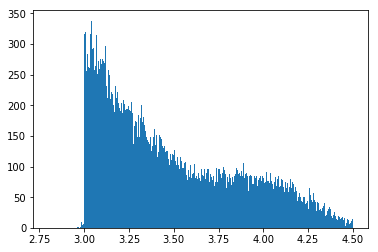

In [3]:
plt.hist(np.log10(np.sum(counts,axis=0)),bins=500,range=[2.8,4.5])
plt.show()

In [177]:
meta = pd.read_csv(os.path.join(base_path,'meta.txt'),sep='\t')
meta.head()

cell      tsne1      tsne2 cluster_original  \
0  AAACCTGGTCCATGAT-1_5981_BA9  19.121044 -20.540960                3   
1  AAACGGGAGTAGCCGA-1_5981_BA9   5.136135 -13.751351                4   
2  AAACGGGCATCGGTTA-1_5981_BA9 -28.210752 -20.764837               6A   
3  AAACGGGTCCATGAAC-1_5981_BA9  29.946121 -15.725056                2   
4  AAAGATGCACGACTCG-1_5981_BA9  25.065271 -19.422704                3   

     sample diagnosis    stage  age     sex      region ...  genes   UMIs  \
0  5981_BA9   Control  Control   44  female  prefrontal ...   3674   9333   
1  5981_BA9   Control  Control   44  female  prefrontal ...   2407   4853   
2  5981_BA9   Control  Control   44  female  prefrontal ...   3593   7668   
3  5981_BA9   Control  Control   44  female  prefrontal ...   3288   6940   
4  5981_BA9   Control  Control   44  female  prefrontal ...   4161  10297   

   mito_perc  ribo_perc  lesion_stage  cluster   cell_type  DMGM_UL  DMGM_DL  \
0   0.005143   0.002357             0        3     EN-L5-6      NaN      NaN   
1   0.004945   0.003709             0     L2-3  EN-L2-3-MS      NaN      NaN   
2   0.018519   0.006129             0       6A       IN-PV      NaN      NaN   
3   0.016427   0.007061             0        2       EN-L4      NaN      NaN   
4   0.007672   0.003108             0        3     EN-L5-6      NaN      NaN   

  DMWM  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  

[5 rows x 24 columns]

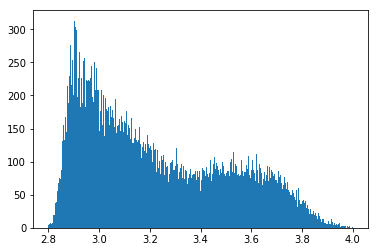

In [5]:
plt.hist(np.log10(meta.genes),bins=500,range=[2.8,4])
plt.show()

In [6]:
meta.cell_type.unique()

array(['EN-L5-6', 'EN-L2-3-MS', 'IN-PV', 'EN-L4', 'EN-MIX', 'IN-SST',
       'IN-VIP', 'Endo cells', 'OPC', 'EN-L2-3-Cntl', 'IN-SV2C', 'EN-PYR',
       'OL-Cntl', 'Astrocytes', 'OL-MS-2', 'Stromal cells', 'OL-MS-1',
       'Glia-MIX', 'Microglia', 'Phagocytes', 'T cells', 'B cells'],
      dtype=object)

In [7]:
len(meta[meta.cell_type=='Microglia'].cell)

1425

In [8]:
cells = [i for i in meta[meta.cell_type=='Microglia'].cell]
Microglia_df = counts.drop(columns=[i for i in counts.columns if not i in cells])
Microglia_df.head()

TACCTTAGTTGCTCCT-1_5787_BA9  TTCTCCTTCAAACCAC-1_5546_BA9  \
0                                                                           
ENSG00000223972                            0                            0   
ENSG00000227232                            0                            0   
ENSG00000278267                            0                            0   
ENSG00000243485                            0                            0   
ENSG00000274890                            0                            0   

                 AAATGCCAGGTCATCT-1_1_A4  AACACGTGTGACGCCT-1_1_A4  \
0                                                                   
ENSG00000223972                        0                        0   
ENSG00000227232                        0                        0   
ENSG00000278267                        0                        0   
ENSG00000243485                        0                        0   
ENSG00000274890                        0                        0   

                 AACCGCGCATGCAACT-1_1_A4  AACGTTGTCCGCAAGC-1_1_A4  \
0                                                                   
ENSG00000223972                        0                        0   
ENSG00000227232                        0                        0   
ENSG00000278267                        0                        0   
ENSG00000243485                        0                        0   
ENSG00000274890                        0                        0   

                 AACTCAGGTACATCCA-1_1_A4  AACTCTTAGAGTACAT-1_1_A4  \
0                                                                   
ENSG00000223972                        0                        0   
ENSG00000227232                        0                        0   
ENSG00000278267                        0                        0   
ENSG00000243485                        0                        0   
ENSG00000274890                        0                        0   

                 AAGACCTCATTCTCAT-1_1_A4  AAGGCAGAGATAGCAT-1_1_A4  \
0                                                                   
ENSG00000223972                        0                        0   
ENSG00000227232                        0                        0   
ENSG00000278267                        0                        0   
ENSG00000243485                        0                        0   
ENSG00000274890                        0                        0   

                             ...                TCAGGTAAGGACATTA-1_MS200_A303  \
0                            ...                                                
ENSG00000223972              ...                                            0   
ENSG00000227232              ...                                            0   
ENSG00000278267              ...                                            0   
ENSG00000243485              ...                                            0   
ENSG00000274890              ...                                            0   

                 TCCACACAGGCCGAAT-1_MS200_A303  TCGGGACCAGTCCTTC-1_MS200_A303  \
0                                                                               
ENSG00000223972                              0                              0   
ENSG00000227232                              0                              0   
ENSG00000278267                              0                              0   
ENSG00000243485                              0                              0   
ENSG00000274890                              0                              0   

                 TCTATTGTCAGCAACT-1_MS200_A303  TCTCTAACAGTGGAGT-1_MS200_A303  \
0                                                                               
ENSG00000223972                              0                              0   
ENSG00000227232                              0                              0   
ENSG00000278267                              0                              0   


In [178]:
cell_type_df_dict = {}
Gene_Matrix_Avg = pd.DataFrame(index=counts.index)
Gene_Matrix_Sum = pd.DataFrame(index=counts.index)
Gene_Matrix_Med = pd.DataFrame(index=counts.index)
Gene_Matrix_std = pd.DataFrame(index=counts.index)
for cell_type in meta.cell_type.unique():
    cells = [i for i in meta[meta.cell_type==cell_type].cell]
    print(cell_type,len(cells))
    cell_type_df_dict[cell_type] = counts.drop(columns=[i for i in counts.columns if not i in cells])
#     Gene_Matrix_Sum[cell_type] = pd.DataFrame(np.sum(cell_type_df_dict[cell_type],axis=1),index=cell_type_df_dict[cell_type].index,columns=['cell_type'])
#     Gene_Matrix_Med[cell_type] = pd.DataFrame(np.median(cell_type_df_dict[cell_type],axis=1),index=cell_type_df_dict[cell_type].index,columns=['cell_type'])
    Gene_Matrix_Avg[cell_type] = pd.DataFrame(np.average(cell_type_df_dict[cell_type],axis=1),index=cell_type_df_dict[cell_type].index,columns=['cell_type'])
    Gene_Matrix_std[cell_type] = pd.DataFrame(np.std(cell_type_df_dict[cell_type],axis=1),index=cell_type_df_dict[cell_type].index,columns=['cell_type'])

EN-L5-6 3058
EN-L2-3-MS 3291
IN-PV 1897
EN-L4 3125
EN-MIX 2403
IN-SST 1486
IN-VIP 2755
Endo cells 375
OPC 3844
EN-L2-3-Cntl 2829
IN-SV2C 779
EN-PYR 2082
OL-Cntl 9642
Astrocytes 5381
OL-MS-2 1598
Stromal cells 153
OL-MS-1 1154
Glia-MIX 1226
Microglia 1425
Phagocytes 258
T cells 105
B cells 53


In [11]:
len(Gene_Matrix_Avg)

65217

In [12]:
temp = pd.DataFrame(data=np.max(Gene_Matrix_Avg,axis=1),index=Gene_Matrix_Avg.index,columns=['Avg'])
temp = temp[temp['Avg']>0]
len(temp)

38868

In [15]:
np.mean(temp['Avg'])

0.43603183391507966

In [16]:
Gene_Matrix_Avg.head()

EN-L5-6  EN-L2-3-MS     IN-PV    EN-L4   EN-MIX    IN-SST  \
0                                                                             
ENSG00000223972  0.000000    0.000000  0.000000  0.00000  0.00000  0.000000   
ENSG00000227232  0.036625    0.077788  0.040063  0.05984  0.00541  0.010094   
ENSG00000278267  0.000000    0.000000  0.000000  0.00000  0.00000  0.000000   
ENSG00000243485  0.001308    0.000912  0.000527  0.00032  0.00000  0.000000   
ENSG00000274890  0.000000    0.000000  0.000000  0.00000  0.00000  0.000000   

                   IN-VIP  Endo cells       OPC  EN-L2-3-Cntl   ...     \
0                                                               ...      
ENSG00000223972  0.000000       0.000  0.000000      0.000000   ...      
ENSG00000227232  0.029038       0.016  0.010406      0.042064   ...      
ENSG00000278267  0.000000       0.000  0.000000      0.000000   ...      
ENSG00000243485  0.000363       0.000  0.000260      0.000707   ...      
ENSG00000274890  0.000000       0.000  0.000000      0.000000   ...      

                  OL-Cntl  Astrocytes   OL-MS-2  Stromal cells   OL-MS-1  \
0                                                                          
ENSG00000223972  0.000000    0.000000  0.000000       0.000000  0.000000   
ENSG00000227232  0.009542    0.013938  0.002503       0.006536  0.006932   
ENSG00000278267  0.000000    0.000000  0.000000       0.000000  0.000000   
ENSG00000243485  0.000104    0.000186  0.000000       0.000000  0.000000   
ENSG00000274890  0.000000    0.000000  0.000000       0.000000  0.000000   

                 Glia-MIX  Microglia  Phagocytes  T cells  B cells  
0                                                                   
ENSG00000223972  0.000000   0.000000    0.000000      0.0      0.0  
ENSG00000227232  0.015498   0.008421    0.015504      0.0      0.0  
ENSG00000278267  0.000000   0.000000    0.000000      0.0      0.0  
ENSG00000243485  0.000000   0.000000    0.000000      0.0      0.0  
ENSG00000274890  0.000000   0.000000    0.000000      0.0      0.0  

[5 rows x 22 columns]

In [179]:
pickle.dump(Gene_Matrix_Avg,open(os.path.join(base_path,'Gene_Matrix_Avg.pkl'),'wb'))
pickle.dump(Gene_Matrix_std,open(os.path.join(base_path,'Gene_Matrix_std.pkl'),'wb'))

In [8]:
Gene_Matrix_Avg = pickle.load(open(os.path.join(base_path,'Gene_Matrix_Avg.pkl'),'rb'))
Gene_Matrix_std = pickle.load(open(os.path.join(base_path,'Gene_Matrix_std.pkl'),'rb'))

In [30]:
Gene_Matrix_Avg.head()

EN-L5-6  EN-L2-3-MS     IN-PV    EN-L4   EN-MIX    IN-SST  \
0                                                                             
ENSG00000223972  0.000000    0.000000  0.000000  0.00000  0.00000  0.000000   
ENSG00000227232  0.036625    0.077788  0.040063  0.05984  0.00541  0.010094   
ENSG00000278267  0.000000    0.000000  0.000000  0.00000  0.00000  0.000000   
ENSG00000243485  0.001308    0.000912  0.000527  0.00032  0.00000  0.000000   
ENSG00000274890  0.000000    0.000000  0.000000  0.00000  0.00000  0.000000   

                   IN-VIP  Endo cells       OPC  EN-L2-3-Cntl   ...     \
0                                                               ...      
ENSG00000223972  0.000000       0.000  0.000000      0.000000   ...      
ENSG00000227232  0.029038       0.016  0.010406      0.042064   ...      
ENSG00000278267  0.000000       0.000  0.000000      0.000000   ...      
ENSG00000243485  0.000363       0.000  0.000260      0.000707   ...      
ENSG00000274890  0.000000       0.000  0.000000      0.000000   ...      

                 Blank3  Blank4  Blank5  Blank6  Blank7  Blank8  Blank9  \
0                                                                         
ENSG00000223972       0       0       0       0       0       0       0   
ENSG00000227232       0       0       0       0       0       0       0   
ENSG00000278267       0       0       0       0       0       0       0   
ENSG00000243485       0       0       0       0       0       0       0   
ENSG00000274890       0       0       0       0       0       0       0   

                 Blank10  Blank11  Blank12  
0                                           
ENSG00000223972        0        0        0  
ENSG00000227232        0        0        0  
ENSG00000278267        0        0        0  
ENSG00000243485        0        0        0  
ENSG00000274890        0        0        0  

[5 rows x 35 columns]

In [31]:
Expression_df = Gene_Matrix_Avg.drop(columns=[i for i in Gene_Matrix_Avg.columns if 'Blank' in i])
temp = np.zeros([len(Expression_df.columns),len(Expression_df.columns)])
for i in range(len(Expression_df.columns)):
    temp[i,i]=1
single_bit_codebook_df = pd.DataFrame(data=temp,index=Expression_df.columns)
single_bit_codebook_df

0    1    2    3    4    5    6    7    8    9  ...    12  \
EN-L5-6        1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
EN-L2-3-MS     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
IN-PV          0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
EN-L4          0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
EN-MIX         0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
IN-SST         0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0 ...   0.0   
IN-VIP         0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0   
Endo cells     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   
OPC            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0   
EN-L2-3-Cntl   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0   
IN-SV2C        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
EN-PYR         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
OL-Cntl        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   1.0   
Astrocytes     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
OL-MS-2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
Stromal cells  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
OL-MS-1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
Glia-MIX       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
Microglia      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
Phagocytes     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
T cells        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
B cells        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   

                13   14   15   16   17   18   19   20   21  
EN-L5-6        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
EN-L2-3-MS     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
IN-PV          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
EN-L4          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
EN-MIX         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
IN-SST         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
IN-VIP         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Endo cells     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
OPC            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
EN-L2-3-Cntl   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
IN-SV2C        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
EN-PYR         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
OL-Cntl        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Astrocytes     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
OL-MS-2        0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Stromal cells  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
OL-MS-1        0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
Glia-MIX       0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
Microglia      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
Phagocytes     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
T cells        0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
B cells        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[22 rows x 22 columns]

In [69]:
pos_signal = Expression_df[cell]
neg_signal = np.average(Expression_df[neg_cells],axis=1)

In [150]:
def gene_picker(pos_signal,neg_signal):
    p = 10
    n = 10
    pos_genes = []
    pos_genes_signal = []
    for i,gene in enumerate(pos_signal.index):
        s = p/n
        p_gene = pos_signal.loc[gene][0]
        n_gene = neg_signal.loc[gene][0]
        s_gene = p_gene/n_gene
        if s_gene<=0:
            continue
        if (p+p_gene)/(n+n_gene)>s:
            p+=p_gene
            n+=n_gene
            pos_genes.append(gene)
            pos_genes_signal.append(s_gene)
    print(len(pos_genes),p/n)
    Fold = pos_signal/neg_signal
    pos_genes = Fold[(Fold!=np.inf)&(Fold>10)].sort_values(ascending=False)[:20].index
    s3 = np.sum(pos_signal.loc[pos_genes],axis=0)/np.sum(neg_signal.loc[pos_genes],axis=0)
    print(len(pos_genes),s3)
    return pos_genes
pos_signal = pd.DataFrame(Expression_df[cell],index=Expression_df.index)
neg_signal = pd.DataFrame(data=np.average(Expression_df[neg_cells],axis=1),index=Expression_df.index)

p = 10
n = 10
pos_genes = []
pos_genes_signal = []
for i,gene in enumerate(pos_signal.index):
    s = p/n
    p_gene = pos_signal.loc[gene][0]
    n_gene = neg_signal.loc[gene][0]
    s_gene = p_gene/n_gene
    if s_gene==np.nan:
        continue
    elif s_gene<=0:
        continue
    elif (p+p_gene)/(n+n_gene)>s:
        p+=p_gene
        n+=n_gene
        pos_genes.append(gene)
        pos_genes_signal.append(s_gene)
print(len(pos_genes),p/n)
Fold = pd.DataFrame(data = np.array(pos_signal)/np.array(neg_signal),index=pos_signal.index)
Fold = Fold.dropna()
pos_genes = Fold[(Fold!=np.inf)&(Fold>10)&(neg_signal)].sort_values(0,ascending=False)[:20].index
s3 = np.sum(pos_signal.loc[pos_genes],axis=0)[0]/np.sum(neg_signal.loc[pos_genes],axis=0)[0]
print(len(pos_genes),s3)
#pos_genes = gene_picker(pos_signal,neg_signal)


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars


2434 4.897554282303265


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


NotImplementedError: couldn't find matching opcode for 'and_bbd'

In [241]:
signal_df = pd.DataFrame(index=Expression_df.index)
signal_df['pos_signal'] = pd.DataFrame(Expression_df[cell],index=Expression_df.index)
signal_df['neg_signal'] = pd.DataFrame(data=np.average(Expression_df[neg_cells],axis=1),index=Expression_df.index)
signal_df = signal_df[(signal_df['pos_signal']>0)&(signal_df['neg_signal']>0)]
signal_df['difference'] = signal_df['pos_signal']-signal_df['neg_signal']
signal_df['fold'] = signal_df['pos_signal']/signal_df['neg_signal']
signal_df=signal_df[signal_df['fold']>0]
signal_df=signal_df[signal_df['difference']>0]
print(len(signal_df))
signal_df.sort_values('difference',ascending=False).head()

23479


pos_signal  neg_signal  difference       fold
0                                                             
ENSG00000251562  330.279916  200.845223  129.434692   1.644450
ENSG00000178568   81.535055    5.952981   75.582074  13.696508
ENSG00000175497   77.428044    8.810465   68.617579   8.788190
ENSG00000174469   76.402741   13.522312   62.880430   5.650124
ENSG00000170579   35.985767    9.150373   26.835394   3.932710

In [278]:
pickle.dump(signal_df,open(os.path.join(base_path,'signal_df.pkl'),'wb'))

In [4]:
signal_df = pickle.load(open(os.path.join(base_path,'signal_df.pkl'),'rb'))

# Population Size
-1000
# Selection Rules
-Only top 10 Survive
-SD (signal x difference)
# Crossover Rules
-top 10% Breed 50:50 crossover
# Mutation Rules
-1 mutation per generation

-Next generation includes Survivors(10),Survivors+Mutation(100),Offspring(90),and Offspring+Mutation(900)

1683


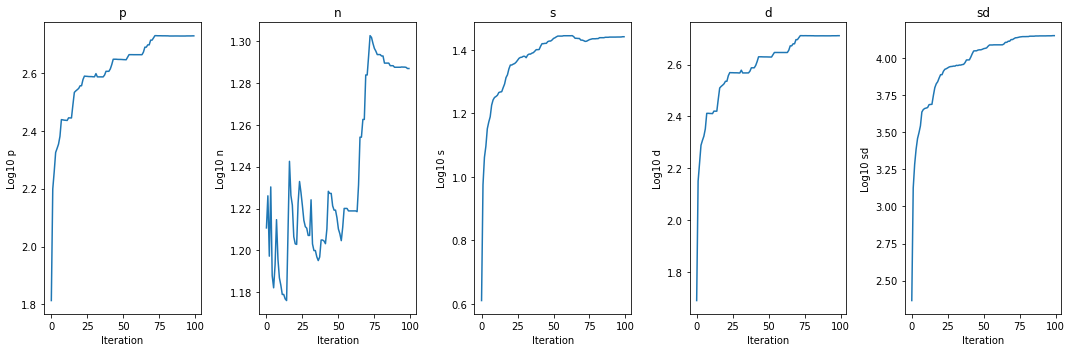

In [66]:
import random
import tqdm.notebook as tqdm
from multiprocessing import Pool
from functools import partial
import sys

def generate_offspring(survivors,size=50):
    offspring = []
    for m in range(len(survivors)):
        for f in range(len(survivors)):
            if m!=f:
                poses = np.unique(survivors[m]+survivors[f])
                np.random.shuffle(poses)
                offspring.append(list(poses[:size]))
    return offspring

def generate_mutations(progenerators,mutation_rate=1):
    mutations = []
    for progenerator in progenerators:
        for i in range(10):
            temp_progenerator = progenerator.copy()
            for m in range(mutation_rate):
                n = random.randint(0,len(temp_progenerator)-1)
                temp_progenerator[n] = random.sample(genes,1)[0]
            mutations.append(list(temp_progenerator))
    return mutations

def calculator(species,signal_df,optimizer='sd',noise=10):
    df = signal_df.loc[species]
    values = np.sum(df,axis=0)
    p = noise+np.sum(df['pos_signal'])
    n = noise+np.sum(df['neg_signal'])
    s = p/n
    d = p-n
    sd = s*d
    if optimizer=='sd':
        return sd
    elif optimizer=='s2d':
        return s*s*d
    elif optimizer=='d':
        return d
    elif optimizer=='s':
        return s
    elif optimizer=='n':
        return n
    elif optimizer=='p':
        return p
    elif optimizer=='all':
        return p,n,s,d,sd
    
def calculator_wrapper(sub_population,signal_df,optimizer='sd',noise=10):
    results=[]
    for species in sub_population:
        results.append(calculator(species,signal_df,optimizer=optimizer,noise=noise))
    return results,sub_population

def selection(population,results,keepers):
    thresh = np.sort(results.copy())[-keepers-1]
    survivors = []
    for i in np.where(results>thresh)[0]:
        survivors.append(population[i])
    return survivors

def artificial_selection(population,signal_df,keepers=10,ncpu=10,optimizer='sd',noise=10,chunksize=100):
    results = []
    if ncpu==1:
        for species in population:
            results.append(calculator(species,signal_df,optimizer=optimizer,noise=noise))
    else:
        sub_populations = []
        temp = []
        for i,species in enumerate(population):
            temp.append(species)
            if i==0:
                continue
            elif i%chunksize==0:
                sub_populations.append(temp)
                temp=[]
        sub_populations.append(temp)
        pfunc = partial(calculator_wrapper,signal_df=signal_df,optimizer=optimizer,noise=noise)
        new_population = []
        with Pool(ncpu) as p:
            sys.stdout.flush()
            for sub_results,sub_population in p.imap(pfunc,sub_populations,chunksize=1):
                results.extend(sub_results)
                new_population.extend(sub_population)
            population=new_population
            sys.stdout.flush()
    survivors = selection(population,results,keepers)
    return survivors

def view_progress(survivors,signal_df,verbose=False):
    P = []
    N = []
    S = []
    D = []
    SD = []
    for survivor in survivors:
        p,n,s,d,sd = calculator(survivor,signal_df,optimizer='all')
        P.append(p)
        N.append(n)
        S.append(s)
        D.append(d)
        SD.append(sd)
    p = np.mean(P)
    n = np.mean(N)
    s = np.mean(S)
    d = np.mean(D)
    sd = np.mean(SD)
    p_std = 100*np.std(P)/p
    n_std = 100*np.std(N)/n
    s_std = 100*np.std(S)/s
    d_std = 100*np.std(D)/d
    sd_std = 100*np.std(SD)/sd
    Results = {'p':p,'n':n,'s':s,'d':d,'sd':sd,'p_std':p_std,'n_std':n_std,'s_std':s_std,'d_std':d_std,'sd_std':sd_std}
    SF = 2
    if verbose:
        for key,value in Results.items():
            print(key,round(value,SF))
    return Results

def Evolution(signal_df,genes,keepers=10,size=50,ncpu=1,optimizer='s2d',noise=10,mutation_rate=10,iterations=100,verbose=False,chunksize=100):
    # Initial Population
    survivors = []
    for K in range(keepers):
        survivors.append(random.sample(genes,size))
    if verbose:
        print('Starting Population')
    Results = view_progress(survivors,signal_df,verbose=verbose)
    Iteration_results = {}
    for I in tqdm.tqdm(range(iterations)):
        Iteration_results[I]={}
        offspring = generate_offspring(survivors,size=size)
        progenerators = survivors+offspring
        mutations = generate_mutations(progenerators,mutation_rate=mutation_rate)
        population = survivors+offspring+mutations
        Iteration_results[I]['population'] = population
        survivors = artificial_selection(population,signal_df,keepers=keepers,ncpu=ncpu,optimizer=optimizer,noise=noise,chunksize=chunksize)
        Iteration_results[I]['survivors'] = survivors
        Results = view_progress(survivors,signal_df,verbose=verbose)
        Iteration_results[I]['Results'] = Results
    if verbose:
        print('')
        print('Elite Survivor')
    elite_survivor = artificial_selection(survivors,signal_df,keepers=1,ncpu=ncpu,optimizer=optimizer,noise=noise)
    Results = view_progress(elite_survivor,signal_df,verbose=verbose)
    return Iteration_results,elite_survivor

def qc_viewer(Iteration_results):
    Results = {}
    for I in Iteration_results.keys():
        for key,value in Iteration_results[I]['Results'].items():
            if not key in Results.keys():
                Results[key]=[]
            Results[key].append(value)
    i=0
    plt.figure(figsize=[15,5])
    for key,values in Results.items():
        if 'std' in key:
            continue
        i+=1
        plt.subplot(1, 5, i)
        plt.plot(range(len(values)),np.log10(values))
        plt.ylabel('Log10 '+key)
        plt.xlabel('Iteration')
        plt.title(key)
    plt.tight_layout()
    plt.show()
noise=10
signal_df = pd.DataFrame(index=Expression_df.index)
signal_df['pos_signal'] = pd.DataFrame(Expression_df[cell],index=Expression_df.index)
signal_df['neg_signal'] = pd.DataFrame(data=np.max(Expression_df[neg_cells],axis=1),index=Expression_df.index)
signal_df = signal_df[(signal_df['pos_signal']>0)&(signal_df['neg_signal']>0)]
# Add Noise here to speed up calculator
signal_df['pos_signal_noise'] = signal_df['pos_signal']+noise
signal_df['neg_signal_noise'] = signal_df['neg_signal']+noise
signal_df['difference'] = signal_df['pos_signal']-signal_df['neg_signal']
signal_df['fold'] = signal_df['pos_signal']/signal_df['neg_signal']
signal_df['difference_noise'] = signal_df['pos_signal_noise']-signal_df['neg_signal_noise']
signal_df['fold_noise'] = signal_df['pos_signal_noise']/signal_df['neg_signal_noise']
signal_df=signal_df[signal_df['fold']>0]
signal_df=signal_df[signal_df['difference']>0]
print(len(signal_df))
signal_df.sort_values('difference',ascending=False).head()

genes = list(signal_df.index)
Iteration_results,elite_survivor = Evolution(signal_df,genes,keepers=10,size=25,ncpu=30,optimizer='s2d',noise=10,mutation_rate=10,iterations=100,verbose=False,chunksize=100) 
qc_viewer(Iteration_results)



In [164]:
noise=10
signal_df = pd.DataFrame(index=Expression_df.index)
signal_df['pos_signal'] = pd.DataFrame(Expression_df[cell],index=Expression_df.index)
signal_df['neg_signal'] = pd.DataFrame(data=np.max(Expression_df[neg_cells],axis=1),index=Expression_df.index)
signal_df = signal_df[(signal_df['pos_signal']>0)&(signal_df['neg_signal']>0)]
# Add Noise here to speed up calculator
signal_df['pos_signal_noise'] = signal_df['pos_signal']+noise
signal_df['neg_signal_noise'] = signal_df['neg_signal']+noise
signal_df['difference'] = signal_df['pos_signal']-signal_df['neg_signal']
signal_df['fold'] = signal_df['pos_signal']/signal_df['neg_signal']
signal_df['difference_noise'] = signal_df['pos_signal_noise']-signal_df['neg_signal_noise']
signal_df['fold_noise'] = signal_df['pos_signal_noise']/signal_df['neg_signal_noise']
signal_df=signal_df[signal_df['fold']>0]
signal_df=signal_df[signal_df['difference']>0]
print(len(signal_df))
signal_df.sort_values('difference',ascending=False).head()

756


pos_signal  neg_signal  pos_signal_noise  neg_signal_noise  \
0                                                                             
ENSG00000196569    7.366013    2.908095         17.366013         12.908095   
ENSG00000189058    4.254902    1.832000         14.254902         11.832000   
ENSG00000103888    3.104575    1.066667         13.104575         11.066667   
ENSG00000249307    1.294118    0.381342         11.294118         10.381342   
ENSG00000011465    1.692810    0.877333         11.692810         10.877333   

                 difference      fold  difference_noise  fold_noise  
0                                                                    
ENSG00000196569    4.457918  2.532934          4.457918    1.345358  
ENSG00000189058    2.422902  2.322545          2.422902    1.204775  
ENSG00000103888    2.037908  2.910539          2.037908    1.184148  
ENSG00000249307    0.912776  3.393590          0.912776    1.087925  
ENSG00000011465    0.815477  1.929495          0.815477    1.074970

In [174]:
values = np.sum(signal_df.loc[list(random.sample(list(signal_df.index),50))],axis=0)
values

pos_signal            3.372549
neg_signal            2.422231
pos_signal_noise    503.372549
neg_signal_noise    502.422231
difference            0.950318
fold                200.274876
difference_noise      0.950318
fold_noise           50.090081
dtype: float64

EN-L5-6



EN-L5-6


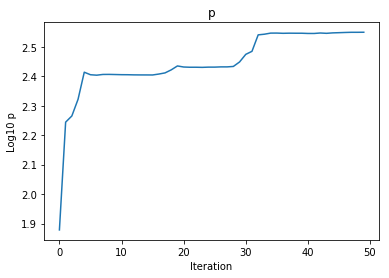

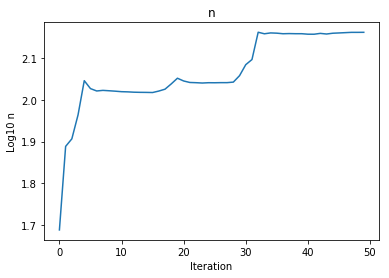

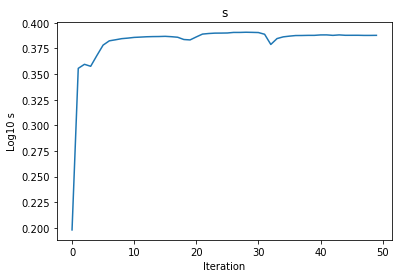

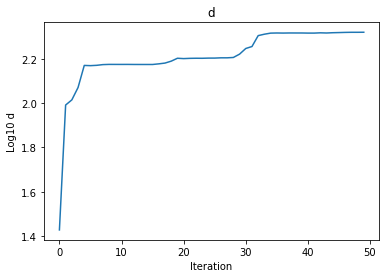

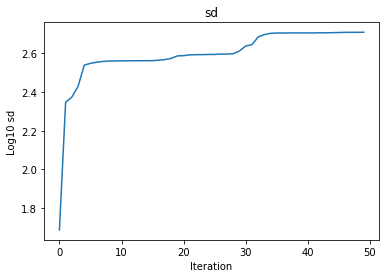

EN-L2-3-MS



EN-L2-3-MS


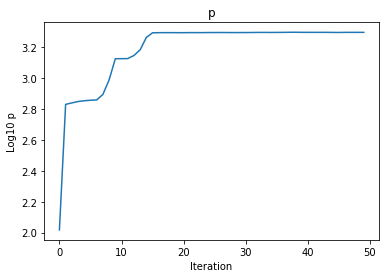

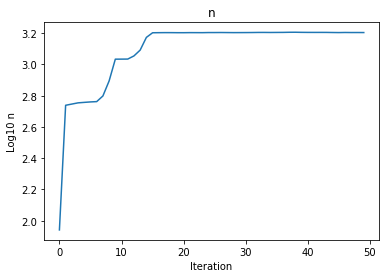

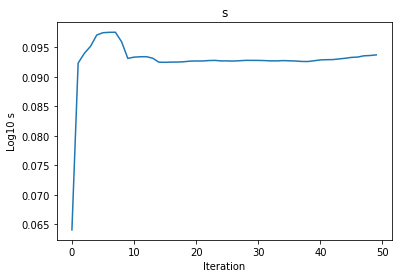

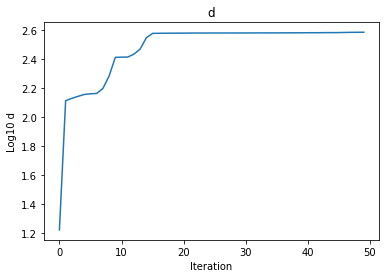

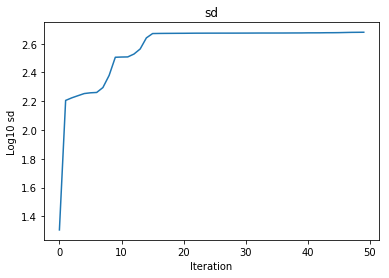

IN-PV



IN-PV


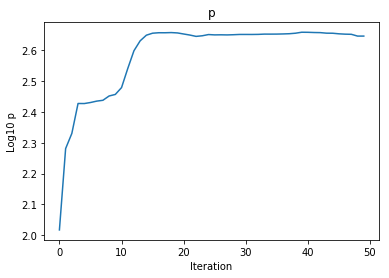

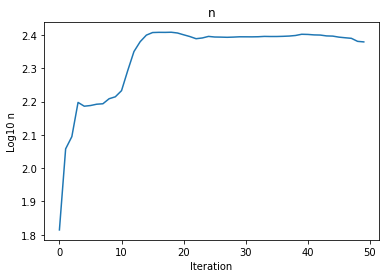

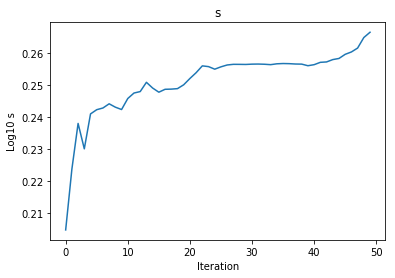

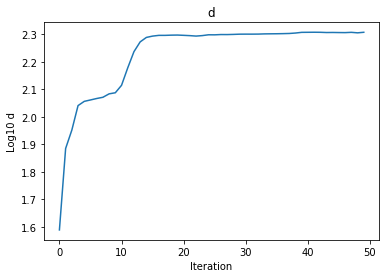

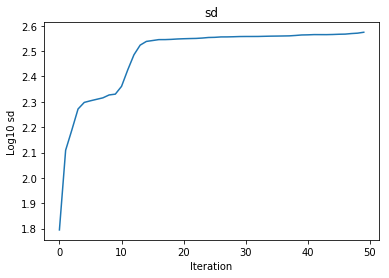

EN-L4



EN-L4


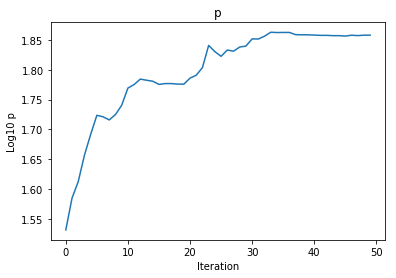

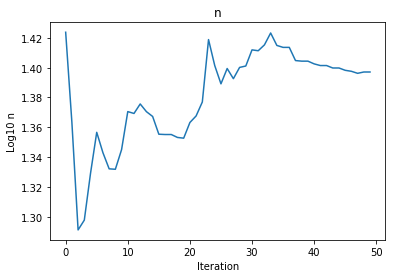

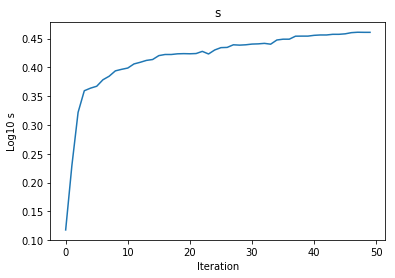

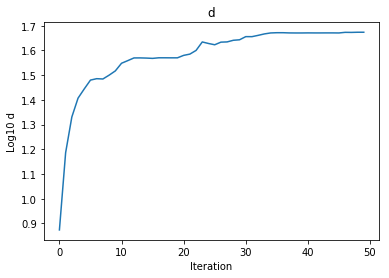

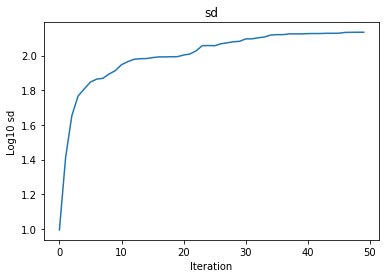

EN-MIX



EN-MIX


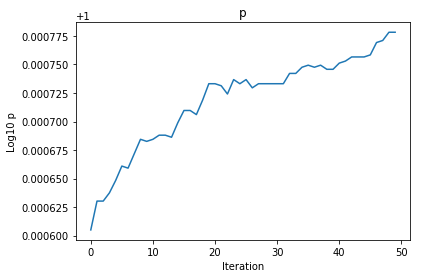

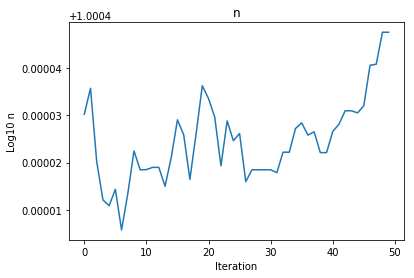

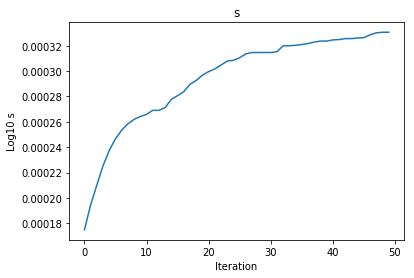

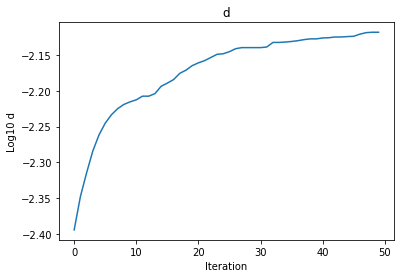

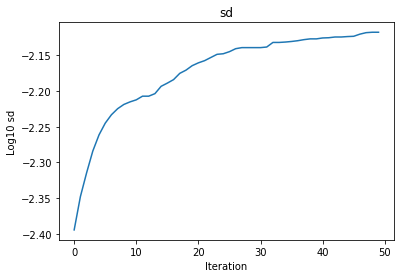

IN-SST



IN-SST


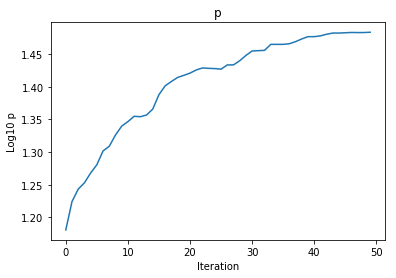

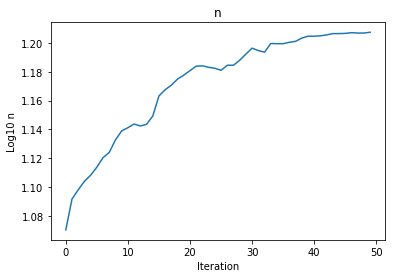

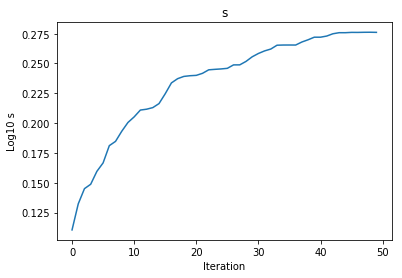

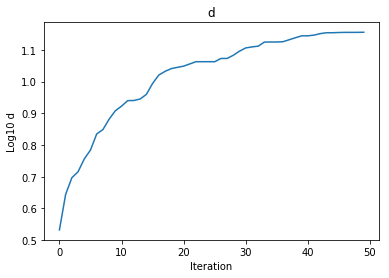

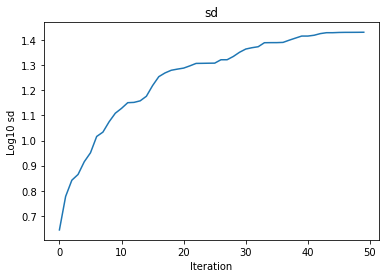

IN-VIP



IN-VIP


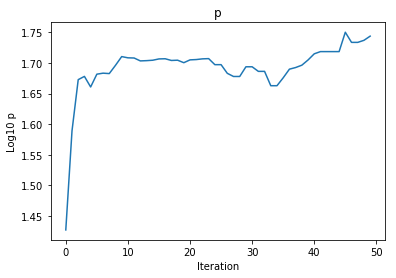

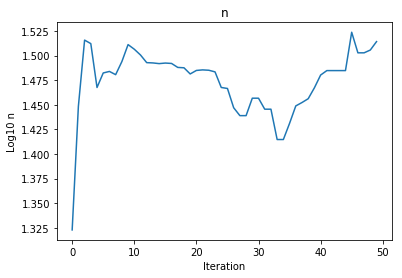

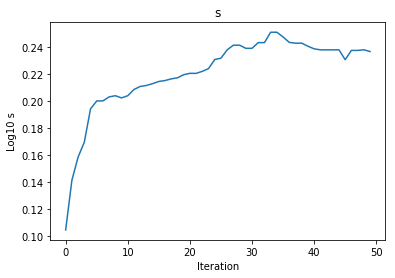

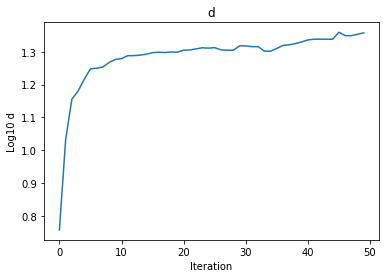

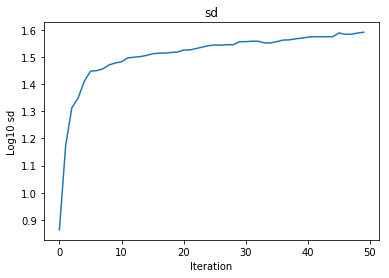

Endo cells



Endo cells


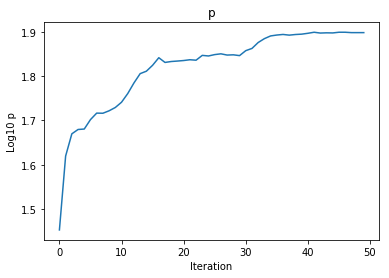

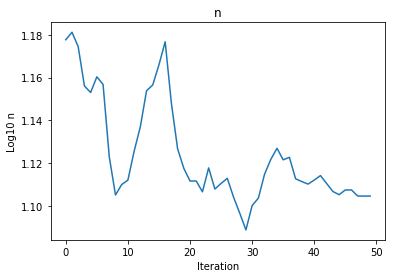

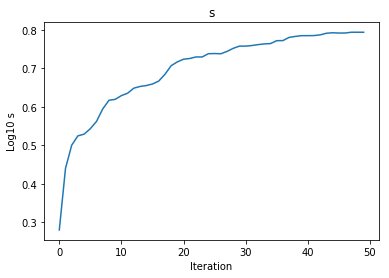

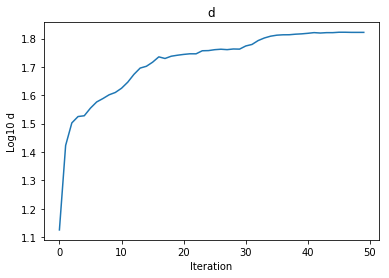

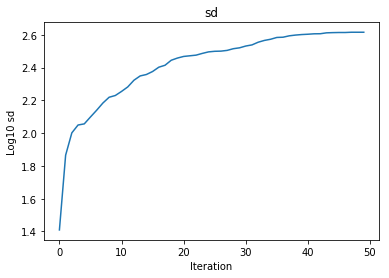

OPC



OPC


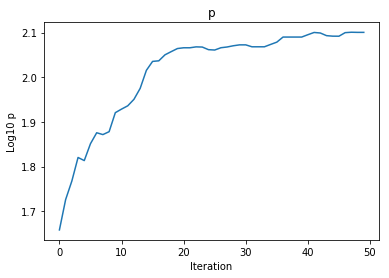

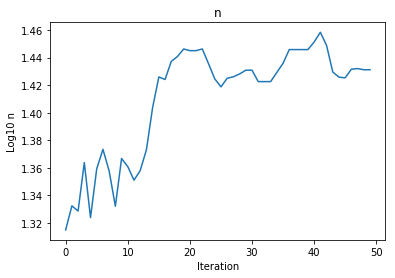

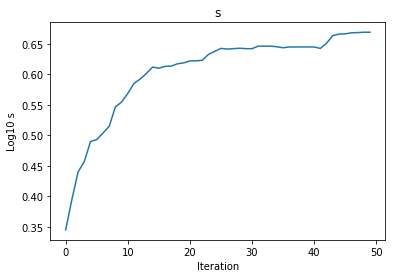

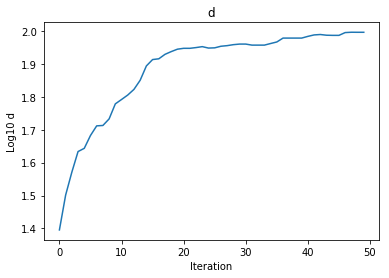

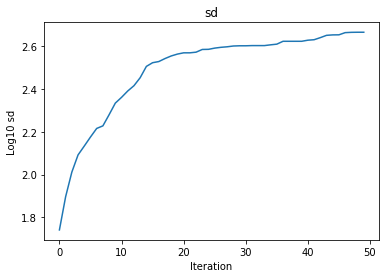

EN-L2-3-Cntl



EN-L2-3-Cntl


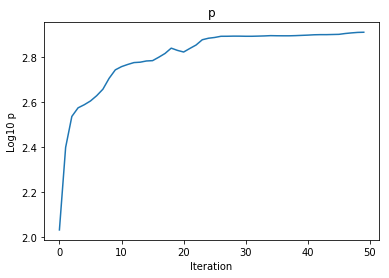

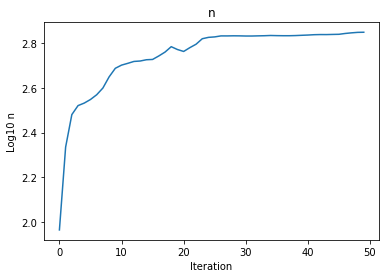

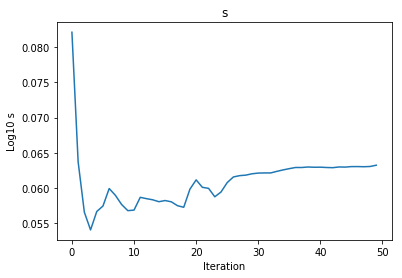

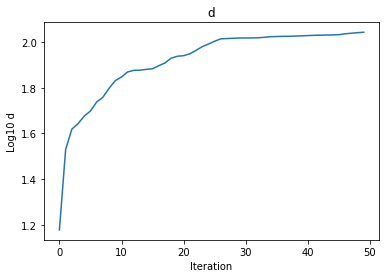

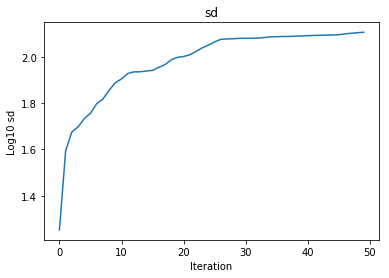

IN-SV2C



IN-SV2C


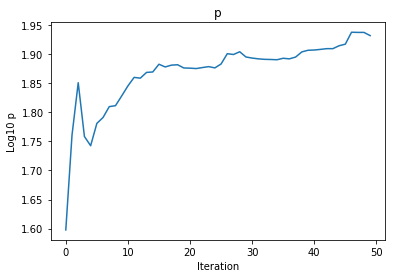

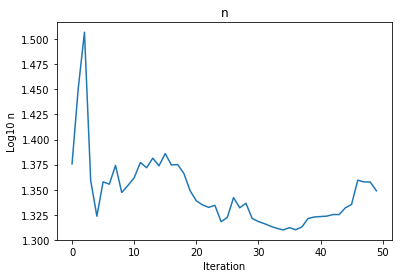

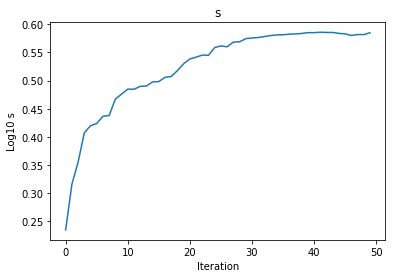

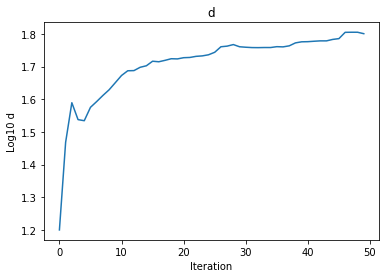

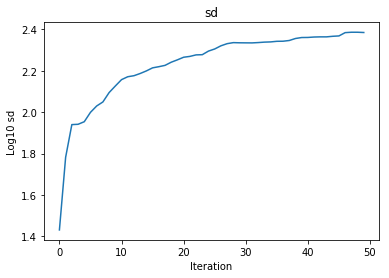

EN-PYR



EN-PYR


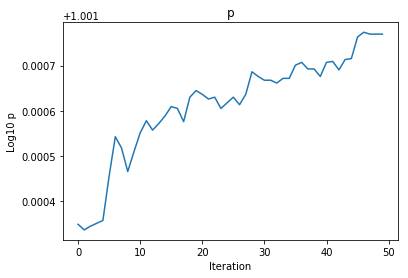

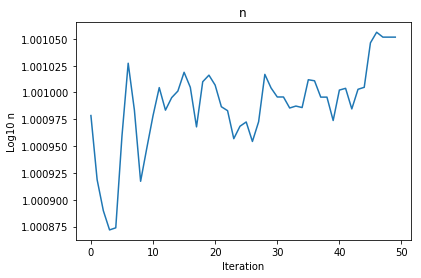

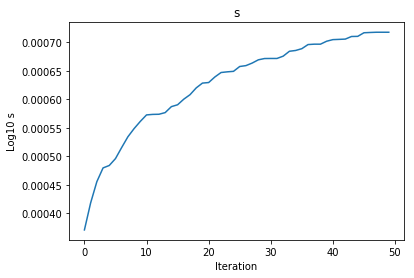

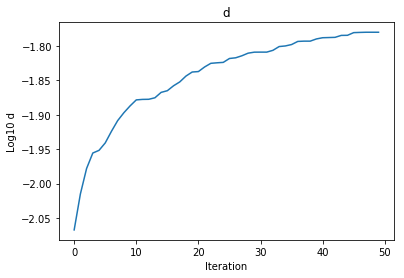

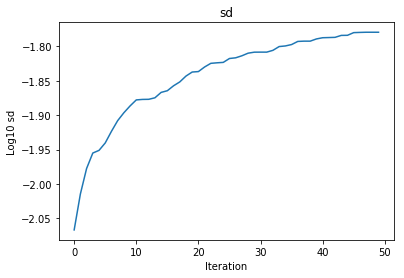

OL-Cntl



OL-Cntl


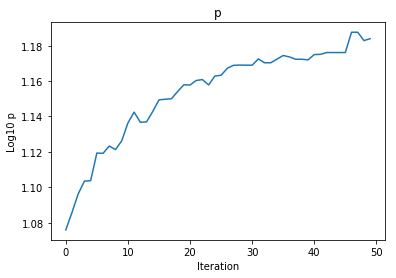

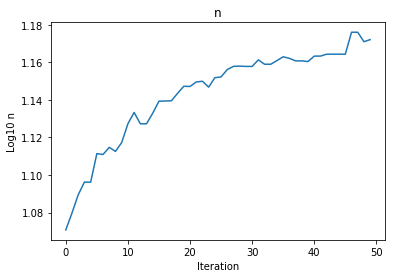

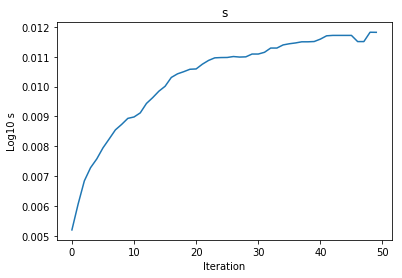

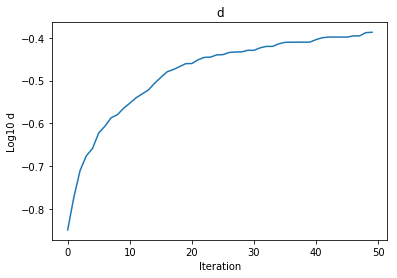

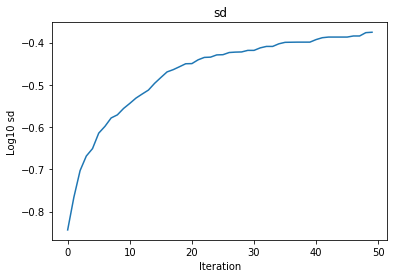

Astrocytes



Astrocytes


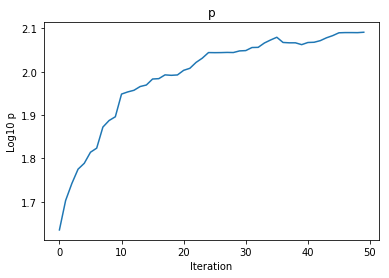

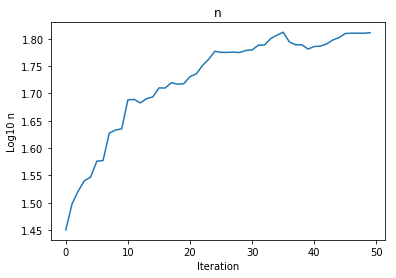

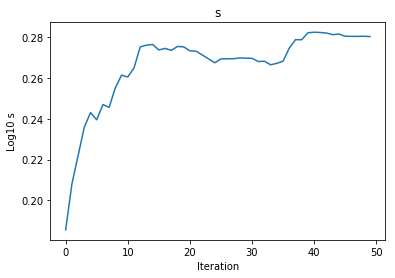

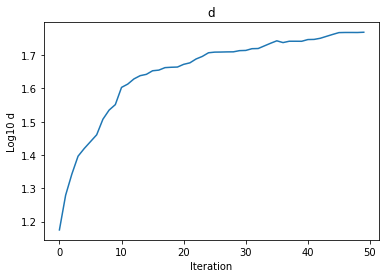

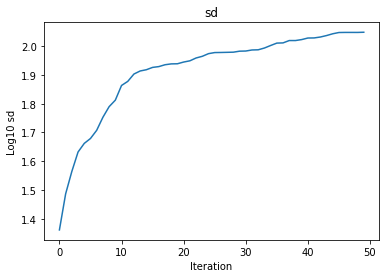

OL-MS-2



OL-MS-2


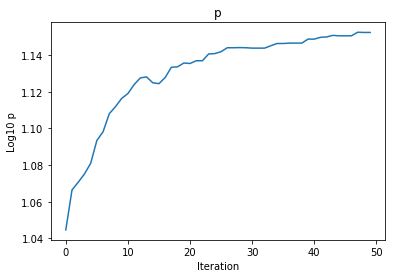

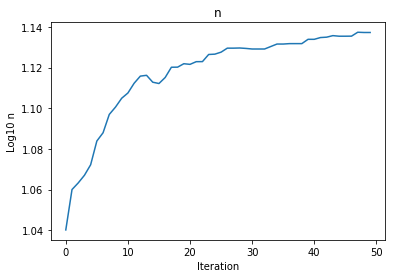

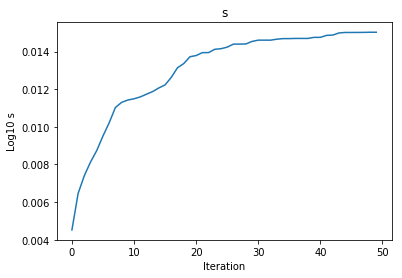

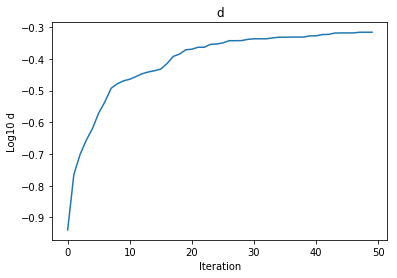

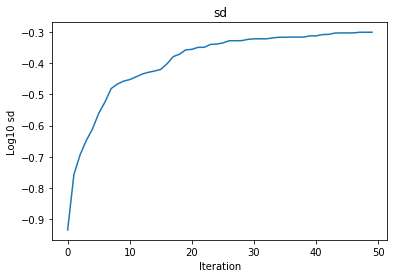

Stromal cells



Stromal cells


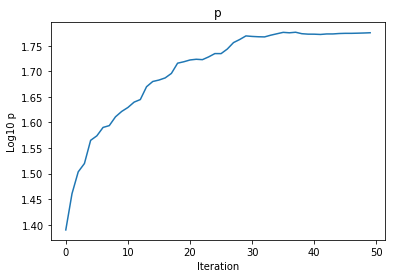

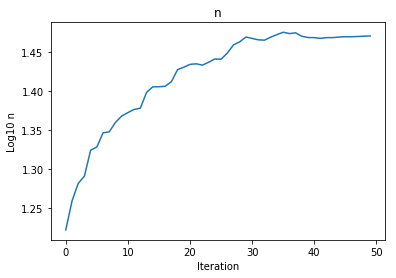

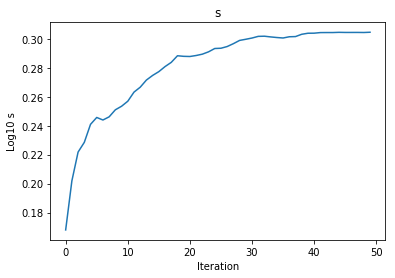

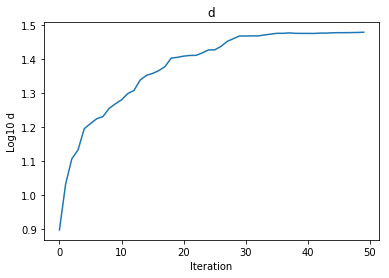

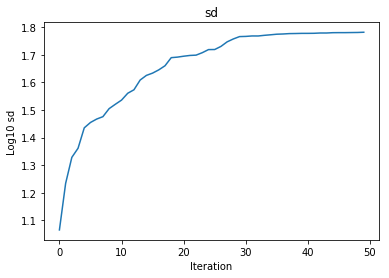

OL-MS-1



OL-MS-1


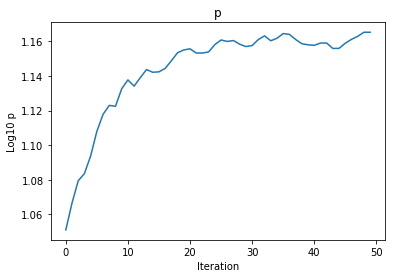

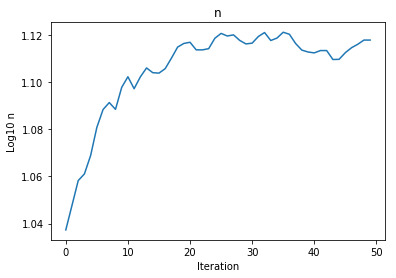

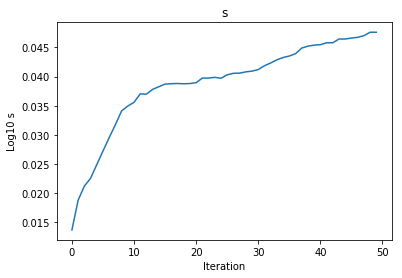

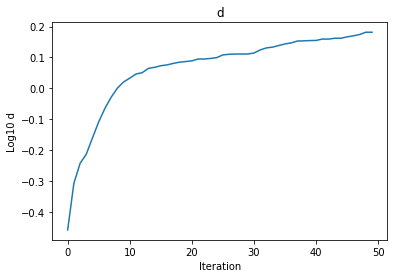

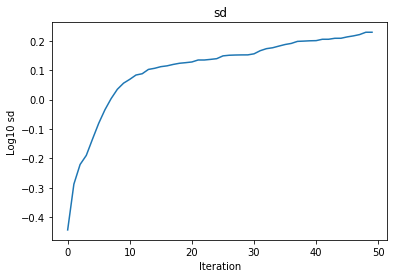

Glia-MIX



Glia-MIX


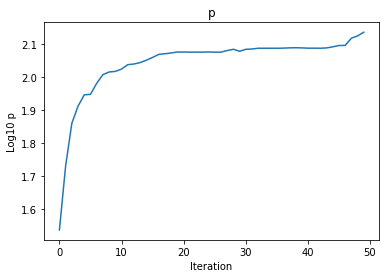

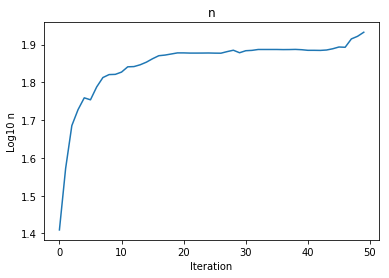

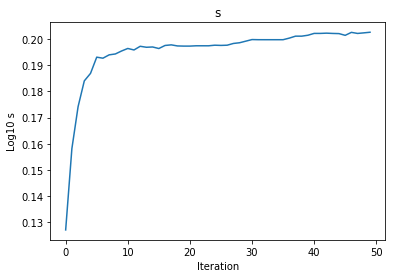

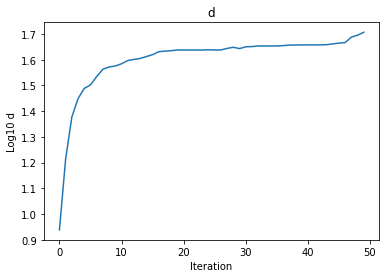

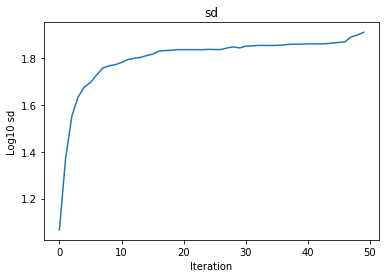

Microglia



Microglia


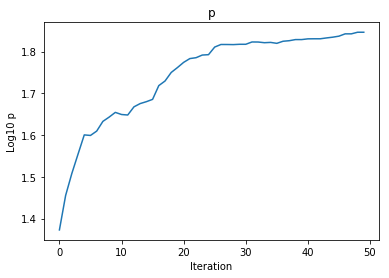

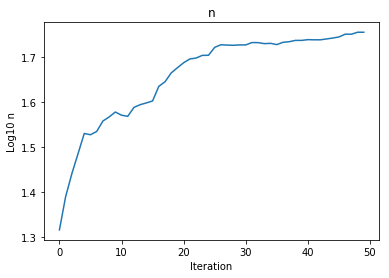

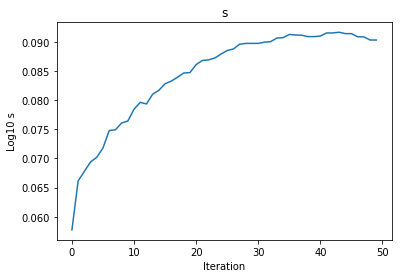

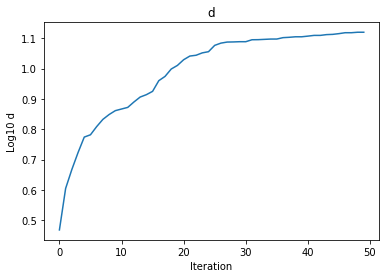

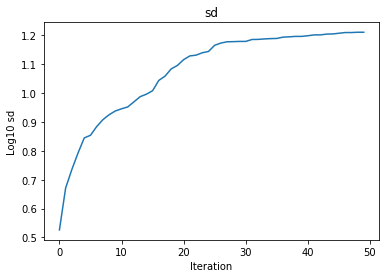

Phagocytes



Phagocytes


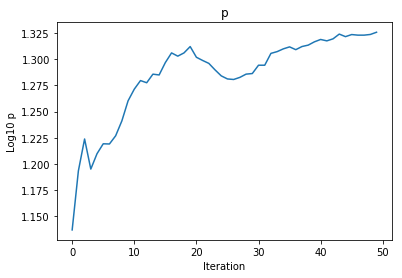

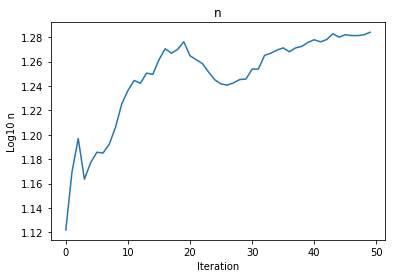

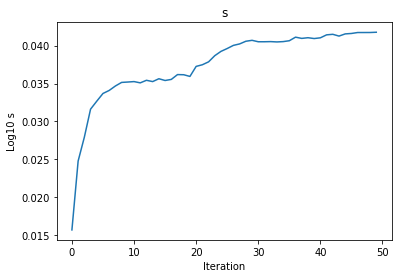

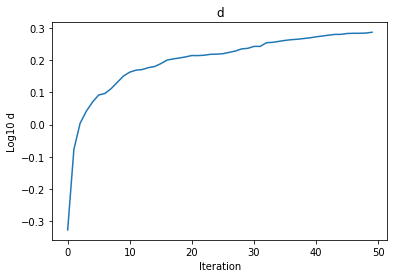

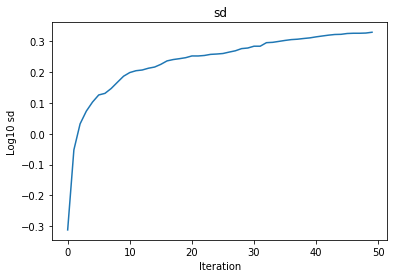

T cells



T cells


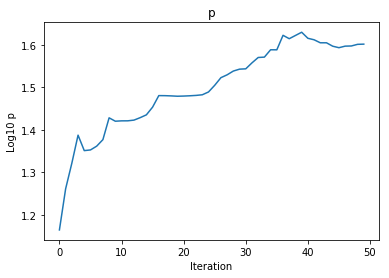

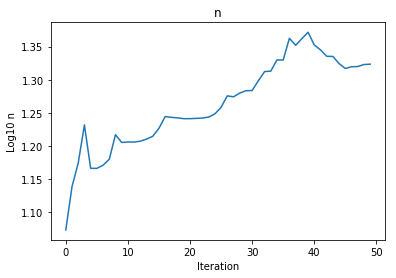

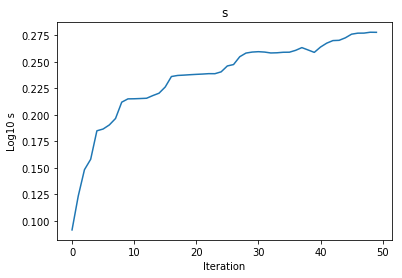

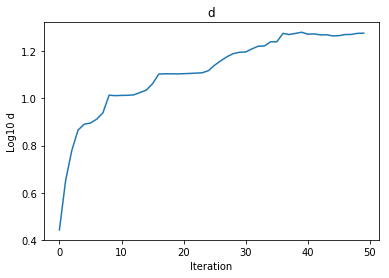

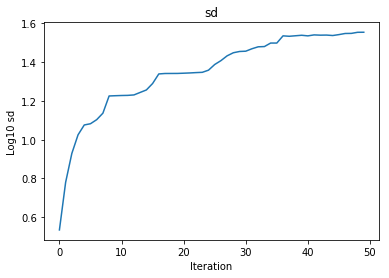

B cells



B cells


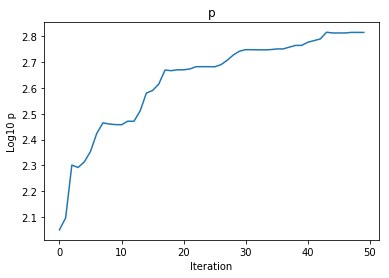

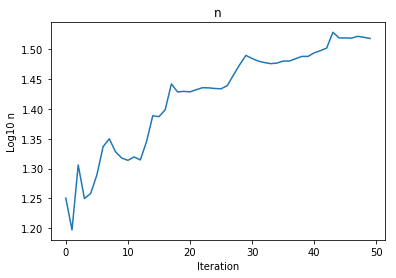

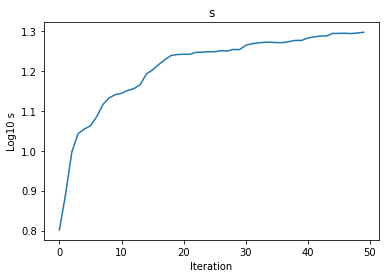

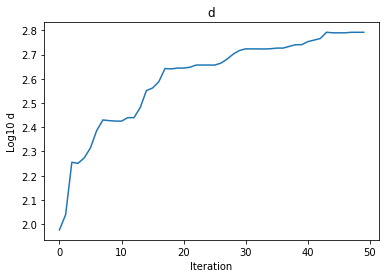

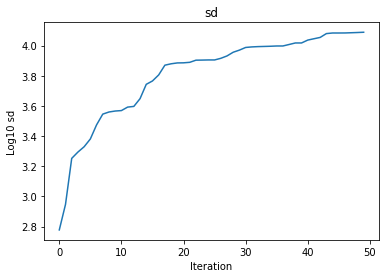

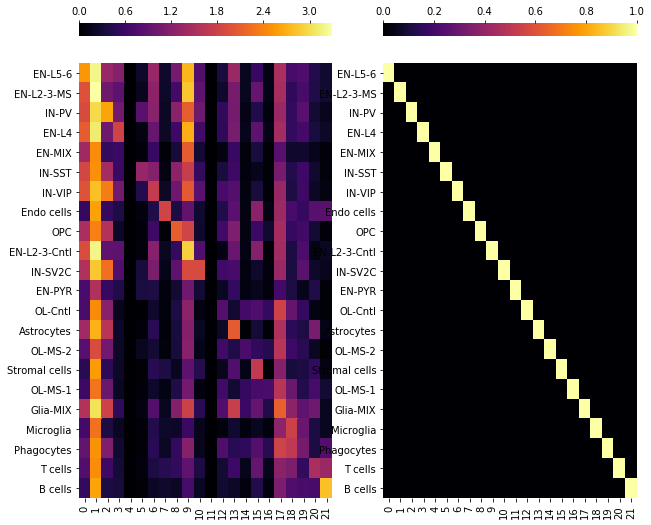

In [50]:
# Codebook Optimization Function
Expression_df = Gene_Matrix_Avg.drop(columns=[i for i in Gene_Matrix_Avg.columns if 'Blank' in i])
temp = np.zeros([len(Expression_df.columns),len(Expression_df.columns)])
for i in range(len(Expression_df.columns)):
    temp[i,i]=1
single_bit_codebook_df = pd.DataFrame(data=temp,index=Expression_df.columns)
single_bit_codebook_df

codebook_df = single_bit_codebook_df
gene_bitmap = {}
Readout_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns)
Z_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns)

for bit in codebook_df.columns:
    pos_cells = list(codebook_df[codebook_df[bit]==1].index)
    neg_cells = list(codebook_df[codebook_df[bit]!=1].index)
    pos_genes = []
    for cell in pos_cells:
        print(cell)
        signal_df = pd.DataFrame(index=Expression_df.index)
        signal_df['pos_signal'] = pd.DataFrame(Expression_df[cell],index=Expression_df.index)
        signal_df['neg_signal'] = pd.DataFrame(data=np.max(Expression_df[neg_cells],axis=1),index=Expression_df.index)
        signal_df = signal_df[(signal_df['pos_signal']>0)&(signal_df['neg_signal']>0)]
        signal_df['difference'] = signal_df['pos_signal']-signal_df['neg_signal']
        signal_df['fold'] = signal_df['pos_signal']/signal_df['neg_signal']
        signal_df=signal_df[signal_df['fold']>0]
        signal_df=signal_df[signal_df['difference']>0]
        genes = list(signal_df.index)
        Iteration_results,elite_survivor = Evolution(signal_df,genes,keepers=10,size=25,ncpu=30,
                                                     optimizer='s2d',noise=10,mutation_rate=10,
                                                     iterations=50,verbose=False,chunksize=100)
        print(cell)
        pos_genes.extend(list(elite_survivor[0]))
        qc_viewer(Iteration_results)
    gene_bitmap[bit] = pos_genes
    Readout_df[bit] = np.sum(Expression_df.loc[pos_genes],axis=0)
    
fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
ax1,ax2 = axes
im1 = sns.heatmap(np.log10(Readout_df+1),cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"))
im2 = sns.heatmap(codebook_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"))
plt.tight_layout()
plt.show()

In [71]:
signal_df = pd.DataFrame(index=Expression_df.index)
signal_df['pos_signal'] = pd.DataFrame(Expression_df[cell],index=Expression_df.index)
signal_df['neg_signal'] = pd.DataFrame(data=np.max(Expression_df[neg_cells],axis=1),index=Expression_df.index)
signal_df = signal_df[(signal_df['pos_signal']>0)&(signal_df['neg_signal']>0)]
signal_df['difference'] = signal_df['pos_signal']-signal_df['neg_signal']
signal_df['fold'] = signal_df['pos_signal']/signal_df['neg_signal']
signal_df['f*d'] = signal_df['difference']*signal_df['fold']
signal_df=signal_df[signal_df['fold']>0]
signal_df=signal_df[signal_df['difference']>0]
genes = list(signal_df.index)
signal_df.sort_values('f*d',ascending=False)

pos_signal  neg_signal  difference        fold          f*d
0                                                                           
ENSG00000211677   56.471698    0.361352   56.110346  156.278992  8768.868354
ENSG00000211896   91.528302    3.180952   88.347350   28.773867  2542.094916
ENSG00000170476    3.283019    0.029333    3.253686  111.921098   364.156057
ENSG00000211893   15.075472    0.658667   14.416805   22.887862   329.969842
ENSG00000222037    0.264151    0.000363    0.263788  727.735849   191.967960

EN-L5-6 7648
EN-L2-3-MS 9818
IN-PV 1349
EN-L4 3608
EN-MIX 81
IN-SST 254
IN-VIP 743
Endo cells 1815
OPC 332
EN-L2-3-Cntl 2154
IN-SV2C 1213
EN-PYR 99
OL-Cntl 53
Astrocytes 568
OL-MS-2 73
Stromal cells 606
OL-MS-1 187
Glia-MIX 1957
Microglia 629
Phagocytes 692
T cells 721
B cells 1683


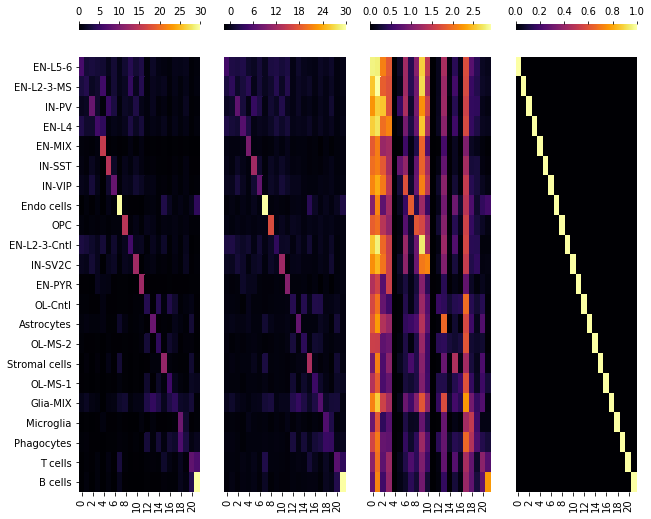

In [96]:
# Codebook Optimization Function
Expression_df = Gene_Matrix_Avg.drop(columns=[i for i in Gene_Matrix_Avg.columns if 'Blank' in i])
temp = np.zeros([len(Expression_df.columns),len(Expression_df.columns)])
for i in range(len(Expression_df.columns)):
    temp[i,i]=1
single_bit_codebook_df = pd.DataFrame(data=temp,index=Expression_df.columns)
single_bit_codebook_df

codebook_df = single_bit_codebook_df
gene_bitmap = {}
Readout_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns)
Z_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns)
Fold_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns)

for bit in codebook_df.columns:
    pos_cells = list(codebook_df[codebook_df[bit]==1].index)
    neg_cells = list(codebook_df[codebook_df[bit]!=1].index)
    pos_genes = []
    for cell in pos_cells:
        signal_df = pd.DataFrame(index=Expression_df.index)
        signal_df['pos_signal'] = pd.DataFrame(Expression_df[cell],index=Expression_df.index)
        signal_df['neg_signal'] = pd.DataFrame(data=np.max(Expression_df[neg_cells],axis=1),index=Expression_df.index)
        signal_df = signal_df[(signal_df['pos_signal']>0)&(signal_df['neg_signal']>0)]
        signal_df['difference'] = signal_df['pos_signal']-signal_df['neg_signal']
        signal_df['fold'] = signal_df['pos_signal']/signal_df['neg_signal']
        signal_df['f*d'] = signal_df['difference']*signal_df['fold']*signal_df['fold']
        signal_df=signal_df[signal_df['fold']>0]
        signal_df=signal_df[signal_df['difference']>0]
        signal_df=signal_df.sort_values('f*d',ascending=False)
        cell_genes = list(signal_df[:25].index)
        pos_genes.extend(cell_genes)
        print(cell,len(signal_df))
    gene_bitmap[bit] = pos_genes
    Readout_df[bit] = np.sum(Expression_df.loc[pos_genes],axis=0)
    neg_df = Expression_df.drop(columns=pos_cells)
    Z_df[bit] = (np.sum(Expression_df.loc[pos_genes],axis=0)-np.average(np.sum(neg_df.loc[pos_genes],axis=0)))/np.std(np.sum(neg_df.loc[pos_genes],axis=0))
    Fold_df[bit] = (np.sum(Expression_df.loc[pos_genes],axis=0)/np.average(np.sum(neg_df.loc[pos_genes],axis=0)))
fig, axes = plt.subplots(ncols=4, figsize=(15, 8))
ax1,ax2,ax3,ax4 = axes
Fold_df[Fold_df>30]=30
Z_df[Z_df>30]=30
im1 = sns.heatmap(Fold_df,cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"))
im2 = sns.heatmap(Z_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
im3 = sns.heatmap(np.log10(Readout_df+1),cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
plt.show()

EN-L5-6 7648
EN-L2-3-MS 9818
IN-PV 1349
EN-L4 3608
EN-MIX 81
IN-SST 254
IN-VIP 743
Endo cells 1815
OPC 332
EN-L2-3-Cntl 2154
IN-SV2C 1213
EN-PYR 99
OL-Cntl 53
Astrocytes 568
OL-MS-2 73
Stromal cells 606
OL-MS-1 187
Glia-MIX 1957
Microglia 629
Phagocytes 692
T cells 721
B cells 1683


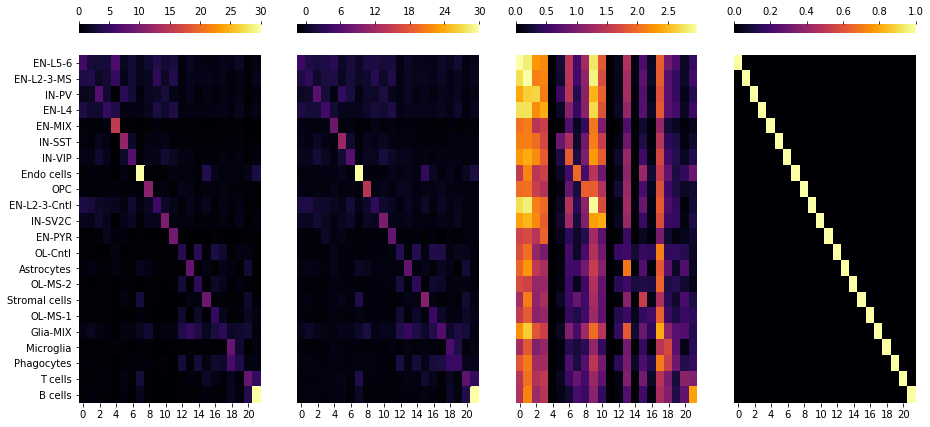

In [108]:
# Codebook Optimization Function
Expression_df = Gene_Matrix_Avg.drop(columns=[i for i in Gene_Matrix_Avg.columns if 'Blank' in i])
temp = np.zeros([len(Expression_df.columns),len(Expression_df.columns)])
for i in range(len(Expression_df.columns)):
    temp[i,i]=1
single_bit_codebook_df = pd.DataFrame(data=temp,index=Expression_df.columns)
single_bit_codebook_df

codebook_df = single_bit_codebook_df
gene_bitmap = {}
Readout_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns)
Z_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns)
Fold_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns)

for bit in codebook_df.columns:
    pos_cells = list(codebook_df[codebook_df[bit]==1].index)
    neg_cells = list(codebook_df[codebook_df[bit]!=1].index)
    pos_genes = []
    for cell in pos_cells:
        signal_df = pd.DataFrame(index=Expression_df.index)
        signal_df['pos_signal'] = pd.DataFrame(Expression_df[cell],index=Expression_df.index)
        signal_df['neg_signal'] = pd.DataFrame(data=np.max(Expression_df[neg_cells],axis=1),index=Expression_df.index)
        signal_df = signal_df[(signal_df['pos_signal']>0)&(signal_df['neg_signal']>0)]
        signal_df['difference'] = signal_df['pos_signal']-signal_df['neg_signal']
        signal_df['fold'] = signal_df['pos_signal']/signal_df['neg_signal']
        signal_df['f*d'] = signal_df['difference']*signal_df['fold']*signal_df['fold']
        signal_df=signal_df[signal_df['fold']>0]
        signal_df=signal_df[signal_df['difference']>0]
        signal_df=signal_df.sort_values('f*d',ascending=False)
        cell_genes = list(signal_df[:50].index)
        pos_genes.extend(cell_genes)
        print(cell,len(signal_df))
    gene_bitmap[bit] = pos_genes
    Readout_df[bit] = np.sum(Expression_df.loc[pos_genes],axis=0)
    neg_df = Expression_df.drop(columns=pos_cells)
    Z_df[bit] = (np.sum(Expression_df.loc[pos_genes],axis=0)-np.average(np.sum(neg_df.loc[pos_genes],axis=0)))/np.std(np.sum(neg_df.loc[pos_genes],axis=0))
    Fold_df[bit] = (np.sum(Expression_df.loc[pos_genes],axis=0)/np.average(np.sum(neg_df.loc[pos_genes],axis=0)))
fig, axes = plt.subplots(ncols=4, figsize=(15, 8))
ax1,ax2,ax3,ax4 = axes
Fold_df[Fold_df>30]=30
Z_df[Z_df>30]=30
im1 = sns.heatmap(Fold_df,cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"))
im2 = sns.heatmap(Z_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
im3 = sns.heatmap(np.log10(Readout_df+1),cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
plt.show()

In [9]:
import operator
from random import sample
import time
def codebook_generator(min_length=4,max_length=8,hamming=2,positive_bits=3,bits='01',wait=0.5):
    codebook_dict = {}
    ne = operator.ne
    for i in range(max_length+1):
        if i<min_length:
            continue
        best_candidates = []
        very_last_time = time.time()
        base_str = str(''.join('1' for i in range(positive_bits)))+str(''.join('0' for i in range(i-positive_bits)))
        print(base_str)
        while time.time()-very_last_time<10:
            candidates = []
            bad_candidates = []
            last_time = time.time()
            while time.time()-last_time<wait:
                candidate = ''.join(sample(base_str,len(base_str)))
                if candidate in candidates:
                    continue
                elif candidate in bad_candidates:
                    continue
                good = 0
                for can in candidates:
                        if sum(map(ne, can, candidate)) < hamming:
                            good+=1
                            bad_candidates.append(candidate)
                            break
                if good==0:
                    candidates.append(candidate)
                    last_time = time.time()
            if len(candidates)>len(best_candidates):
                best_candidates = candidates
                very_last_time = time.time()

        print(i,' Total Barcodes: ',len(best_candidates))
        codebook_dict[str(i)] = best_candidates
    return codebook_dict
codebook_dict = codebook_generator()

1110
4  Total Barcodes:  4
11100
5  Total Barcodes:  10
111000
6  Total Barcodes:  20
1110000
7  Total Barcodes:  35
11100000
8  Total Barcodes:  56


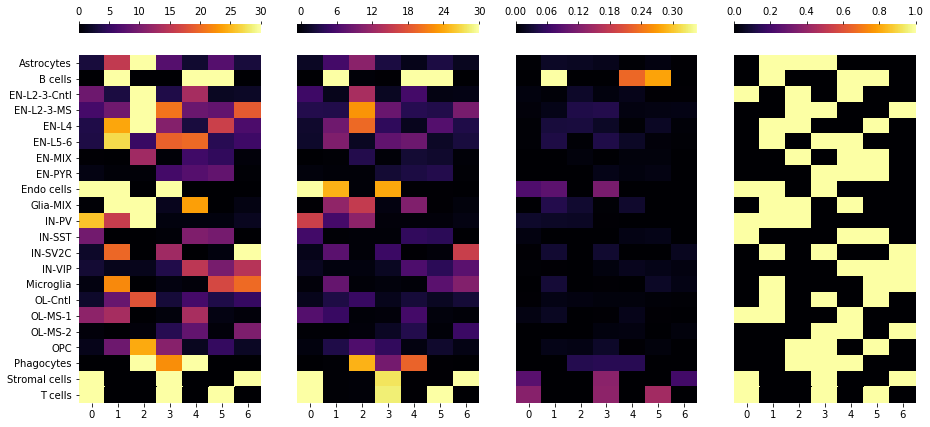

In [12]:
# Codebook Optimization Function
codebook = np.zeros([len(codebook_dict['7']),len(codebook_dict['7'][1])])
for y,barcode in enumerate(codebook_dict['7']):
    for x,bit in enumerate(str(barcode)):
        codebook[y,x] = int(bit)
multiplexed_codebook_df = pd.DataFrame(data=codebook)
Expression_df = Gene_Matrix_Avg
for i in range(len(multiplexed_codebook_df.index)-len(Expression_df.columns)):
    Expression_df['Blank'+str(i)] = 0
multiplexed_codebook_df.index = random.sample(list(Expression_df.columns),len(Expression_df.columns))
codebook_df = multiplexed_codebook_df.drop(index=[i for i in multiplexed_codebook_df.index if 'Blank' in i])
Expression_df = Expression_df.drop(columns=[i for i in Expression_df.columns if 'Blank' in i])
codebook_df=codebook_df.sort_index()

gene_bitmap = {}
Readout_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns).sort_index()
Z_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns).sort_index()
Fold_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns).sort_index()

for bit in codebook_df.columns:
    pos_cells = list(codebook_df[codebook_df[bit]==1].index)
    neg_cells = list(codebook_df[codebook_df[bit]!=1].index)
    pos_genes = []
    for cell in pos_cells:
        Expression_df = Gene_Matrix_Avg
        signal_df = pd.DataFrame(index=Expression_df.index)
        signal_df['pos_signal'] = pd.DataFrame(Expression_df[cell],index=Expression_df.index)
        signal_df['neg_signal'] = pd.DataFrame(data=np.average(Expression_df[neg_cells],axis=1),index=Expression_df.index)
        signal_df['pos_std'] = pd.DataFrame(Gene_Matrix_std[cell],index=Gene_Matrix_std.index)
        signal_df['neg_std'] = pd.DataFrame(data=np.average(Gene_Matrix_std[neg_cells],axis=1),index=Gene_Matrix_std.index)
        signal_df = signal_df[(signal_df['pos_signal']>0)&(signal_df['neg_signal']>0)]
        signal_df['difference'] = signal_df['pos_signal']-signal_df['neg_signal']
        signal_df['fold'] = signal_df['pos_signal']/signal_df['neg_signal']
        signal_df=signal_df[signal_df['fold']>0]
        signal_df=signal_df[signal_df['difference']>0]
        signal_df['snr'] = signal_df['pos_signal']/(signal_df['pos_std']*signal_df['neg_signal']*signal_df['neg_std'])
        signal_df['fd'] = signal_df['fold']*(signal_df['fold']**2)
        signal_df=signal_df.sort_values('snr',ascending=False)
        cell_genes = list(signal_df[:25].index)
        pos_genes.extend(cell_genes)
    gene_bitmap[bit] = pos_genes
    Readout_df[bit] = np.sum(Expression_df.loc[pos_genes],axis=0)
    neg_df = Expression_df.drop(columns=pos_cells)
    Z_df[bit] = (np.sum(Expression_df.loc[pos_genes],axis=0)-np.average(np.sum(neg_df.loc[pos_genes],axis=0)))/np.std(np.sum(neg_df.loc[pos_genes],axis=0))
    Fold_df[bit] = (np.sum(Expression_df.loc[pos_genes],axis=0)/np.average(np.sum(neg_df.loc[pos_genes],axis=0)))
fig, axes = plt.subplots(ncols=4, figsize=(15, 8))
ax1,ax2,ax3,ax4 = axes
Fold_df[Fold_df>30]=30
Z_df[Z_df>30]=30
im1 = sns.heatmap(Fold_df,cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"))
im2 = sns.heatmap(Z_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
im3 = sns.heatmap(np.log10(Readout_df+1),cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
plt.show()

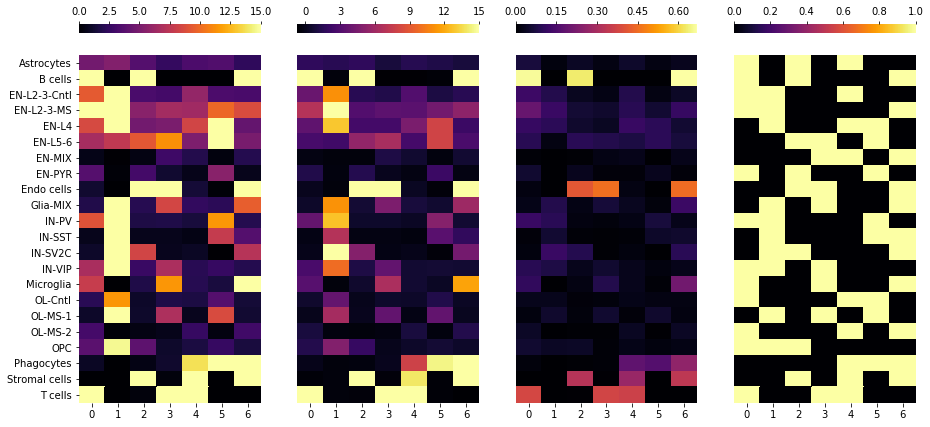

In [255]:
fig, axes = plt.subplots(ncols=4, figsize=(15, 8))
ax1,ax2,ax3,ax4 = axes
Fold_df[Fold_df>15]=15
Z_df[Z_df>15]=15
im1 = sns.heatmap(Fold_df,cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"))
im2 = sns.heatmap(Z_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
im3 = sns.heatmap(np.log10(Readout_df+1),cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
plt.show()

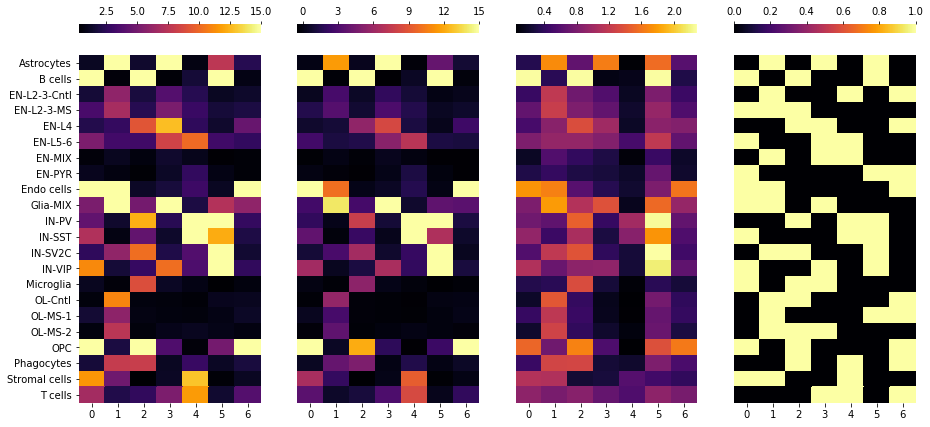

In [249]:
fig, axes = plt.subplots(ncols=4, figsize=(15, 8))
ax1,ax2,ax3,ax4 = axes
Fold_df[Fold_df>15]=15
Z_df[Z_df>15]=15
im1 = sns.heatmap(Fold_df,cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"))
im2 = sns.heatmap(Z_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
im3 = sns.heatmap(np.log10(Readout_df+1),cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
plt.show()

In [250]:
error_codebook_df = codebook_df.copy()
error_codebook_df[error_codebook_df==0]=-1
cost = np.sum((Readout_df/np.average(Readout_df*codebook_df,axis=0))*error_codebook_df,axis=1)
Error = np.median(cost)/np.min(cost)
Error

-5.057495298550922

In [252]:
log_Readout_df = np.log10(Readout_df+1)
error_codebook_df = codebook_df.copy()
error_codebook_df[error_codebook_df==0]=-1
cost = np.sum((log_Readout_df/np.average(log_Readout_df*codebook_df,axis=0))*error_codebook_df,axis=1)
Error = np.median(cost)/np.min(cost)
Error

-0.9484061475922756

In [258]:
error_codebook_df = codebook_df.copy()
error_codebook_df[error_codebook_df==0]=-1
cost = np.sum((Readout_df/np.average(Readout_df*codebook_df,axis=0))*error_codebook_df,axis=1)
Error = np.median(cost)/np.min(cost)
Error

130.43306912054706

In [260]:
log_Readout_df = np.log10(Readout_df+1)
error_codebook_df = codebook_df.copy()
error_codebook_df[error_codebook_df==0]=-1
cost = np.sum((log_Readout_df/np.average(log_Readout_df*codebook_df,axis=0))*error_codebook_df,axis=1)
Error = np.median(cost)/np.min(cost)
Error

14.644303368798774

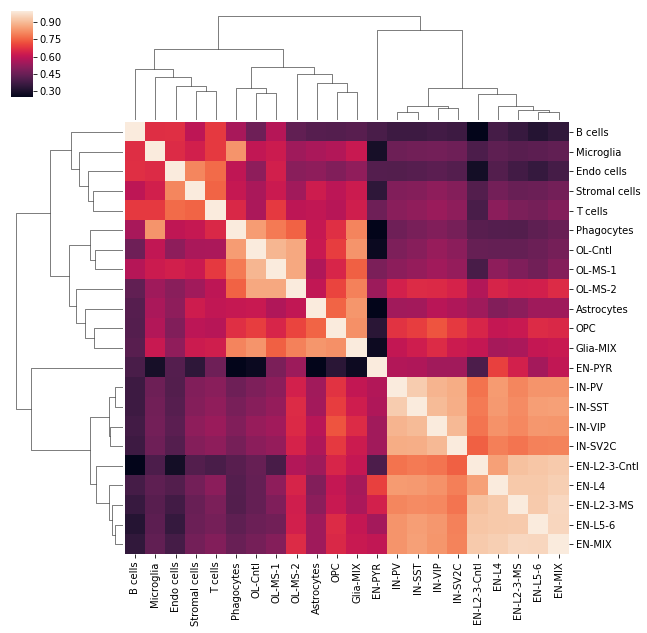

In [158]:
Expression_df = Gene_Matrix_Avg.drop(columns=[i for i in Gene_Matrix_Avg.columns if 'Blank' in i])
Expression_df = Expression_df[np.sum(Expression_df,axis=1)>np.mean(np.sum(Expression_df,axis=1))]
temp = np.zeros([len(Expression_df.columns),len(Expression_df.columns)])
for x,cell1 in enumerate(Expression_df.columns):
    for y,cell2 in enumerate(Expression_df.columns):
        if x==y:
            temp[x,y]=1
            continue
        if temp[x,y]!=0:
            continue
        S = spearmanr(Expression_df[cell1],Expression_df[cell2])
        temp[x,y]=S.correlation
        temp[y,x]=S.correlation
similarity_df = pd.DataFrame(data=temp,index=Expression_df.columns,columns=Expression_df.columns)
sns.clustermap(similarity_df)
plt.show()

In [102]:
import random
import tqdm.notebook as tqdm
from multiprocessing import Pool
from functools import partial
import sys

def generate_mutations(codebook_df,mutation_rate=1):
    for i in range(mutation_rate):
        A,B = random.sample(list(codebook_df.index),2)
        print(A,B)
        temp_A = codebook_df.loc[A]
        temp_B = codebook_df.loc[B]
        codebook_df.loc[A] = temp_B
        codebook_df.loc[B] = temp_A
    return codebook_df

def calculate_error(Readout_df,codebook_df): # convert to seperation based cost function
    log_Readout_df = np.log10(Readout_df+1)
    error_codebook_df = codebook_df.copy()
    error_codebook_df[error_codebook_df==0]=-1
    cost = np.sum((log_Readout_df/np.average(log_Readout_df*codebook_df,axis=0))*error_codebook_df,axis=1)
    Error = np.median(cost)/np.min(cost)
    return Error

def gene_picker(cell,Gene_Matrix_Avg,Gene_Matrix_std,optimizer='snr',genes=25):
    signal_df = pd.DataFrame(index=Gene_Matrix_Avg.index)
    signal_df['pos_signal'] = pd.DataFrame(Gene_Matrix_Avg[cell],index=Gene_Matrix_Avg.index)
    signal_df['neg_signal'] = pd.DataFrame(data=np.average(Gene_Matrix_Avg[neg_cells],axis=1),index=Gene_Matrix_Avg.index)
    signal_df['pos_std'] = pd.DataFrame(Gene_Matrix_std[cell],index=Gene_Matrix_std.index)
    signal_df['neg_std'] = pd.DataFrame(data=np.average(Gene_Matrix_std[neg_cells],axis=1),index=Gene_Matrix_std.index)
    signal_df = signal_df[(signal_df['pos_signal']>0)&(signal_df['neg_signal']>0)]
    signal_df['difference'] = signal_df['pos_signal']-signal_df['neg_signal']
    signal_df['fold'] = signal_df['pos_signal']/signal_df['neg_signal']
    signal_df=signal_df[signal_df['fold']>0]
    signal_df=signal_df[signal_df['difference']>0]
    signal_df['snr'] = signal_df['pos_signal']/(signal_df['pos_std']*signal_df['neg_signal']*signal_df['neg_std'])
    signal_df['fd'] = signal_df['fold']*(signal_df['fold']**2)
    signal_df=signal_df.sort_values(optimizer,ascending=False)
    cell_genes = list(signal_df[:genes].index)
    return cell_genes

def calculator(codebook_df,Gene_Matrix_Avg,Gene_Matrix_std,optimizer='snr',genes=25):
    gene_bitmap = {}
    Readout_df = pd.DataFrame(index=Gene_Matrix_Avg.columns,columns=codebook_df.columns).sort_index()
    for bit in codebook_df.columns:
        pos_cells = list(codebook_df[codebook_df[bit]==1].index)
        neg_cells = list(codebook_df[codebook_df[bit]!=1].index)
        pos_genes = []
        for cell in pos_cells:
            pos_genes.extend(gene_picker(cell,Gene_Matrix_Avg,Gene_Matrix_std,optimizer=optimizer,genes=genes))
        gene_bitmap[bit] = pos_genes
        Readout_df[bit] = np.sum(Gene_Matrix_Avg.loc[pos_genes],axis=0)
    Error = calculate_error(Readout_df,codebook_df)
    return Readout_df,codebook_df,Error

def selection(codebook_dfs,Readout_dfs,results,keepers=10):
    thresh = np.sort(results.copy())[-keepers-1]
    survivors = []
    survivor_dfs = []
    survivor_errors = []
    for i in np.where(results>thresh)[0]:
        survivors.append(codebook_dfs[i])
        survivor_dfs.append(Readout_dfs[i])
        survivor_errors.append(results[i])
    return survivors,survivor_dfs,survivor_errors

def artificial_selection(population,signal_df,keepers=10,ncpu=10,optimizer='snr',genes=25,chunksize=1):
    results = []
    Readout_dfs = []
    codebook_dfs = []
    if ncpu==1:
        for codebook_df in population:
            Readout_df,codebook_df,Error = calculator(codebook_df,Gene_Matrix_Avg,Gene_Matrix_std,optimizer=optimizer,genes=genes)
            Readout_dfs.append(Readout_df)
            codebook_dfs.append(codebook_df)
            results.append(Error)
    else:
        pfunc = partial(calculator,Gene_Matrix_Avg=Gene_Matrix_Avg,Gene_Matrix_std=Gene_Matrix_std,optimizer=optimizer,genes=genes)
        with Pool(ncpu) as p:
            sys.stdout.flush()
            for Readout_df,codebook_df,Error in p.imap(pfunc,population,chunksize=1):
                Readout_dfs.append(Readout_df)
                codebook_dfs.append(codebook_df)
                results.append(Error)
            sys.stdout.flush()
    survivors,survivor_dfs,survivor_errors = selection(codebook_dfs,Readout_dfs,results,keepers=keepers)
    return survivors,survivor_dfs,survivor_errors

def view_progress(survivors,survivor_dfs,survivor_errors,verbose=False):
    Results = {}
    for c,codebook_df in enumerate(survivors):
        Readout_df = survivor_dfs[c]
        Error = survivor_errors[c]
        for cell in codebook_df.index:
            if not cell in Results.keys():
                Results[cell] = {}
                Results[cell]['cell_pos'] = []
                Results[cell]['cell_neg'] = []
                Results[cell]['cell_sn'] = []
                Results[cell]['cell_diff'] = []
                Results[cell]['cell_snr'] = []
            cell_pos = []
            cell_neg = []
            R = Readout_df.loc[cell]
            for i,value in enumerate(codebook_df.loc[cell]):
                if value==1:
                    cell_pos.append(R[i])
                elif value==0:
                    cell_neg.append(R[i])
            cell_sn= np.average(cell_pos)/np.average(cell_neg)
            cell_diff = np.average(cell_pos)-np.average(cell_neg)
            cell_snr = np.average(cell_pos)/(np.std(cell_pos)*np.average(cell_neg)*np.std(cell_neg))
            Results[cell]['cell_pos'].extend(cell_pos)
            Results[cell]['cell_neg'].extend(cell_neg)
            Results[cell]['cell_sn'].append(cell_sn)
            Results[cell]['cell_diff'].append(cell_diff)
            Results[cell]['cell_snr'].append(cell_snr)
            
    for cell in Results.keys():
        Results[cell]['cell_pos_avg'] = np.average(Results[cell]['cell_pos'])
        Results[cell]['cell_neg_avg'] = np.average(Results[cell]['cell_neg'])
        Results[cell]['cell_pos_std'] = np.std(Results[cell]['cell_pos'])
        Results[cell]['cell_neg_std'] = np.std(Results[cell]['cell_neg'])
        Results[cell]['cell_sn_avg'] = np.average(Results[cell]['cell_sn'])
        Results[cell]['cell_diff_avg'] = np.average(Results[cell]['cell_diff'])
        Results[cell]['cell_snr_avg'] = np.average(Results[cell]['cell_snr'])
        Results[cell]['cell_sn_std'] = np.std(Results[cell]['cell_sn'])
        Results[cell]['cell_diff_std'] = np.std(Results[cell]['cell_diff'])
        Results[cell]['cell_snr_std'] = np.std(Results[cell]['cell_snr'])
        
    if verbose:
        df_dict = {}
        for cell,cell_result in Results.items():
            for key,values in cell_result.items():
                if 'avg' in key:
                    continue
                if 'std' in key:
                    continue
                if not key in df_dict.keys():
                    df_dict[key]= pd.DataFrame()
                df_dict[key][cell] = values 
        for key,df in df_dict.items():
            plt.figure(figsize=[12,4])
            chart = sns.violinplot(data=np.log10(df+1))
            chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
            plt.title(key)
            plt.show()
    return Results

def generate_random_codebook(codebook_dict,Gene_Matrix_Avg,key=7):
    codebook = np.zeros([len(codebook_dict[key]),len(codebook_dict[key][1])])
    for y,barcode in enumerate(codebook_dict[key]):
        for x,bit in enumerate(str(barcode)):
            codebook[y,x] = int(bit)
    multiplexed_codebook_df = pd.DataFrame(data=codebook)
    for i in range(len(multiplexed_codebook_df.index)-len(Expression_df.columns)):
        Gene_Matrix_Avg['Blank'+str(i)] = 0
    multiplexed_codebook_df.index = random.sample(list(Gene_Matrix_Avg.columns),len(Gene_Matrix_Avg.columns))
    codebook_df = multiplexed_codebook_df.sort_index()
    return codebook_df

def Evolution(codebook_dict,Gene_Matrix_Avg,Gene_Matrix_std,keepers=10,genes=25,bits=7,ncpu=1,optimizer='snr',mutation_rate=1,iterations=100,verbose=False,chunksize=100):
    # Initial Population
    survivors = []
    for K in range(keepers):
        survivors.append(generate_random_codebook(codebook_dict,Gene_Matrix_Avg,key=bits))
    if verbose:
        print('Starting Population')
    Iteration_results = {}
    for I in tqdm.tqdm(range(iterations)):
        Iteration_results[I]={}
        mutations = generate_mutations(survivors,mutation_rate=mutation_rate)
        population = survivors+mutations
        Iteration_results[I]['population'] = population
        survivors,survivor_dfs,survivor_errors = artificial_selection(population,Gene_Matrix_Avg,Gene_Matrix_std,keepers=keepers,ncpu=ncpu,optimizer=optimizer,noise=noise,chunksize=chunksize)
        Iteration_results[I]['survivors'] = survivors
        Iteration_results[I]['survivor_dfs'] = survivor_dfs
        Iteration_results[I]['survivor_errors'] = survivor_errors
        Results = view_progress(survivors,survivor_dfs,survivor_errors,verbose=verbose)
        Iteration_results[I]['Results'] = Results
    if verbose:
        print('')
        print('Elite Survivor')
    elite_survivor,elite_survivor_df = artificial_selection(population,Gene_Matrix_Avg,Gene_Matrix_std,keepers=1,ncpu=ncpu,optimizer=optimizer,noise=noise,chunksize=chunksize)
    Results = view_progress(elite_survivor,elite_survivor_df,verbose=verbose)
    return Iteration_results,elite_survivor

def qc_viewer(Iteration_results):
    Values_dict = {}
    Error_dict = {}

    for I in Iteration_results.keys():
        Results = Iteration_results[I]['Results']
        for cell,cell_result in Results.items():
            for key,values in cell_result.items():
                new_key = key[:-4]
                if 'avg' in key:
                    if not new_key in Values_dict.keys():
                        Values_dict[new_key]={}
                    if not cell in Values_dict[new_key].keys():
                        Values_dict[new_key][cell]=[]
                    Values_dict[new_key][cell].append(values)
                if 'std' in key:
                    if not new_key in Error_dict.keys():
                        Error_dict[new_key]={}
                    if not cell in Error_dict[new_key].keys():
                        Error_dict[new_key][cell]=[]
                    Error_dict[new_key][cell].append(values)
    for key,val_dict in Values_dict.items():
        plt.figure(figsize=[12,4])
        for cell,values in val_dict.items():
            Y = np.log10(np.array(values)+1)
            E = np.log10(np.array(Error_dict[key][cell])+1)
            X = range(len(Y))
            plt.plot(X,Y,label=cell)
            plt.fill_between(X,Y-E,Y+E,alpha=0.2)
            plt.xlabel('Iterations')
            plt.ylabel('log10'+key)
        plt.title(key)
        plt.legend(loc="right",ncol=4,bbox_to_anchor=(1.65, 0.5))
        plt.show()
    
# bits=7
# codebook = np.zeros([len(codebook_dict[bits]),len(codebook_dict[bits][1])])
# for y,barcode in enumerate(codebook_dict[bits]):
#     for x,bit in enumerate(str(barcode)):
#         codebook[y,x] = int(bit)
# multiplexed_codebook_df = pd.DataFrame(data=codebook)
# for i in range(len(multiplexed_codebook_df.index)-len(Gene_Matrix_Avg.columns)):
#     Gene_Matrix_Avg['Blank'+str(i)] = 0
#     Gene_Matrix_std['Blank'+str(i)] = 0
# Iteration_results,elite_survivor = Evolution(codebook_dict,Gene_Matrix_Avg,Gene_Matrix_std,keepers=10,genes=25,bits=7,ncpu=1,optimizer='snr',mutation_rate=1,iterations=100,verbose=False,chunksize=100)
# qc_viewer(Iteration_results)



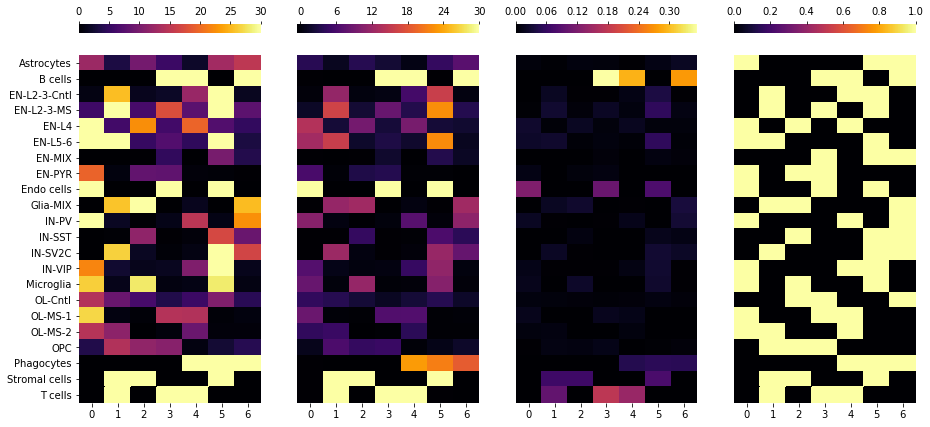

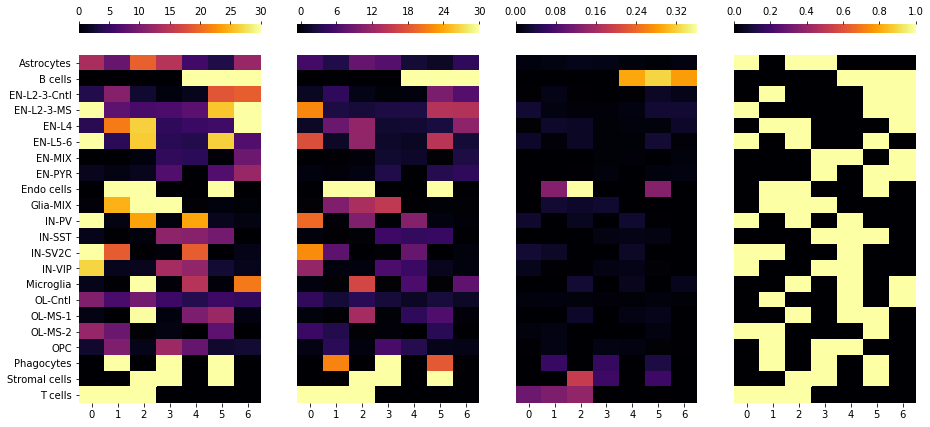

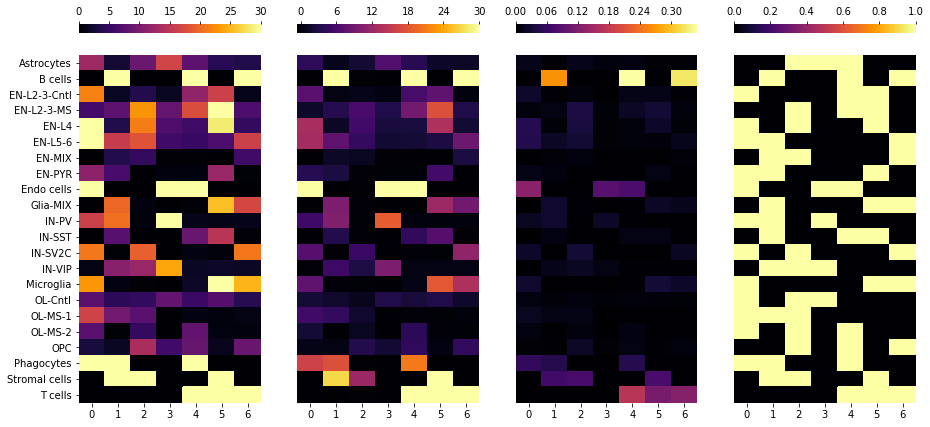

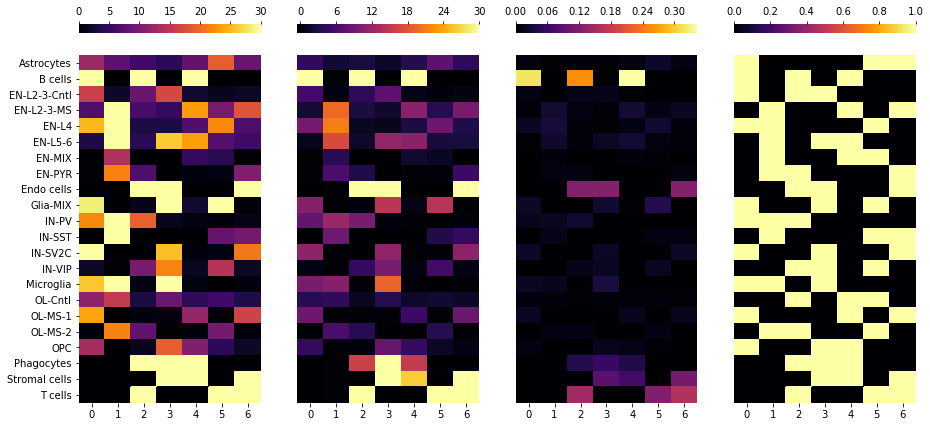

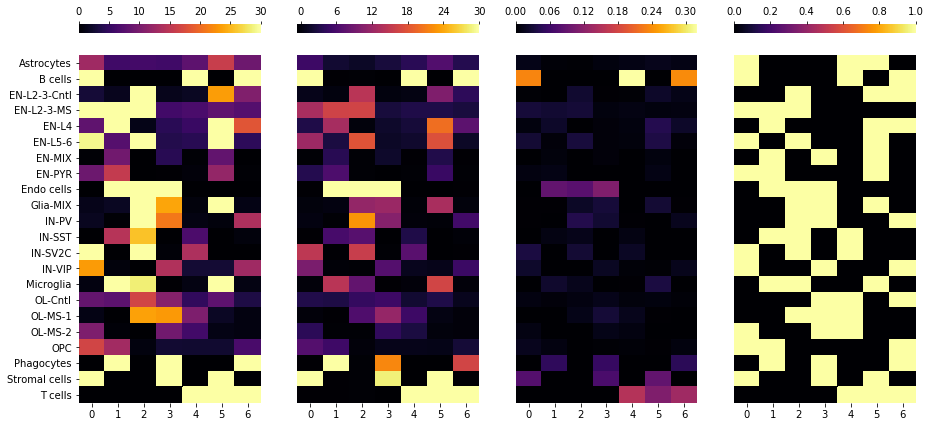

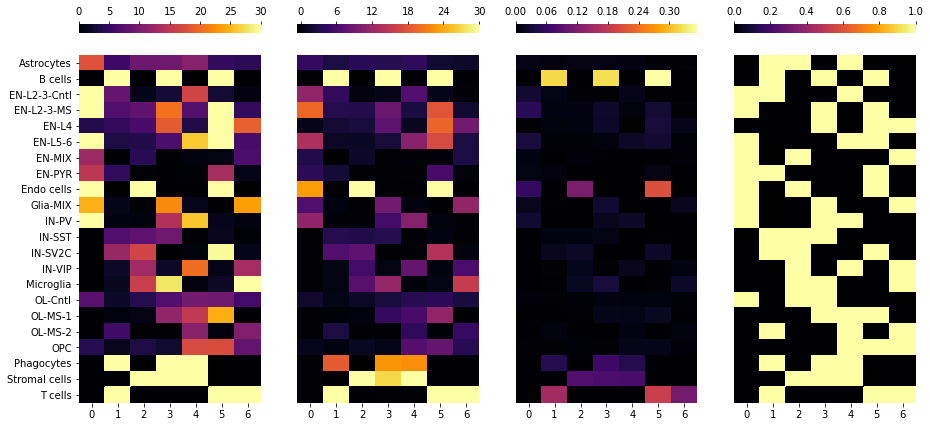

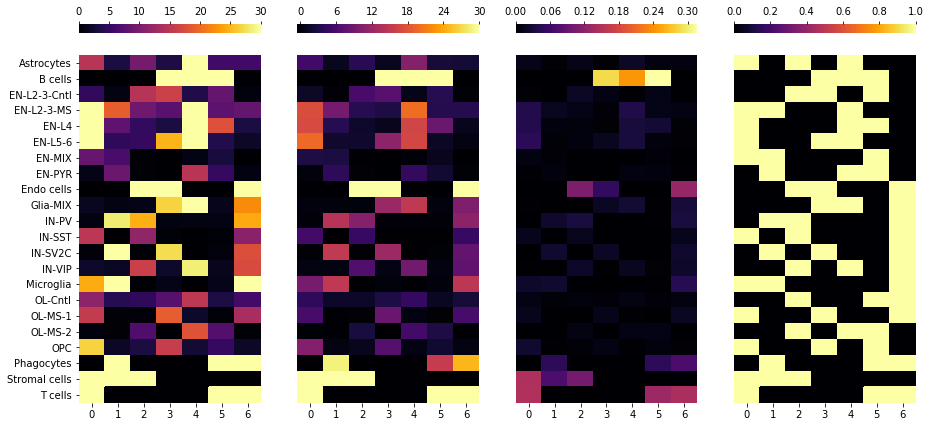

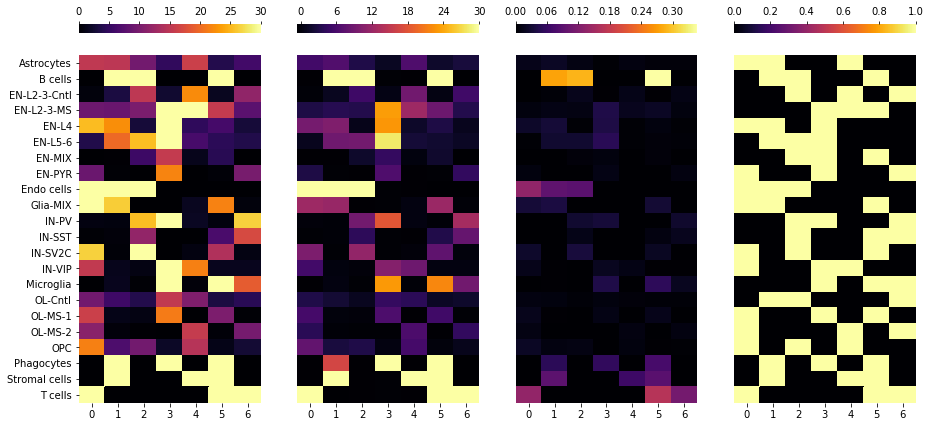

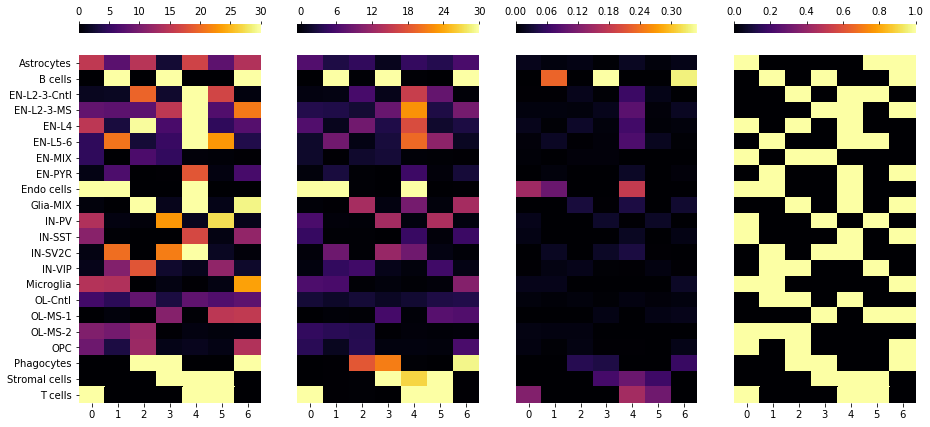

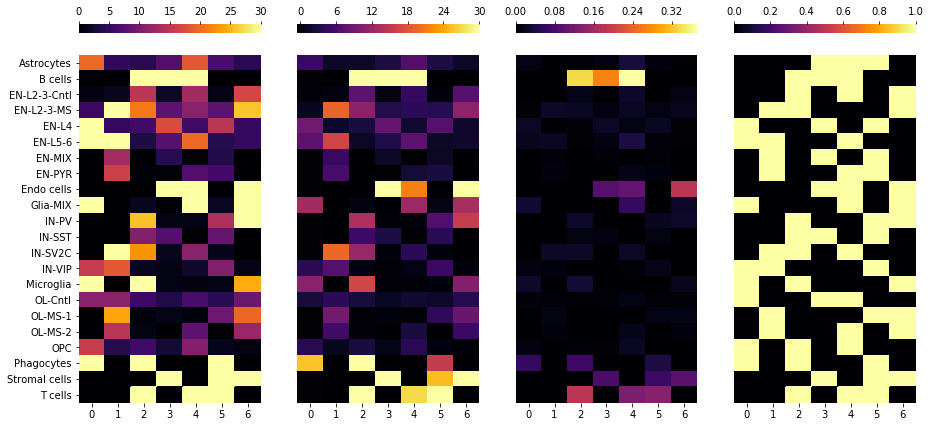

In [56]:
def generate_Readout_df(codebook_dict,Gene_Matrix_Avg,Gene_Matrix_std):
    # Codebook Optimization Function
    codebook = np.zeros([len(codebook_dict['7']),len(codebook_dict['7'][1])])
    for y,barcode in enumerate(codebook_dict['7']):
        for x,bit in enumerate(str(barcode)):
            codebook[y,x] = int(bit)
    multiplexed_codebook_df = pd.DataFrame(data=codebook)
    Expression_df = Gene_Matrix_Avg
    for i in range(len(multiplexed_codebook_df.index)-len(Expression_df.columns)):
        Expression_df['Blank'+str(i)] = 0
    multiplexed_codebook_df.index = random.sample(list(Expression_df.columns),len(Expression_df.columns))
    codebook_df = multiplexed_codebook_df.drop(index=[i for i in multiplexed_codebook_df.index if 'Blank' in i])
    Expression_df = Expression_df.drop(columns=[i for i in Expression_df.columns if 'Blank' in i])
    codebook_df=codebook_df.sort_index()

    gene_bitmap = {}
    Readout_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns).sort_index()
    Z_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns).sort_index()
    Fold_df = pd.DataFrame(index=Expression_df.columns,columns=codebook_df.columns).sort_index()

    for bit in codebook_df.columns:
        pos_cells = list(codebook_df[codebook_df[bit]==1].index)
        neg_cells = list(codebook_df[codebook_df[bit]!=1].index)
        pos_genes = []
        for cell in pos_cells:
            Expression_df = Gene_Matrix_Avg
            signal_df = pd.DataFrame(index=Expression_df.index)
            signal_df['pos_signal'] = pd.DataFrame(Expression_df[cell],index=Expression_df.index)
            signal_df['neg_signal'] = pd.DataFrame(data=np.average(Expression_df[neg_cells],axis=1),index=Expression_df.index)
            signal_df['pos_std'] = pd.DataFrame(Gene_Matrix_std[cell],index=Gene_Matrix_std.index)
            signal_df['neg_std'] = pd.DataFrame(data=np.average(Gene_Matrix_std[neg_cells],axis=1),index=Gene_Matrix_std.index)
            signal_df = signal_df[(signal_df['pos_signal']>0)&(signal_df['neg_signal']>0)]
            signal_df['difference'] = signal_df['pos_signal']-signal_df['neg_signal']
            signal_df['fold'] = signal_df['pos_signal']/signal_df['neg_signal']
            signal_df=signal_df[signal_df['fold']>0]
            signal_df=signal_df[signal_df['difference']>0]
            signal_df['snr'] = signal_df['pos_signal']/(signal_df['pos_std']*signal_df['neg_signal']*signal_df['neg_std'])
            signal_df['fd'] = signal_df['fold']*(signal_df['fold']**2)
            signal_df=signal_df.sort_values('snr',ascending=False)
            cell_genes = list(signal_df[:25].index)
            pos_genes.extend(cell_genes)
        gene_bitmap[bit] = pos_genes
        Readout_df[bit] = np.sum(Expression_df.loc[pos_genes],axis=0)
        neg_df = Expression_df.drop(columns=pos_cells)
        Z_df[bit] = (np.sum(Expression_df.loc[pos_genes],axis=0)-np.average(np.sum(neg_df.loc[pos_genes],axis=0)))/np.std(np.sum(neg_df.loc[pos_genes],axis=0))
        Fold_df[bit] = (np.sum(Expression_df.loc[pos_genes],axis=0)/np.average(np.sum(neg_df.loc[pos_genes],axis=0)))
    fig, axes = plt.subplots(ncols=4, figsize=(15, 8))
    ax1,ax2,ax3,ax4 = axes
    Fold_df[Fold_df>30]=30
    Z_df[Z_df>30]=30
    im1 = sns.heatmap(Fold_df,cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"))
    im2 = sns.heatmap(Z_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    im3 = sns.heatmap(np.log10(Readout_df+1),cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    plt.show()
    return Readout_df,codebook_df
survivors = []
survivor_dfs = []
survivor_errors = []
for i in range(10):
    Readout_df,codebook_df = generate_Readout_df(codebook_dict,Gene_Matrix_Avg,Gene_Matrix_std)
    survivors.append(codebook_df)
    survivor_dfs.append(Readout_df)
    survivor_errors.append(0)

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in double_scalars
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


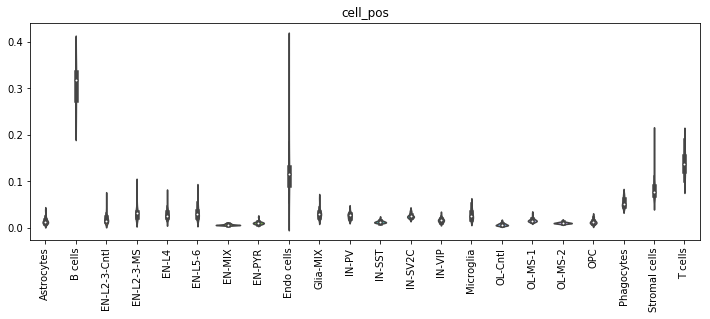

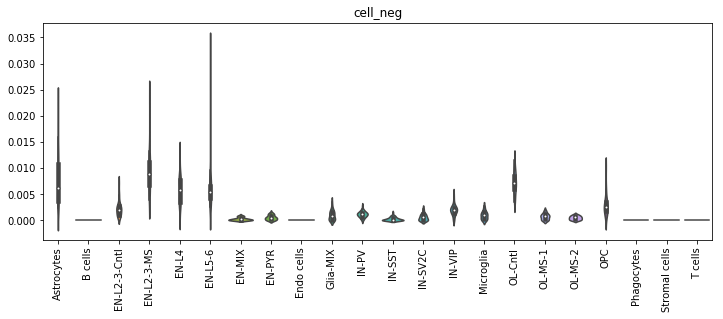

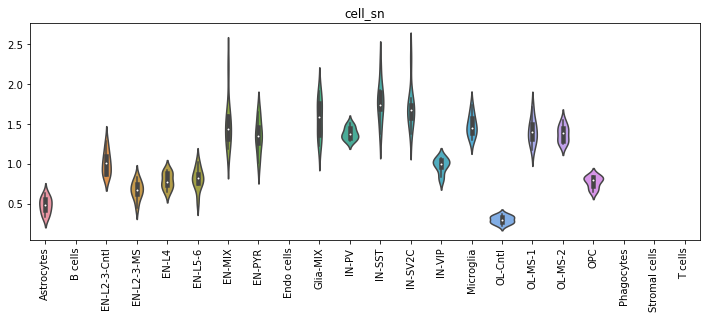

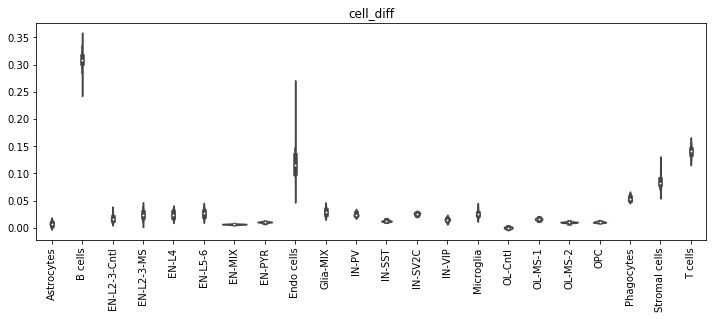

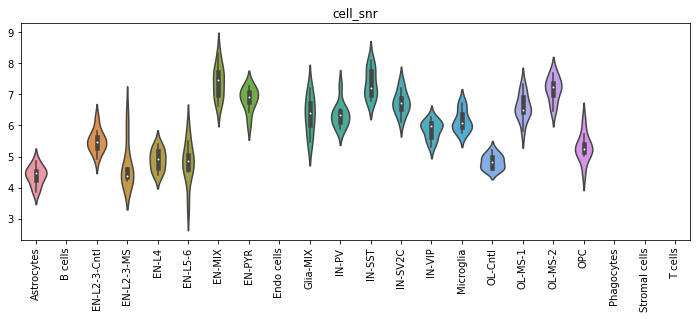

In [103]:
Results = view_progress(survivors,survivor_dfs,survivor_errors,verbose=True)

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in double_scalars
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


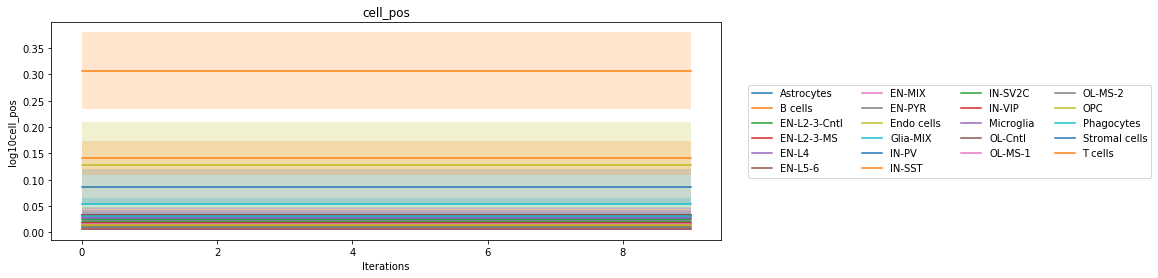

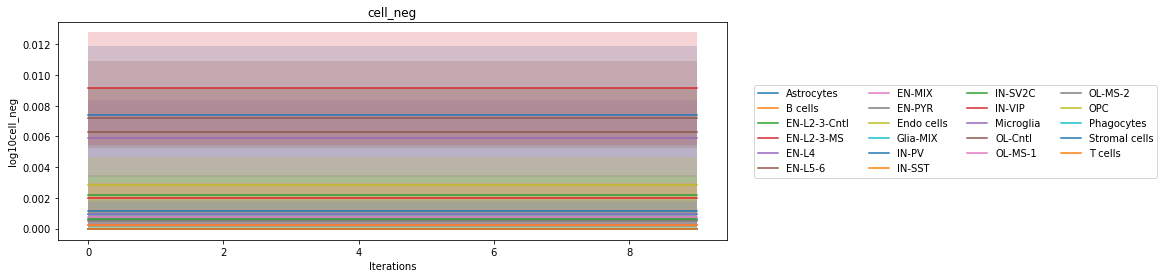

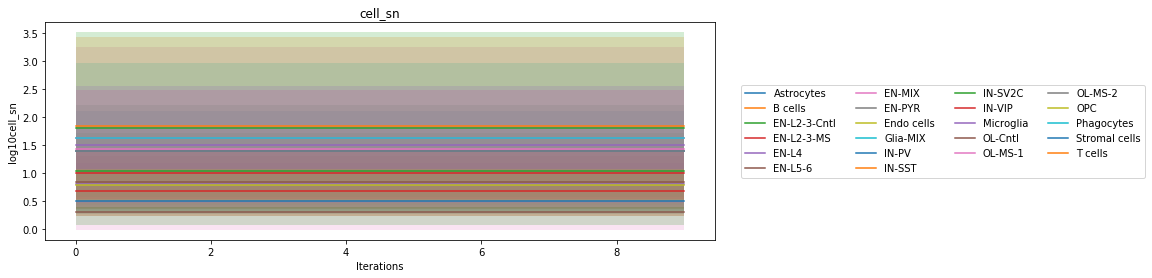

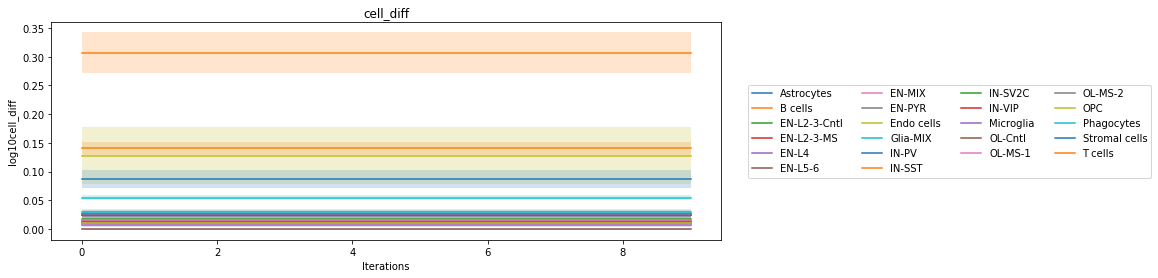

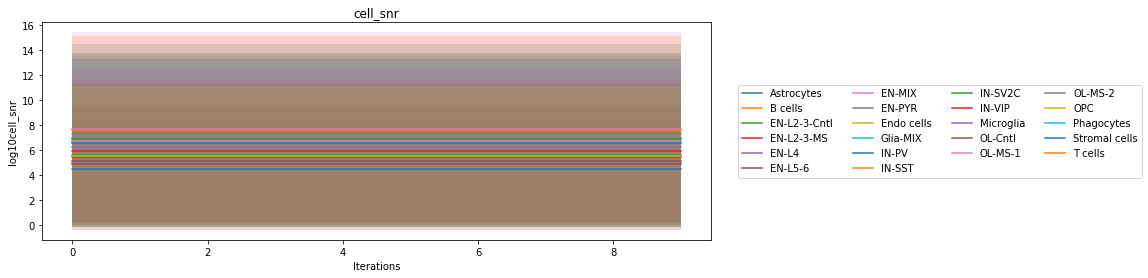

In [104]:
Iteration_results = {}
for I in tqdm.tqdm(range(10)):
    Iteration_results[I]={}
    Iteration_results[I]['Results'] = view_progress(survivors,survivor_dfs,survivor_errors,verbose=False)
qc_viewer(Iteration_results)

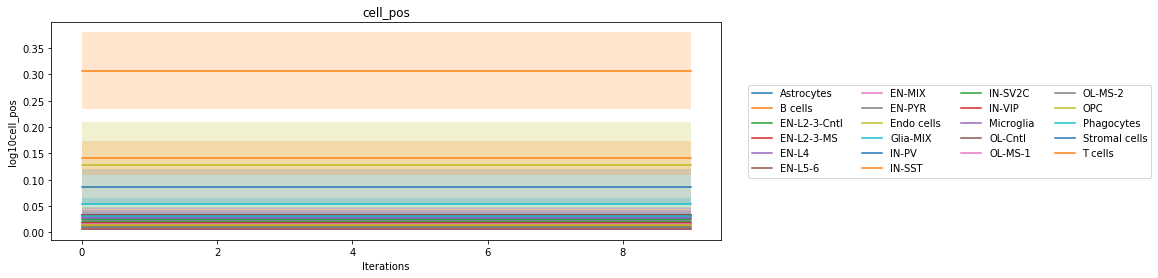

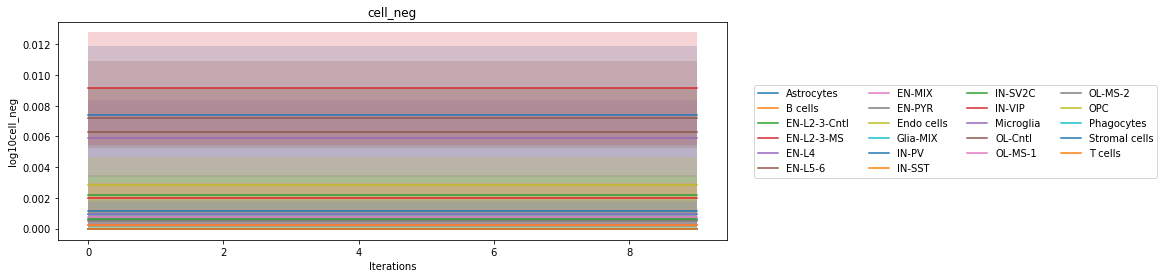

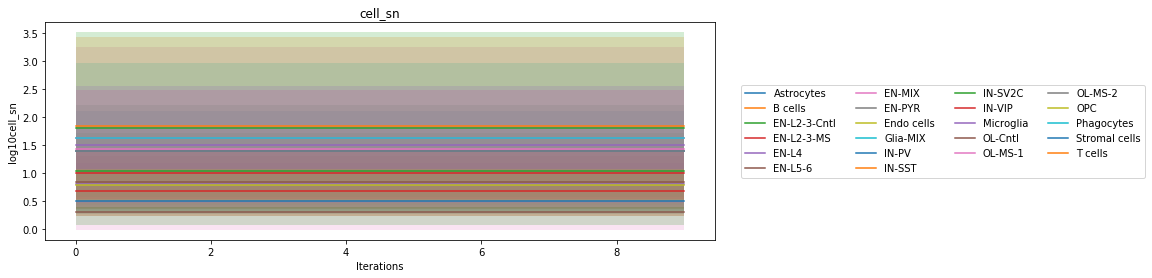

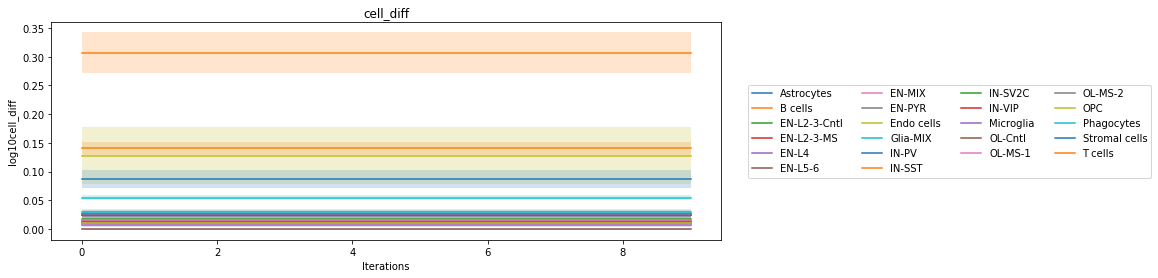

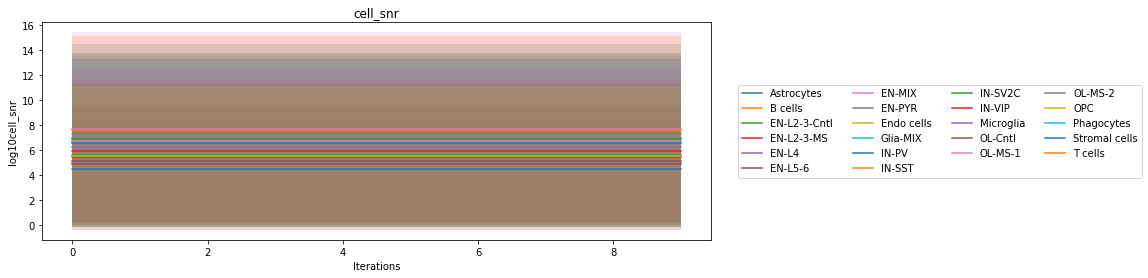

In [101]:
Values_dict = {}
Error_dict = {}

for I in Iteration_results.keys():
    Results = Iteration_results[I]['Results']
    for cell,cell_result in Results.items():
        for key,values in cell_result.items():
            new_key = key[:-4]
            if 'avg' in key:
                if not new_key in Values_dict.keys():
                    Values_dict[new_key]={}
                if not cell in Values_dict[new_key].keys():
                    Values_dict[new_key][cell]=[]
                Values_dict[new_key][cell].append(values)
            if 'std' in key:
                if not new_key in Error_dict.keys():
                    Error_dict[new_key]={}
                if not cell in Error_dict[new_key].keys():
                    Error_dict[new_key][cell]=[]
                Error_dict[new_key][cell].append(values)

for key,val_dict in Values_dict.items():
    plt.figure(figsize=[12,4])
    for cell,values in val_dict.items():
        Y = np.log10(np.array(values)+1)
        E = np.log10(np.array(Error_dict[key][cell])+1)
        X = range(len(Y))
        plt.plot(X,Y,label=cell)
        plt.fill_between(X,Y-E,Y+E,alpha=0.2)
        plt.xlabel('Iterations')
        plt.ylabel('log10'+key)
    plt.title(key)
    plt.legend(loc="right",ncol=4,bbox_to_anchor=(1.65, 0.5))
    plt.show()

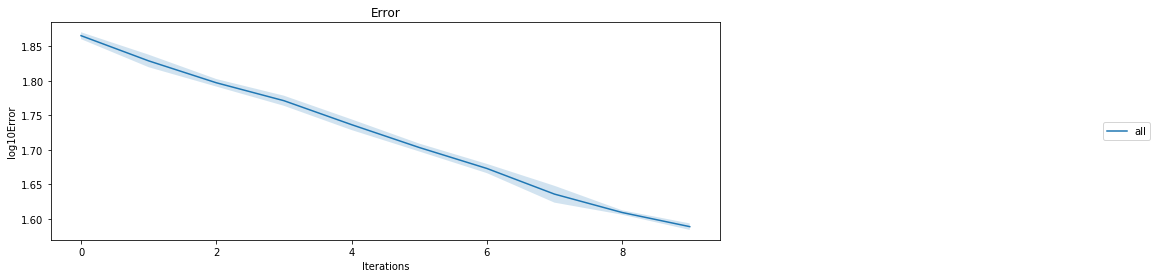

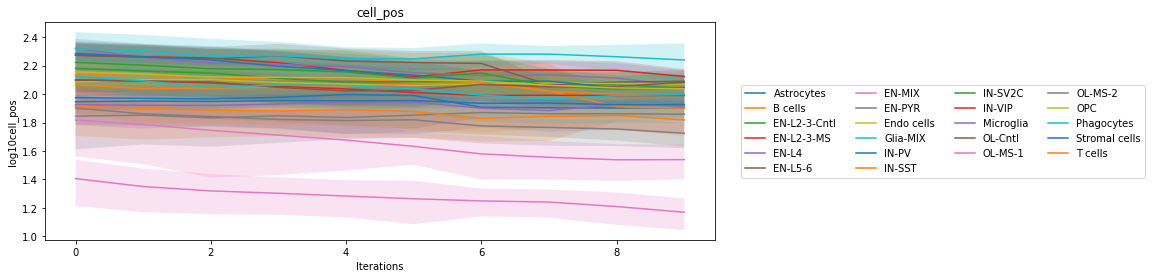

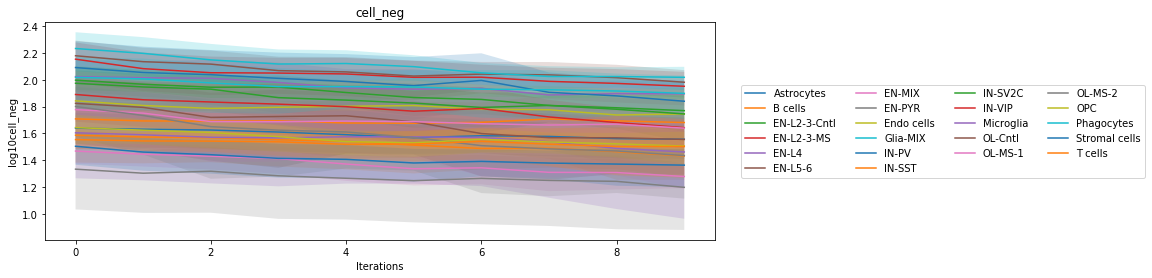

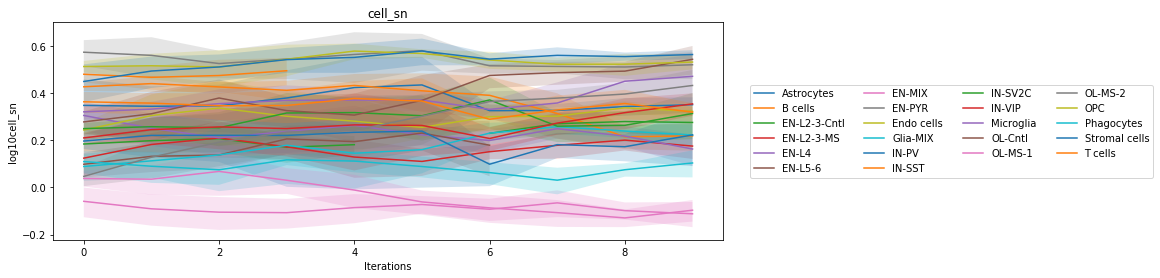

In [194]:
Iteration_results = pickle.load(open('/bigstore/GeneralStorage/Zach/MERCI/phs001836/Iteration_results.pkl','rb'))
def qc_viewer(Iteration_results):
    Values_dict = {}
    Error_dict = {}

    for I in Iteration_results.keys():
        try:
            Results = Iteration_results[I]['Results']
        except:
            continue
        for cell,cell_result in Results.items():
            if 'Blank' in cell:
                continue
            for key,values in cell_result.items():
                new_key = key[:-4]
                if 'avg' in key:
                    if not new_key in Values_dict.keys():
                        Values_dict[new_key]={}
                    if not cell in Values_dict[new_key].keys():
                        Values_dict[new_key][cell]=[]
                    Values_dict[new_key][cell].append(values)
                if 'std' in key:
                    if not new_key in Error_dict.keys():
                        Error_dict[new_key]={}
                    if not cell in Error_dict[new_key].keys():
                        Error_dict[new_key][cell]=[]
                    Error_dict[new_key][cell].append(values)
    for key,val_dict in Values_dict.items():
        if 'diff' in key:
            continue
        if 'snr' in key:
            continue
        plt.figure(figsize=[12,4])
        for cell,values in val_dict.items():
            Y = np.log10(np.array(values))
            E_max = np.log10((np.array(values)+np.array(Error_dict[key][cell])))
            E_min = np.log10((np.array(values)-np.array(Error_dict[key][cell])))
            X = range(len(Y))
            plt.plot(X,Y,label=cell)
            plt.fill_between(X,E_max,E_min,alpha=0.2)
            plt.xlabel('Iterations')
            plt.ylabel('log10'+key)
        plt.title(key)
        plt.legend(loc="right",ncol=4,bbox_to_anchor=(1.65, 0.5))
        plt.show()
qc_viewer(Iteration_results)

In [209]:
Iteration_results[0]['Results']['all']

{'Error': [156.11350292689437,
  165.9106915167903,
  166.22803088329027,
  167.54603854113543,
  173.23361230391532,
  173.67355293756796,
  175.73095074032588,
  177.12967833371547,
  177.41540588332418,
  177.58175521714531],
 'Error_avg': 171.05632192841045,
 'Error_std': 6.623800784756501}

Iteration Number 1
Error: 71.31689131095602


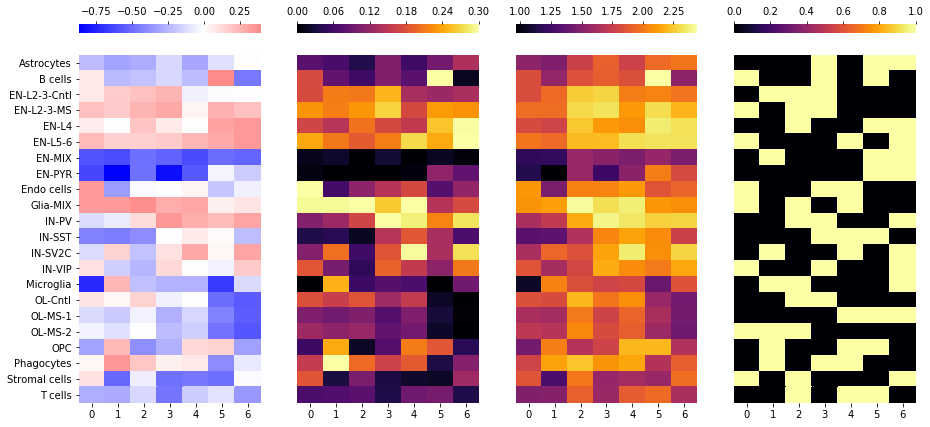

Iteration Number 2
Error: 65.29826213311081


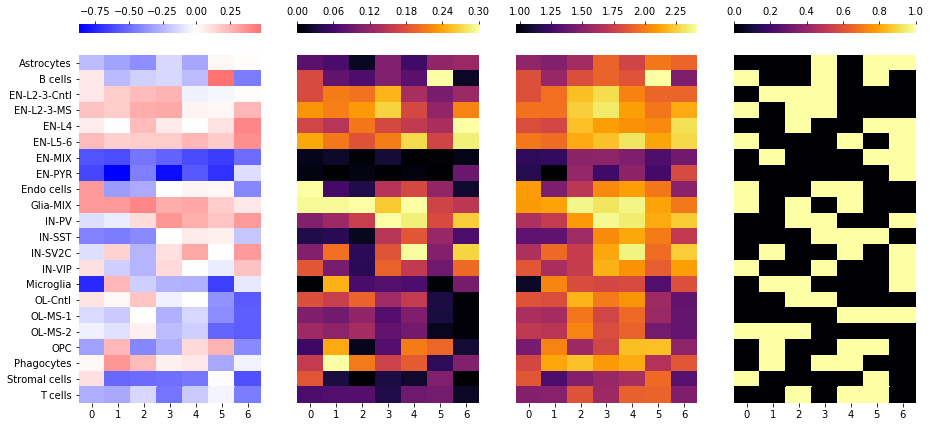

Iteration Number 3
Error: 61.22384562992948


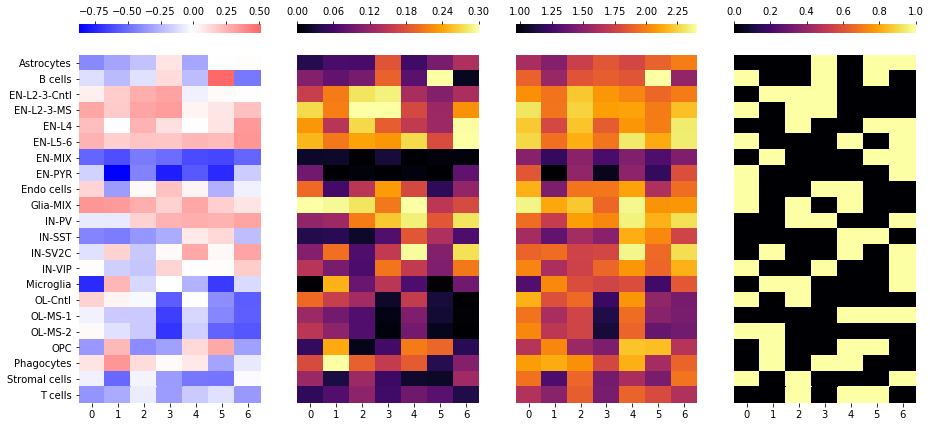

Iteration Number 4
Error: 57.5082715628446


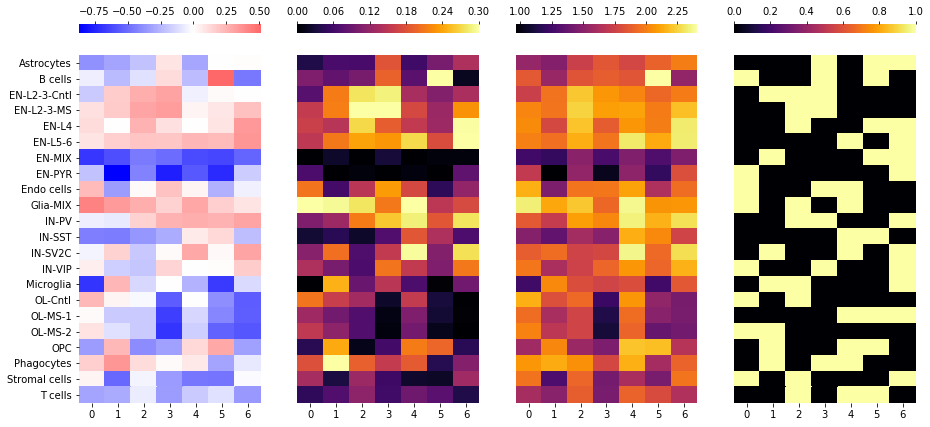

Iteration Number 5
Error: 51.96460838998129


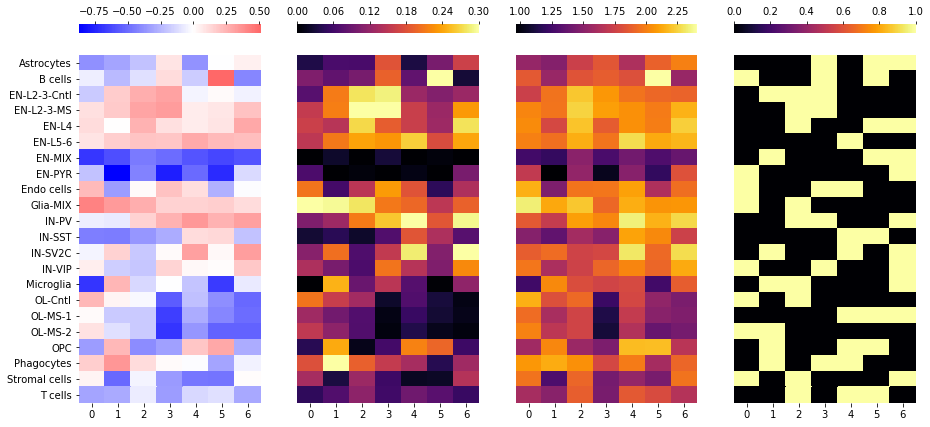

Iteration Number 6
Error: 49.24911428026088


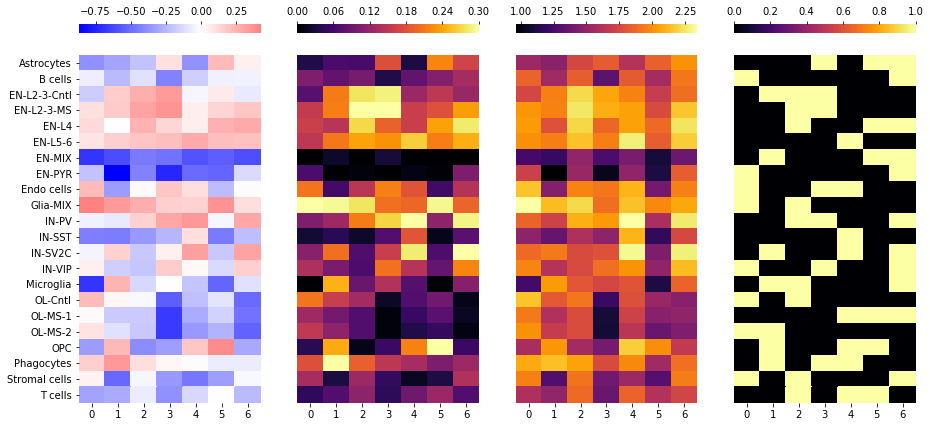

Iteration Number 7
Error: 45.47626547015745


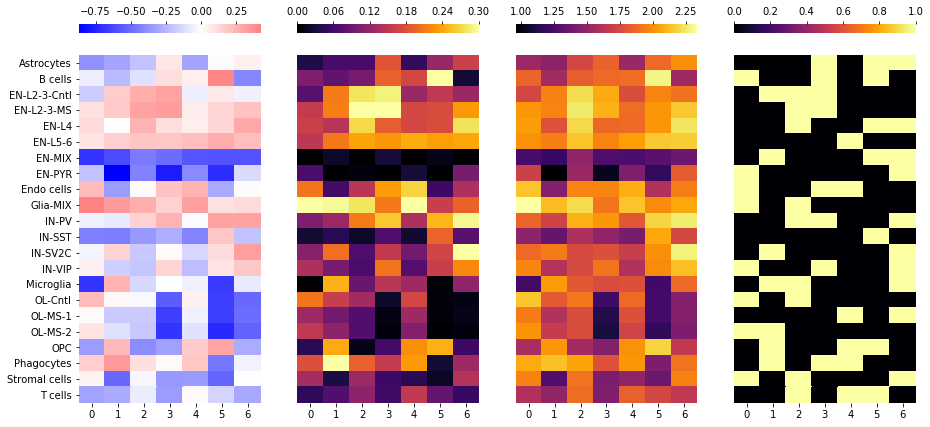

Iteration Number 8
Error: 41.50235737687317


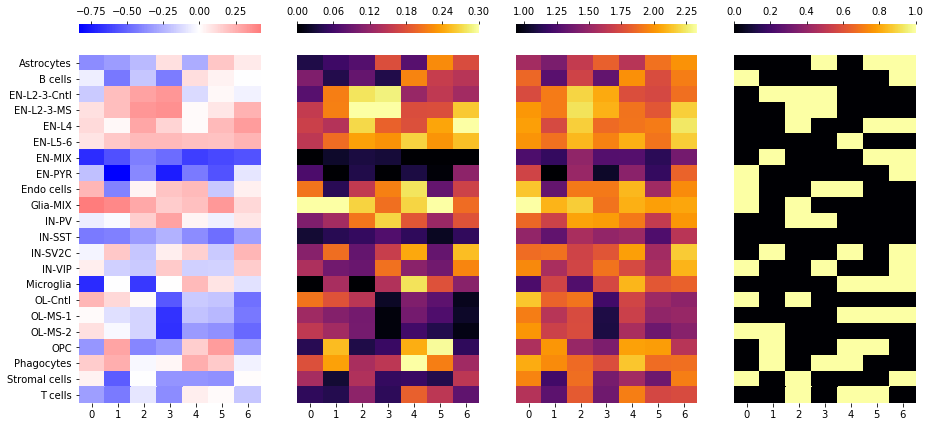

Iteration Number 9
Error: 40.0333773216559


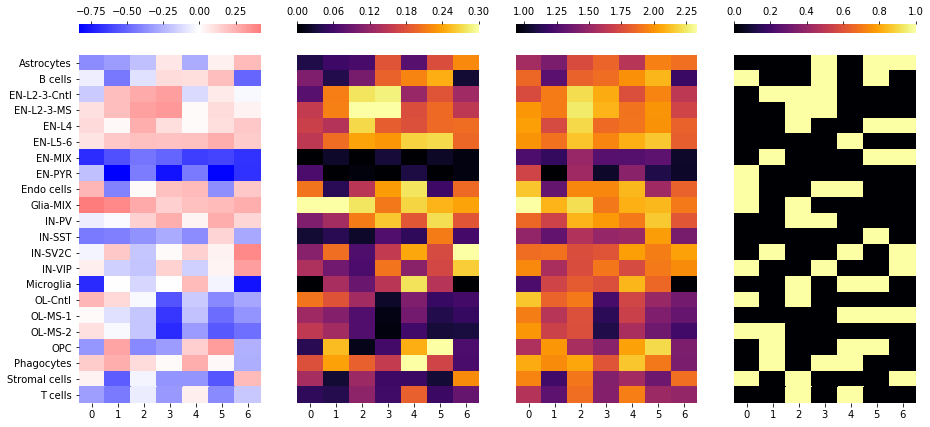

Iteration Number 10
Error: 37.89686294603922


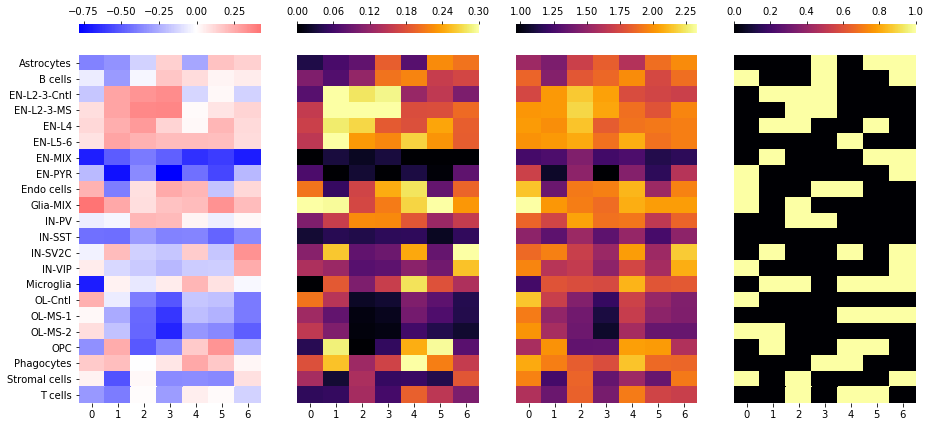

In [195]:
for i in Iteration_results.keys():
    print('Iteration Number',i+1)
    print('Error:',Iteration_results[i]['survivor_errors'][0])
    codebook_df = Iteration_results[i]['survivors'][0]
    Readout_df = Iteration_results[i]['survivor_dfs'][0]
    codebook_df = codebook_df.drop(index=[i for i in codebook_df.index if 'Blank' in i])
    Readout_df = Readout_df.drop(index=[i for i in Readout_df.index if 'Blank' in i])
    bkg_sub_Readout_df = Readout_df-np.min(Readout_df,axis=0)
    norm_Readout_df = bkg_sub_Readout_df/np.max(bkg_sub_Readout_df,axis=0)
    fig, axes = plt.subplots(ncols=4, figsize=(15, 8))
    ax1,ax2,ax3,ax4 = axes
    im1 = sns.heatmap(np.log10(Readout_df/np.average(Readout_df,axis=0)),cmap='bwr',center=0,ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
    im2 = sns.heatmap(np.log10(norm_Readout_df+1),cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    im3 = sns.heatmap(np.log10(Readout_df+1),cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    plt.show()

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x = StandardScaler().fit_transform(Readout_df)
X = pd.DataFrame(x,index=Readout_df.index)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=Readout_df.index)
px.scatter_3d(principalDf,x=0,y=1,z=2,color=3,text=principalDf.index)

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = StandardScaler().fit_transform(Readout_df)
X = pd.DataFrame(x,index=Readout_df.index)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=Readout_df.index)
px.scatter(principalDf,x=0,y=1,text=principalDf.index)

In [198]:
x = StandardScaler().fit_transform(Readout_df)
X = pd.DataFrame(x,index=Readout_df.index)
X_embedded = TSNE(n_components=3).fit_transform(X)
X_embedded = pd.DataFrame(data = X_embedded,index=Readout_df.index)
px.scatter_3d(X_embedded,x=0,y=1,z=2,text=X_embedded.index)

In [199]:
x = StandardScaler().fit_transform(Readout_df)
X = pd.DataFrame(x,index=Readout_df.index)
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded = pd.DataFrame(data = X_embedded,index=Readout_df.index)
px.scatter(X_embedded,x=0,y=1,text=X_embedded.index)

In [200]:
X = Readout_df
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded = pd.DataFrame(data = X_embedded,index=Readout_df.index)
px.scatter(X_embedded,x=0,y=1,text=X_embedded.index)

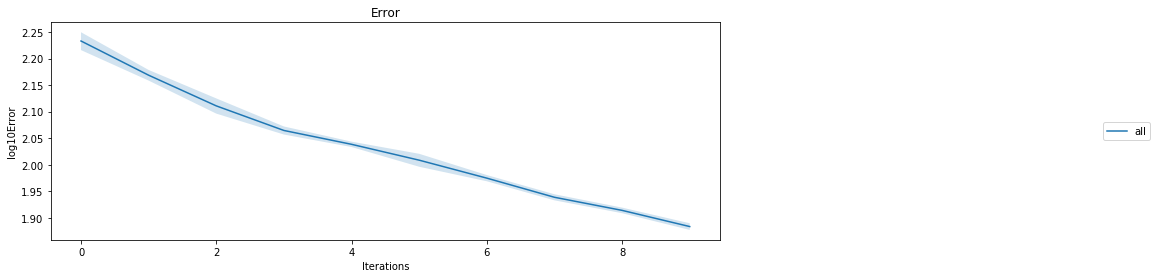

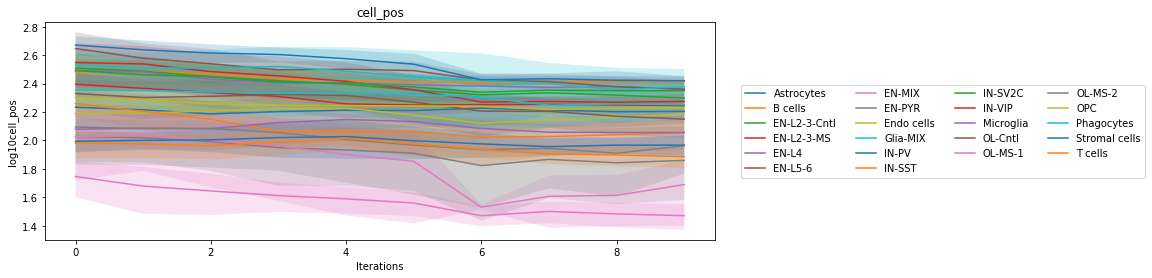

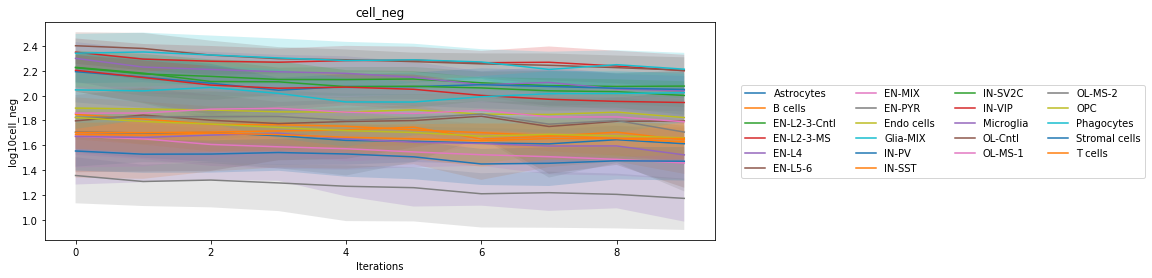

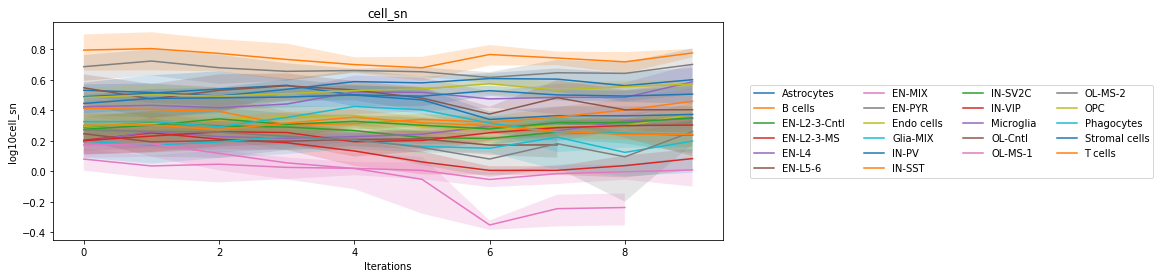

In [205]:
Iteration_results = pickle.load(open('/bigstore/GeneralStorage/Zach/MERCI/Codebook_Genetic_Optimizer_Results/Iteration_results(fd).pkl','rb'))
def qc_viewer(Iteration_results):
    Values_dict = {}
    Error_dict = {}

    for I in Iteration_results.keys():
        try:
            Results = Iteration_results[I]['Results']
        except:
            continue
        for cell,cell_result in Results.items():
            if 'Blank' in cell:
                continue
            for key,values in cell_result.items():
                new_key = key[:-4]
                if 'avg' in key:
                    if not new_key in Values_dict.keys():
                        Values_dict[new_key]={}
                    if not cell in Values_dict[new_key].keys():
                        Values_dict[new_key][cell]=[]
                    Values_dict[new_key][cell].append(values)
                if 'std' in key:
                    if not new_key in Error_dict.keys():
                        Error_dict[new_key]={}
                    if not cell in Error_dict[new_key].keys():
                        Error_dict[new_key][cell]=[]
                    Error_dict[new_key][cell].append(values)
    for key,val_dict in Values_dict.items():
        if 'diff' in key:
            continue
        if 'snr' in key:
            continue
        plt.figure(figsize=[12,4])
        for cell,values in val_dict.items():
            Y = np.log10(np.array(values))
            E_max = np.log10((np.array(values)+np.array(Error_dict[key][cell])))
            E_min = np.log10((np.array(values)-np.array(Error_dict[key][cell])))
            X = range(len(Y))
            plt.plot(X,Y,label=cell)
            plt.fill_between(X,E_max,E_min,alpha=0.2)
            plt.xlabel('Iterations')
            plt.ylabel('log10'+key)
        plt.title(key)
        plt.legend(loc="right",ncol=4,bbox_to_anchor=(1.65, 0.5))
        plt.show()
qc_viewer(Iteration_results)

Iteration Number 1
Error: 156.11350292689437


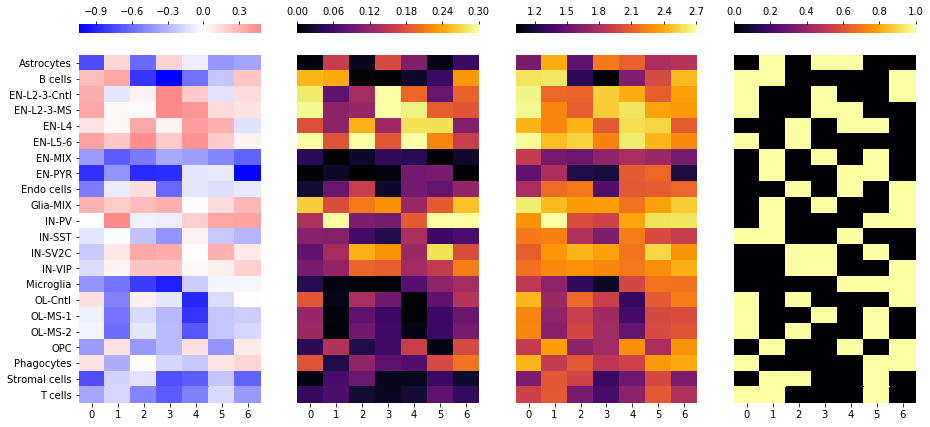

Iteration Number 2
Error: 141.24590290360265


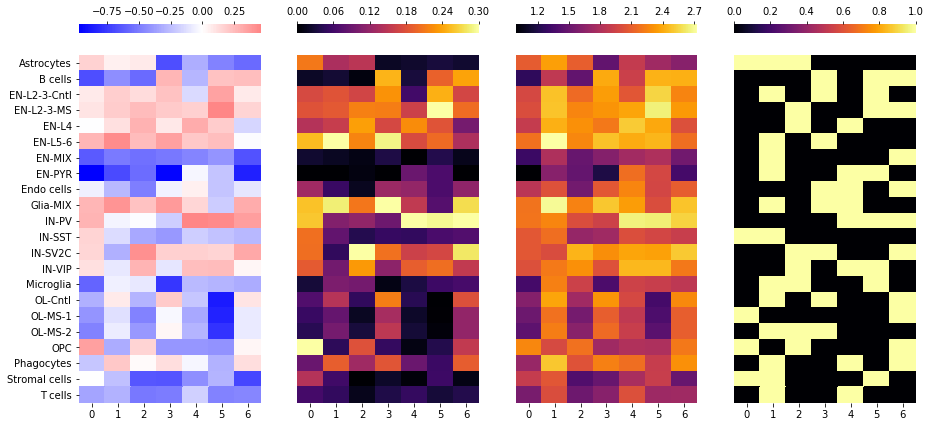

Iteration Number 3
Error: 117.95790397344442


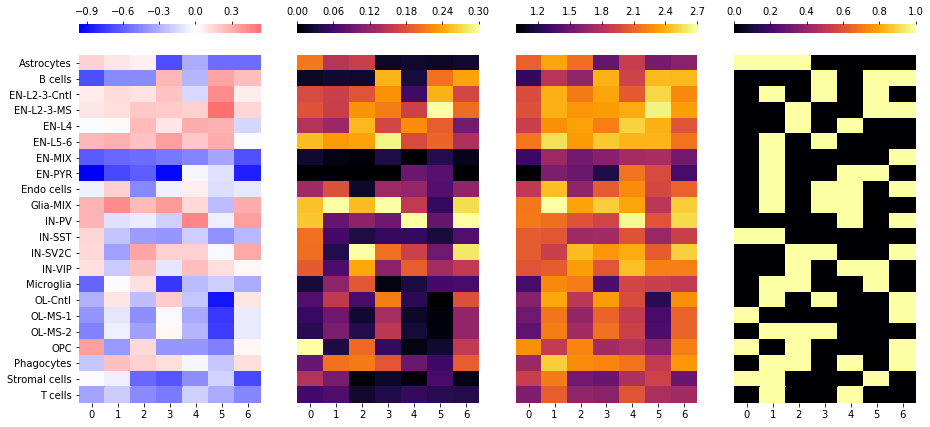

Iteration Number 4
Error: 111.20500592740308


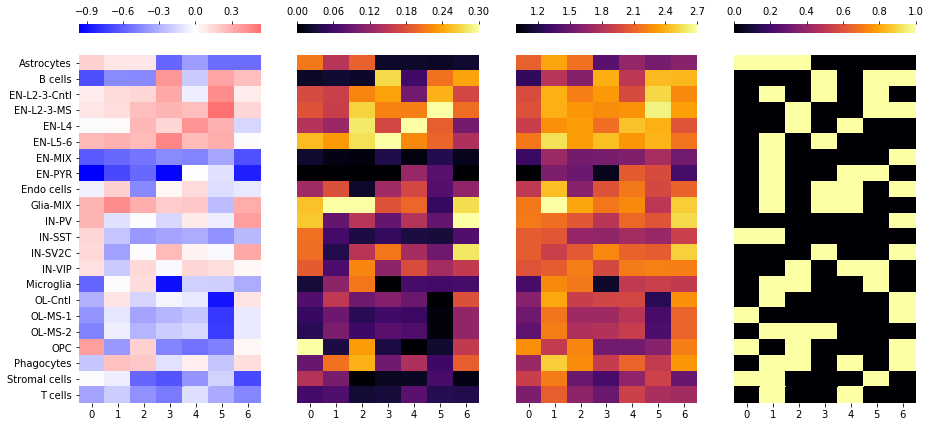

Iteration Number 5
Error: 106.33781797280476


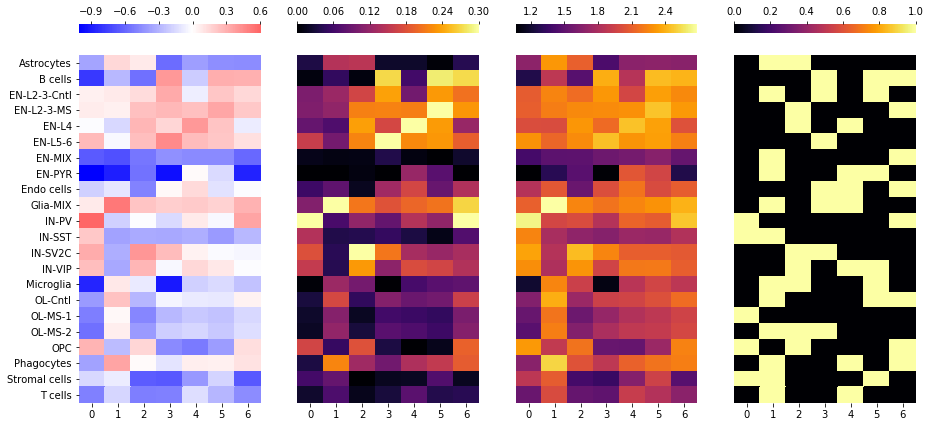

Iteration Number 6
Error: 96.26018295316766


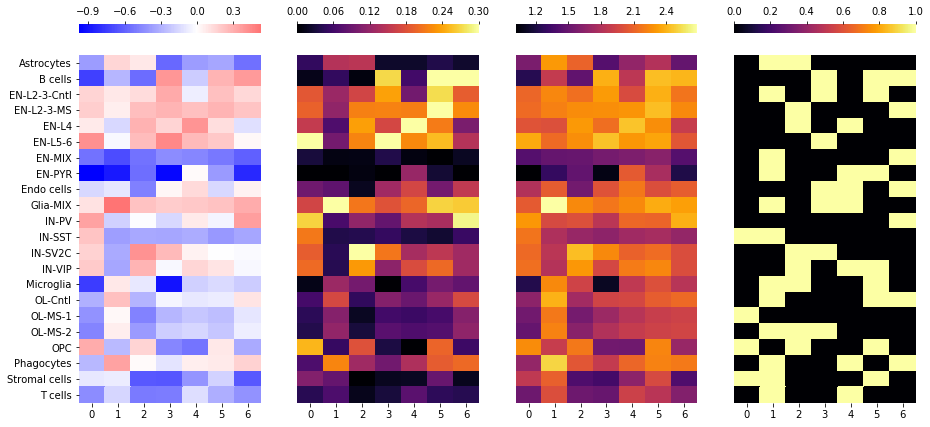

Iteration Number 7
Error: 91.74969028484558


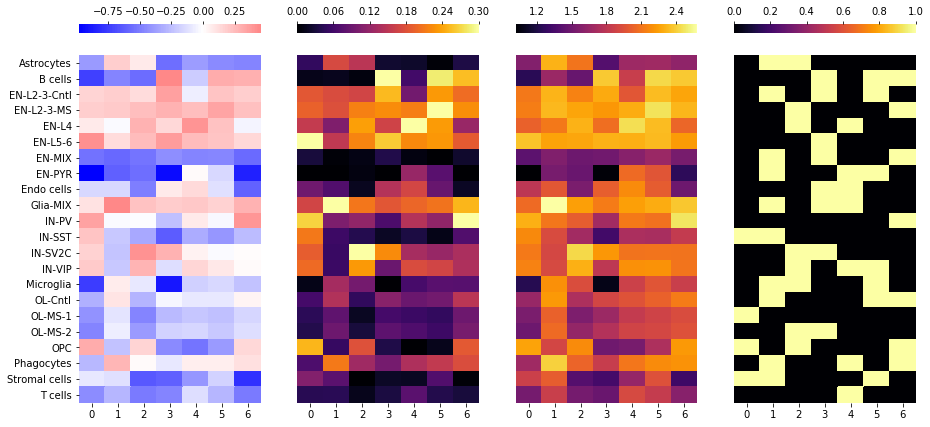

In [204]:
for i in Iteration_results.keys():
    print('Iteration Number',i+1)
    print('Error:',Iteration_results[i]['survivor_errors'][0])
    codebook_df = Iteration_results[i]['survivors'][0]
    Readout_df = Iteration_results[i]['survivor_dfs'][0]
    codebook_df = codebook_df.drop(index=[i for i in codebook_df.index if 'Blank' in i])
    Readout_df = Readout_df.drop(index=[i for i in Readout_df.index if 'Blank' in i])
    bkg_sub_Readout_df = Readout_df-np.min(Readout_df,axis=0)
    norm_Readout_df = bkg_sub_Readout_df/np.max(bkg_sub_Readout_df,axis=0)
    fig, axes = plt.subplots(ncols=4, figsize=(15, 8))
    ax1,ax2,ax3,ax4 = axes
    im1 = sns.heatmap(np.log10(Readout_df/np.average(Readout_df,axis=0)),cmap='bwr',center=0,ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
    im2 = sns.heatmap(np.log10(norm_Readout_df+1),cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    im3 = sns.heatmap(np.log10(Readout_df+1),cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    plt.show()

Iteration Number 1
Error: 2.0388013368644464


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log10



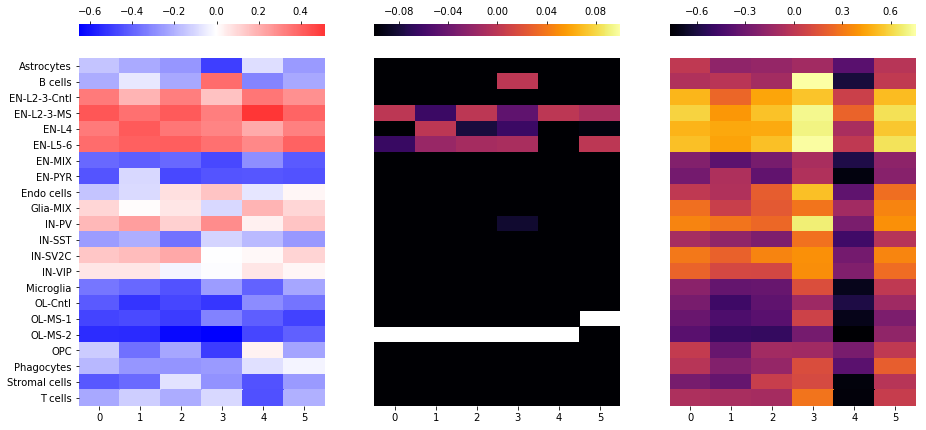

Iteration Number 2
Error: 1.2091913064728796


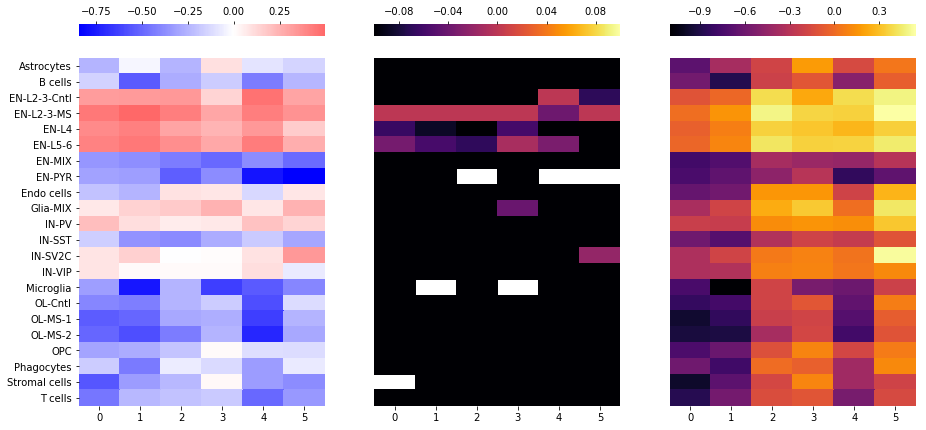

Iteration Number 3
Error: 1.0589054377285696


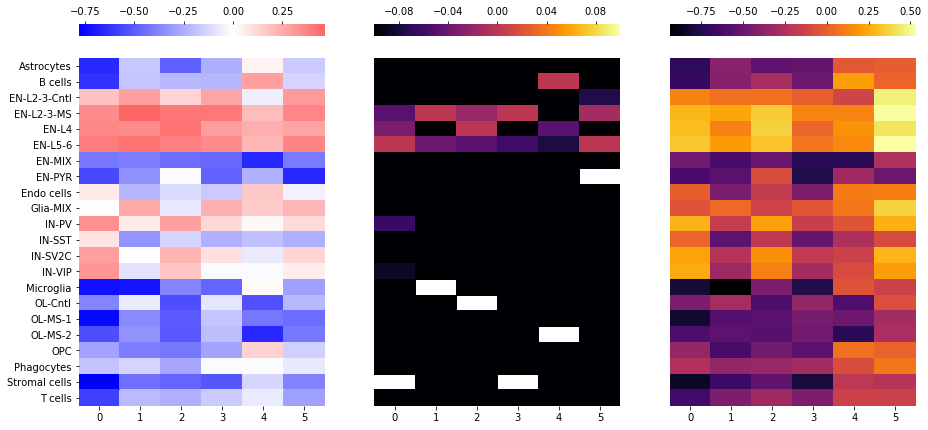

Iteration Number 4
Error: 0.816661356471651


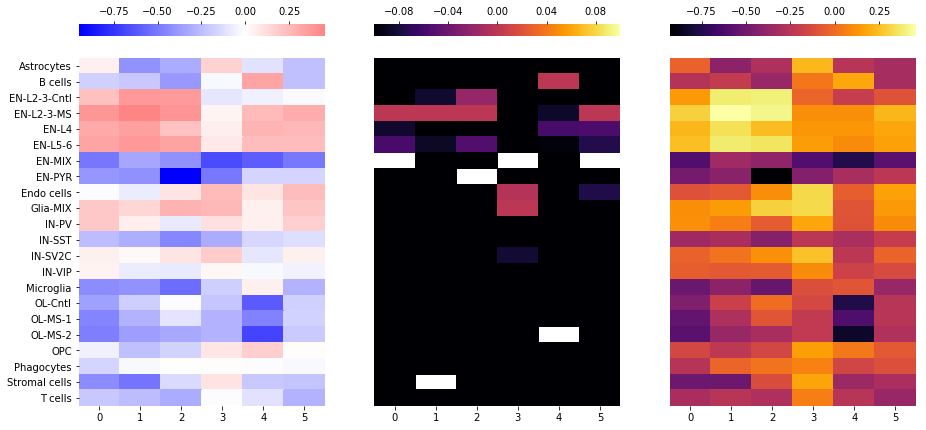

Iteration Number 5
Error: 0.6997075705191684


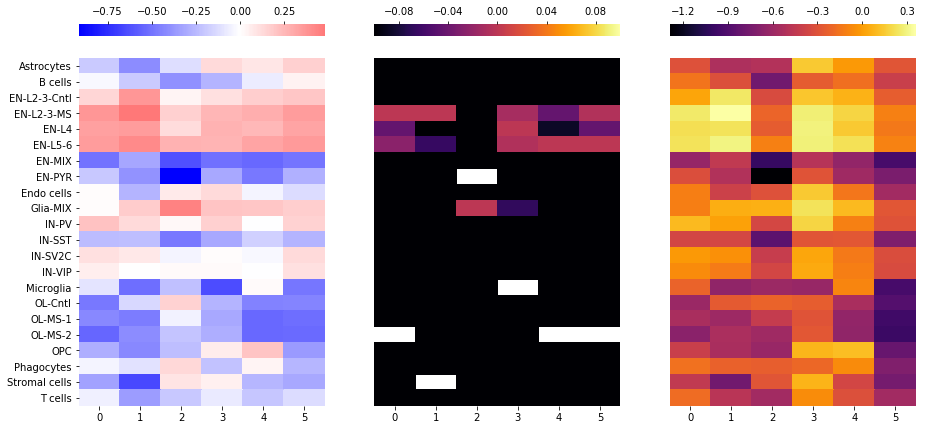

Iteration Number 6
Error: 0.5344447552747933


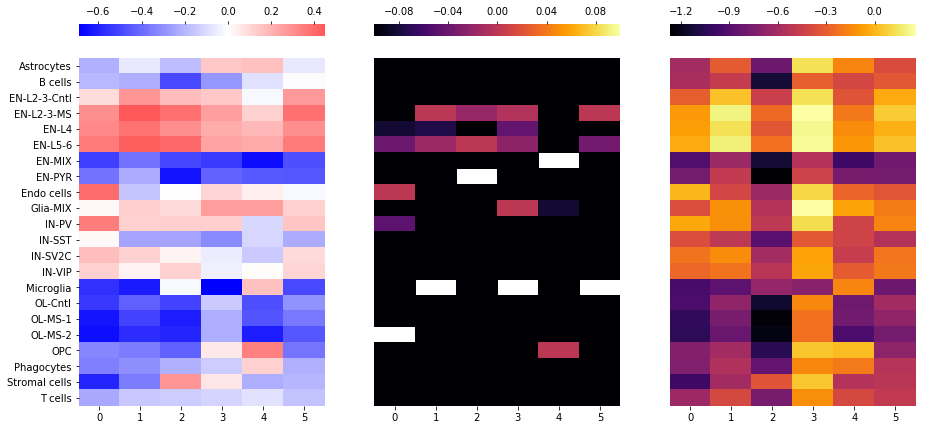

Iteration Number 7
Error: 0.4385641065520153


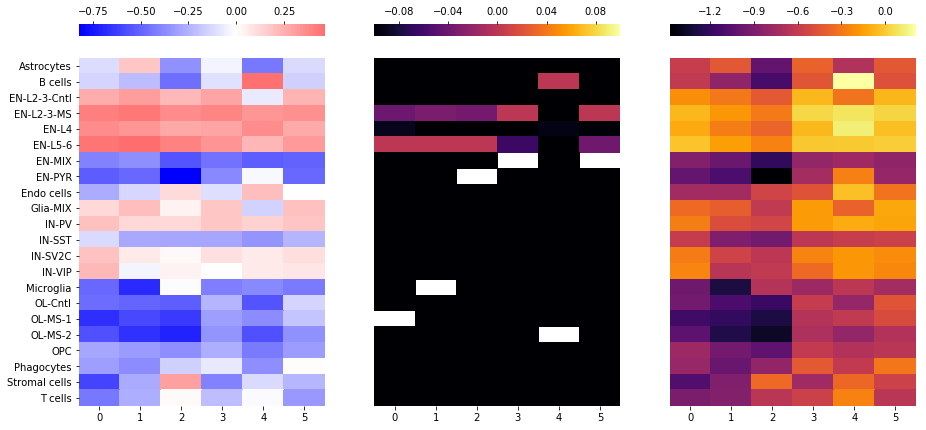

Iteration Number 8
Error: 0.3951150769196914


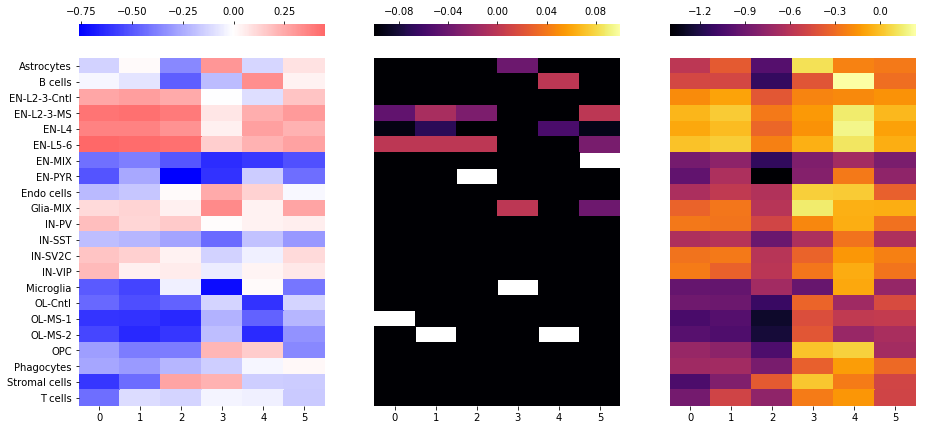

Iteration Number 9
Error: 0.35922906820288164


KeyboardInterrupt: 

In [211]:
out_path = '/bigstore/GeneralStorage/Zach/MERCI/Gene_Genetic_Optimizer_Results/'
Iteration_results = pickle.load(open(os.path.join(out_path,'Iteration_results.pkl'),'rb'))
for i in Iteration_results.keys():
    print('Iteration Number',i+1)
    print('Error:',Iteration_results[i]['survivor_errors'][0])
    species = Iteration_results[i]['survivors'][0]
    Readout_df = Iteration_results[i]['survivor_dfs'][0]
    Readout_df = Readout_df.drop(index=[i for i in Readout_df.index if 'Blank' in i])
    bkg_sub_Readout_df = Readout_df-np.min(Readout_df,axis=0)
    norm_Readout_df = bkg_sub_Readout_df/np.max(bkg_sub_Readout_df,axis=0)
    fig, axes = plt.subplots(ncols=3, figsize=(15, 8))
    ax1,ax2,ax3 = axes
    im1 = sns.heatmap(np.log10(Readout_df/np.average(Readout_df,axis=0)),cmap='bwr',center=0,ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
    im2 = sns.heatmap(np.log10(norm_Readout_df+1),cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    im3 = sns.heatmap(np.log10(Readout_df+1),cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    plt.show()

Iteration Number 1
Error Summary
Average: 2.2771797723452307
Median: 2.2040906081024403
Min: 2.0388013368644464
STD: 0.16088559255654172


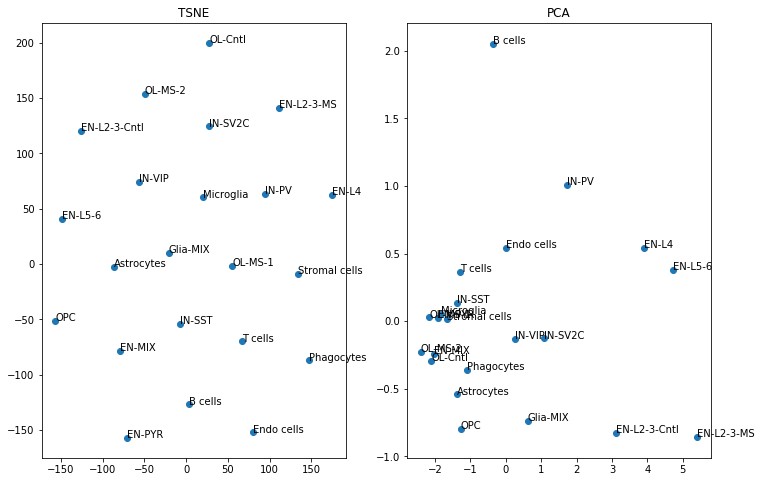

Iteration Number 2
Error Summary
Average: 1.6131032203271822
Median: 1.6683735873573444
Min: 1.2091913064728796
STD: 0.14886401555331766


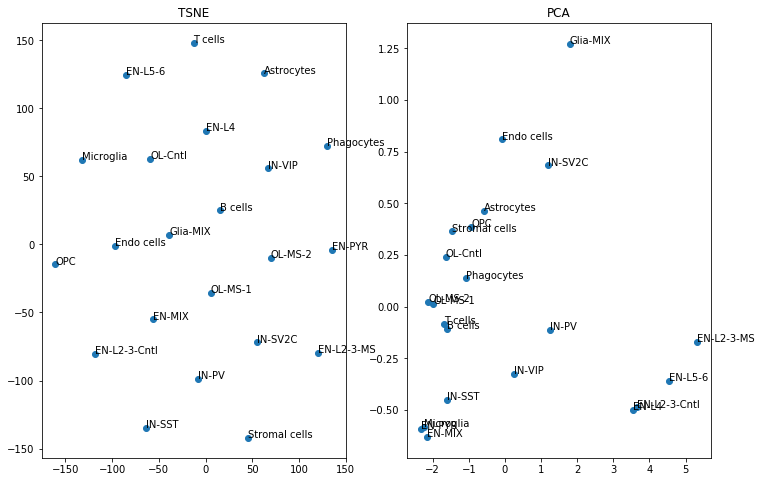

Iteration Number 3
Error Summary
Average: 1.2103771540770951
Median: 1.2091913064728796
Min: 1.0589054377285696
STD: 0.06862192974972971


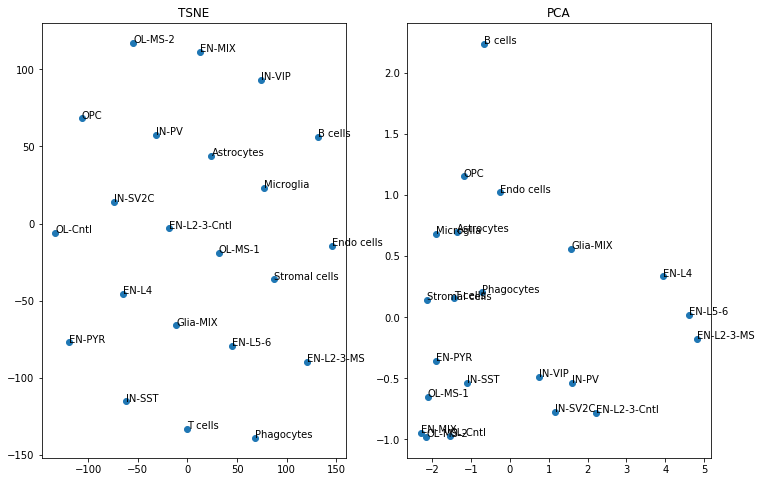

Iteration Number 4
Error Summary
Average: 0.8986607279034985
Median: 0.8902616278892344
Min: 0.816661356471651
STD: 0.06276647225005208


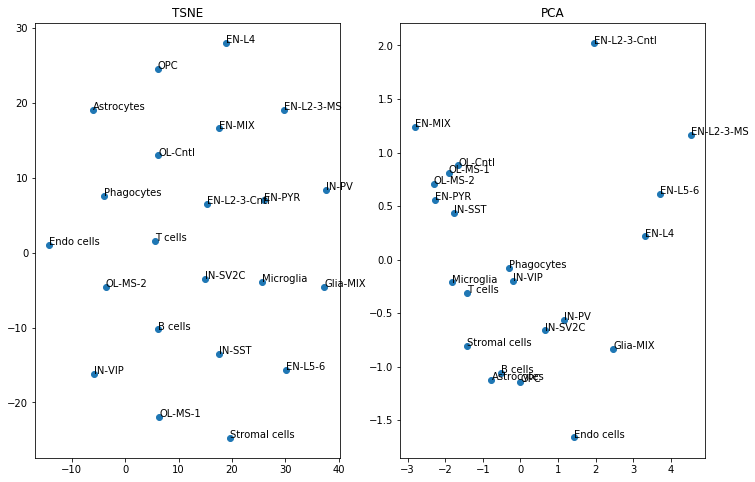

Iteration Number 5
Error Summary
Average: 0.7248885124152842
Median: 0.7207851536007364
Min: 0.6997075705191684
STD: 0.020271738415219617


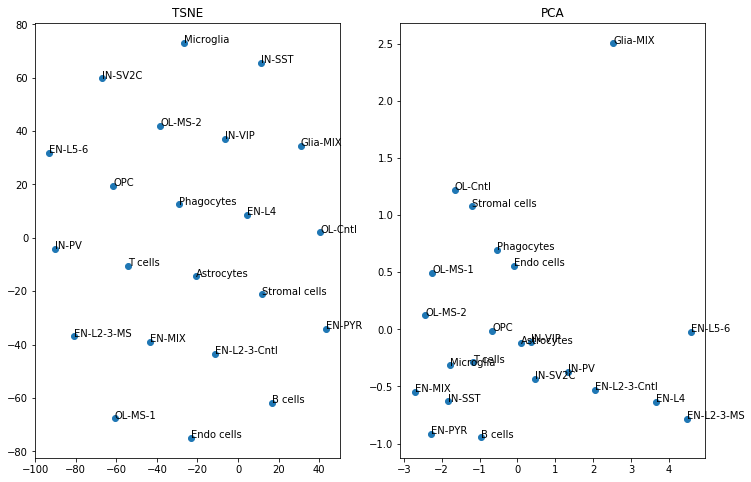

Iteration Number 6
Error Summary
Average: 0.6099447266402203
Median: 0.6279828921548047
Min: 0.5344447552747933
STD: 0.035025227840246205


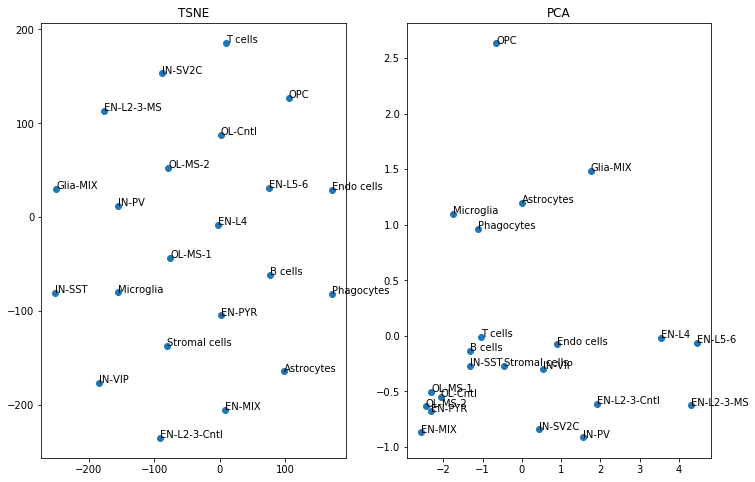

Iteration Number 7
Error Summary
Average: 0.5257197070083508
Median: 0.5344447552747933
Min: 0.4385641065520153
STD: 0.036237947589815855


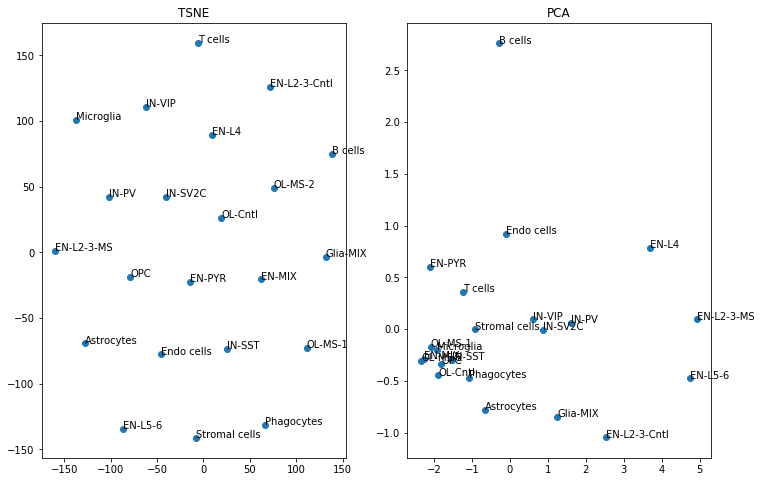

Iteration Number 8
Error Summary
Average: 0.43283604934217734
Median: 0.4385641065520153
Min: 0.3951150769196914
STD: 0.019819979103807957


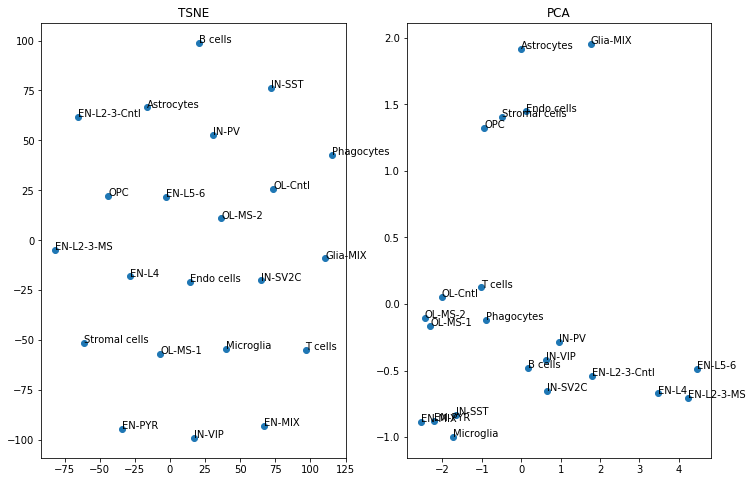

Iteration Number 9
Error Summary
Average: 0.37872980038713305
Median: 0.38072051639776583
Min: 0.35922906820288164
STD: 0.012098988442569316


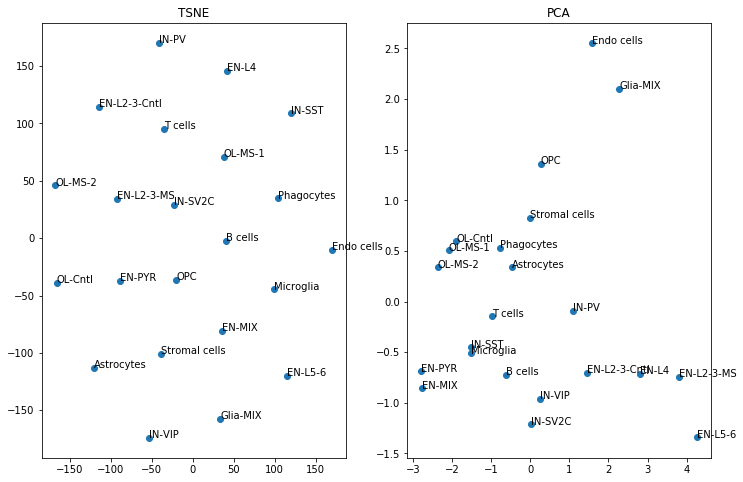

Iteration Number 10
Error Summary
Average: 0.3345994111491782
Median: 0.33553792145208217
Min: 0.3183466976766699
STD: 0.011746595335702855


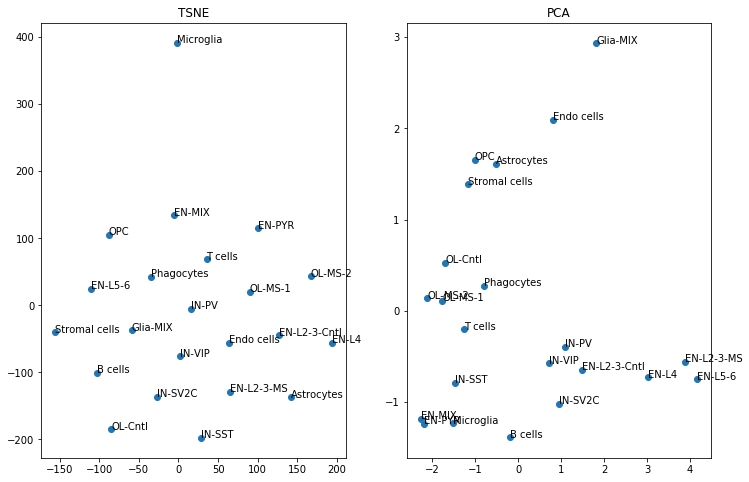

Iteration Number 11
Error Summary
Average: 0.2966384488683761
Median: 0.3000770696338939
Min: 0.27225136279354517
STD: 0.011563818552771667


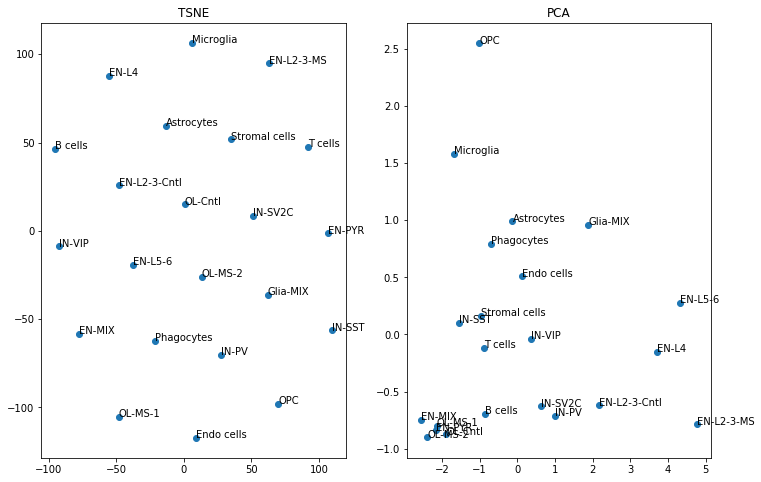

Iteration Number 12
Error Summary
Average: 0.2673320130931581
Median: 0.2714548288235593
Min: 0.24990066605987818
STD: 0.007278117785741294


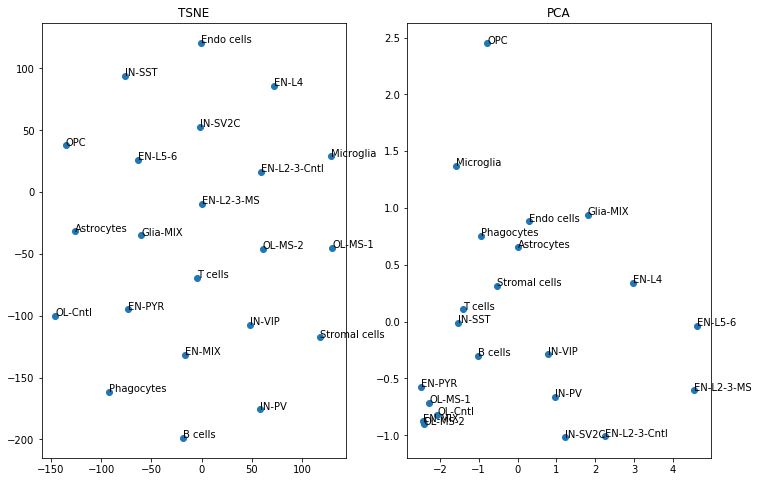

Iteration Number 13
Error Summary
Average: 0.24469156462035388
Median: 0.24774234219656172
Min: 0.23109581188516215
STD: 0.006213265030364664


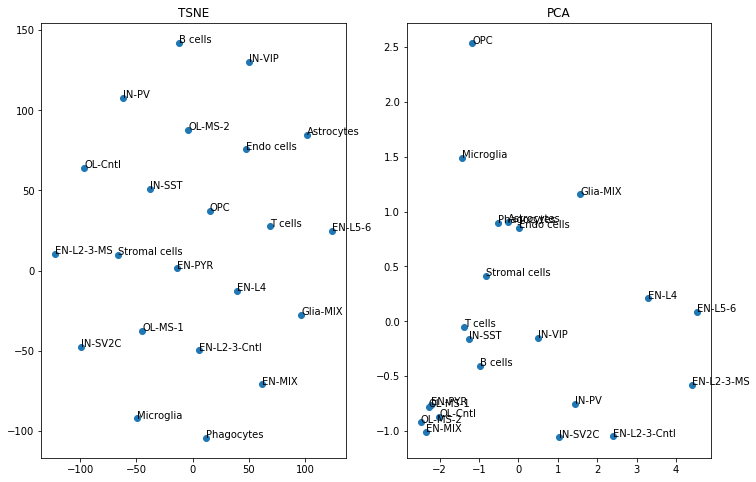

Iteration Number 14
Error Summary
Average: 0.23038999514990985
Median: 0.23109581188516215
Min: 0.22206528410311743
STD: 0.004336403140138377


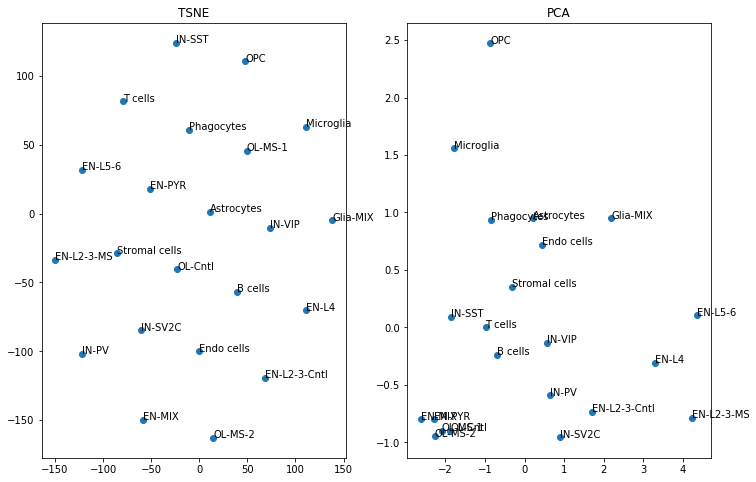

Iteration Number 15
Error Summary
Average: 0.21160962496263663
Median: 0.21142784929987005
Min: 0.18275871743563715
STD: 0.011504330109203273


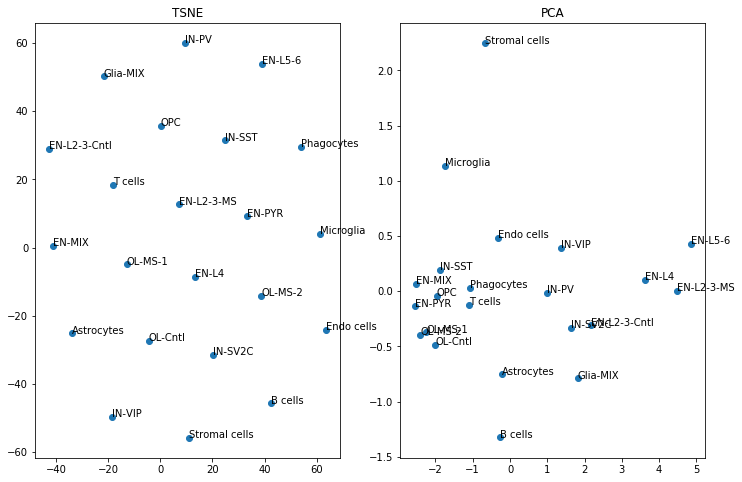

Iteration Number 16
Error Summary
Average: 0.18743512796310527
Median: 0.18816770270629463
Min: 0.17767096096377918
STD: 0.005055188631611975


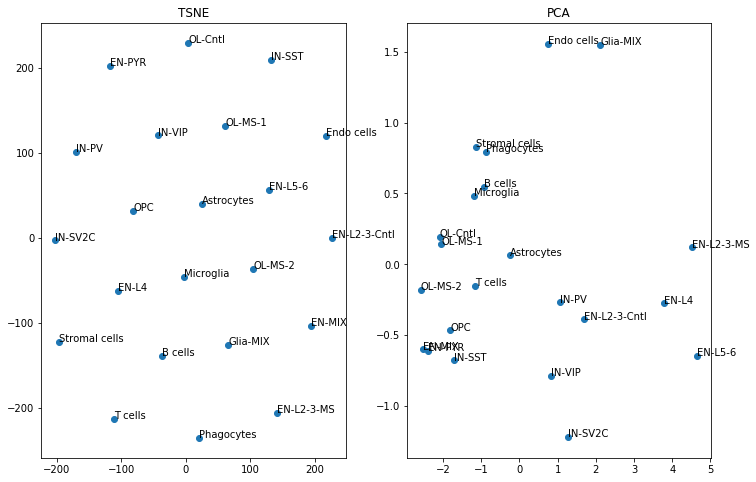

Iteration Number 17
Error Summary
Average: 0.1718580279407595
Median: 0.17659639721647835
Min: 0.1480251434884957
STD: 0.009002072664561484


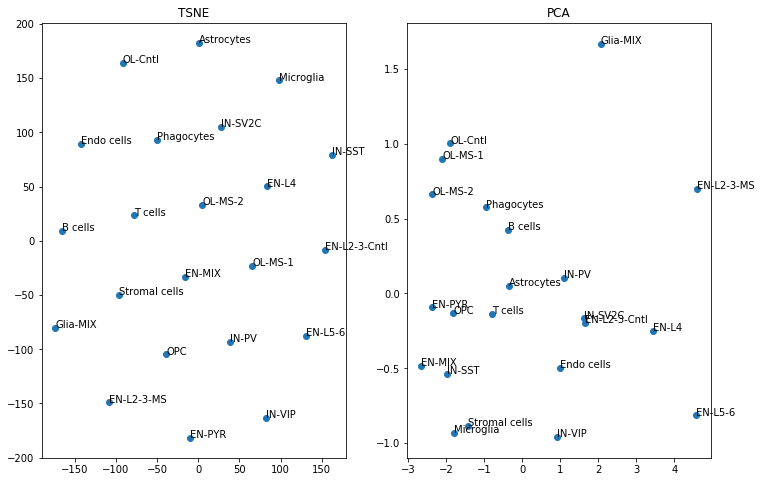

Iteration Number 18
Error Summary
Average: 0.1509389846142994
Median: 0.14802514348849571
Min: 0.1435830541048147
STD: 0.005837223855179814


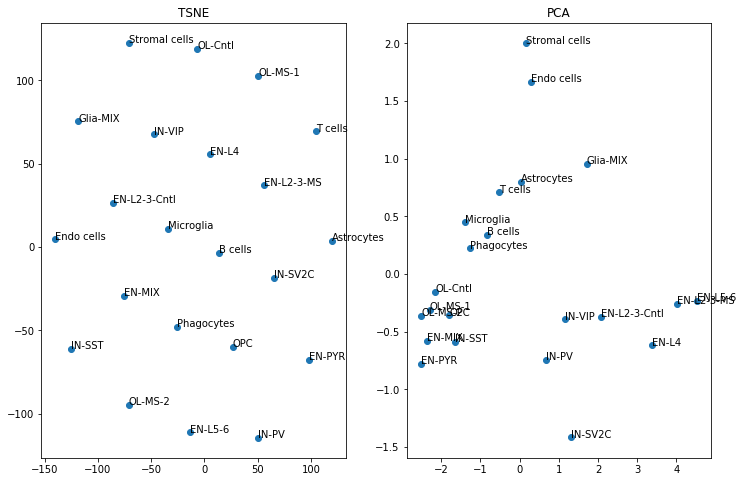

Iteration Number 19
Error Summary
Average: 0.14439972182509192
Median: 0.14428855426837706
Min: 0.14170343061824278
STD: 0.0014119194076946614


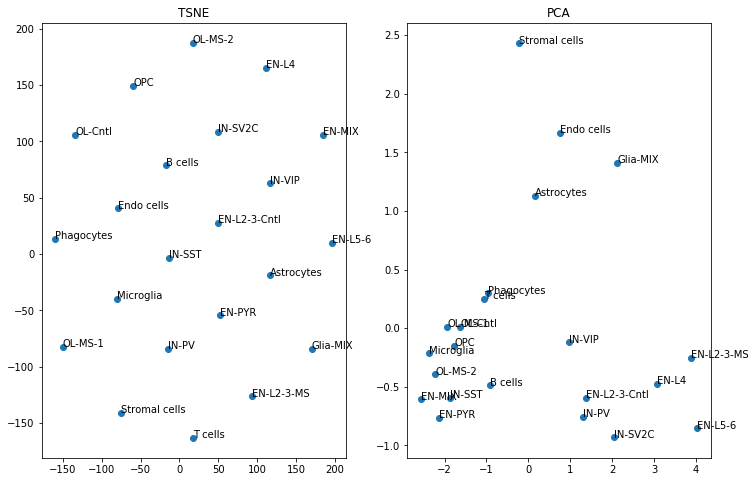

Iteration Number 20
Error Summary
Average: 0.14255546998165605
Median: 0.14358305410481467
Min: 0.1384562609035792
STD: 0.0015723305348340846


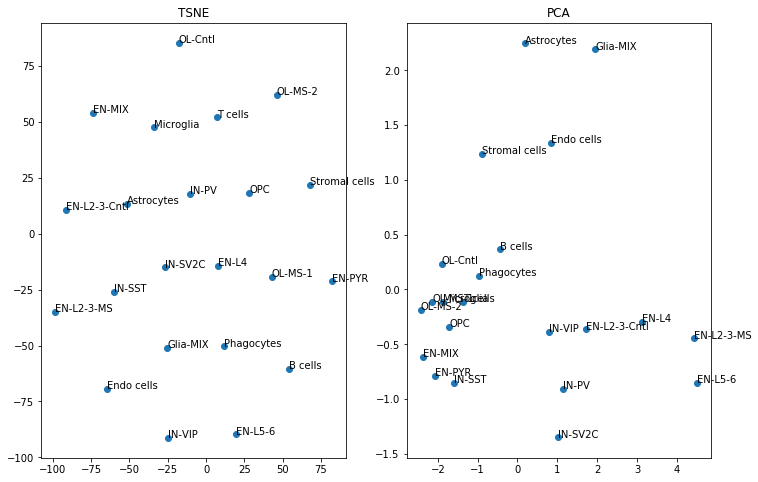

Iteration Number 21
Error Summary
Average: 0.13567561014948282
Median: 0.13796654886151272
Min: 0.1291503680388421
STD: 0.004224552822531775


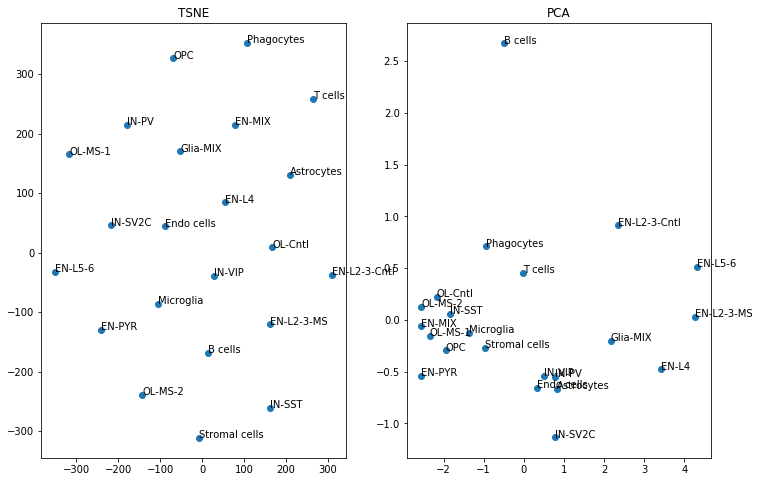

Iteration Number 22
Error Summary
Average: 0.12828316970696457
Median: 0.1291503680388421
Min: 0.12172299748696035
STD: 0.0029219156391474075


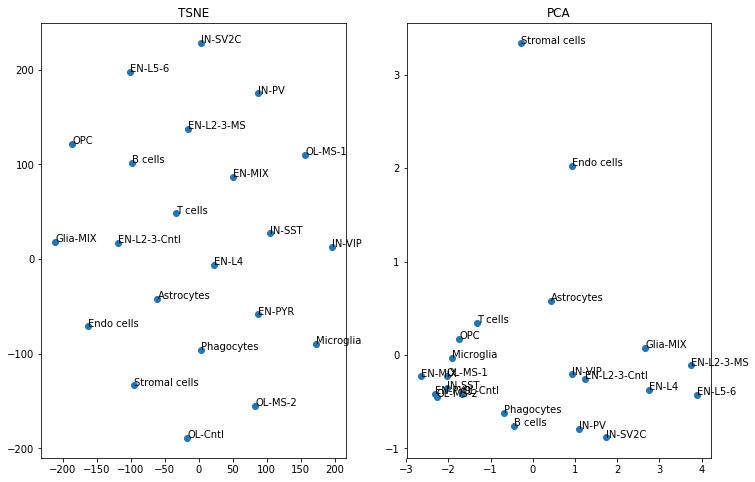

Iteration Number 23
Error Summary
Average: 0.12175682331468655
Median: 0.12172299748696035
Min: 0.11586301891273686
STD: 0.0033088572152763685


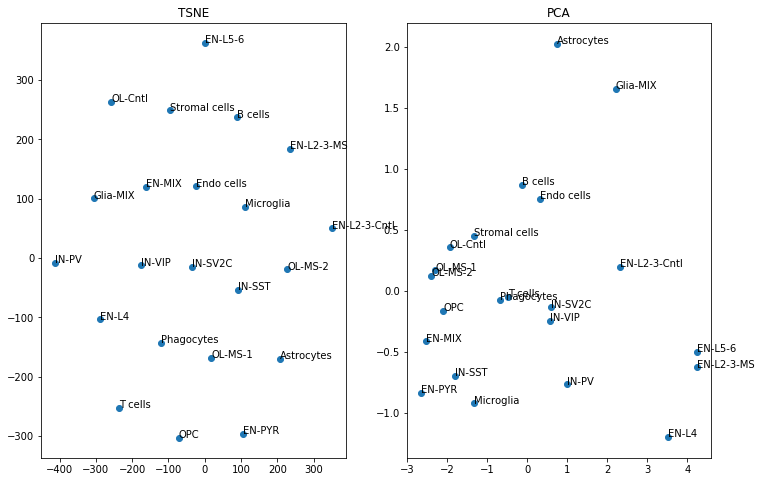

Iteration Number 24
Error Summary
Average: 0.11705846688718964
Median: 0.11602495327117736
Min: 0.11586301891273683
STD: 0.0016348852861474124


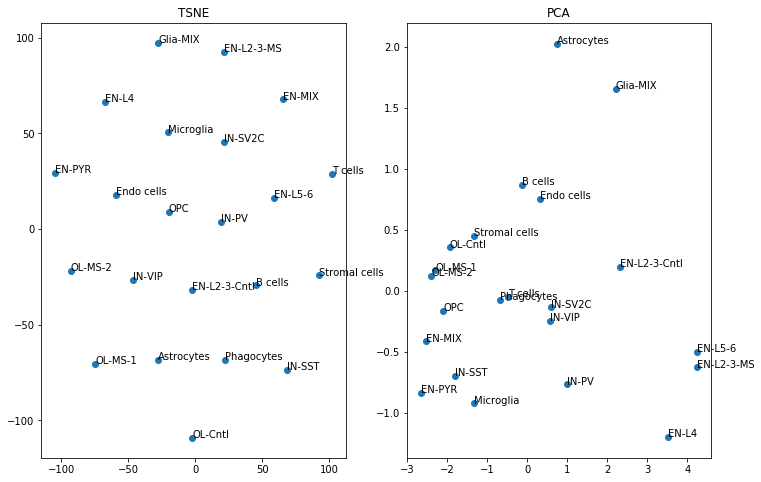

Iteration Number 25
Error Summary
Average: 0.11557954155253347
Median: 0.11586301891273686
Min: 0.11302824531070317
STD: 0.0008504320806101038


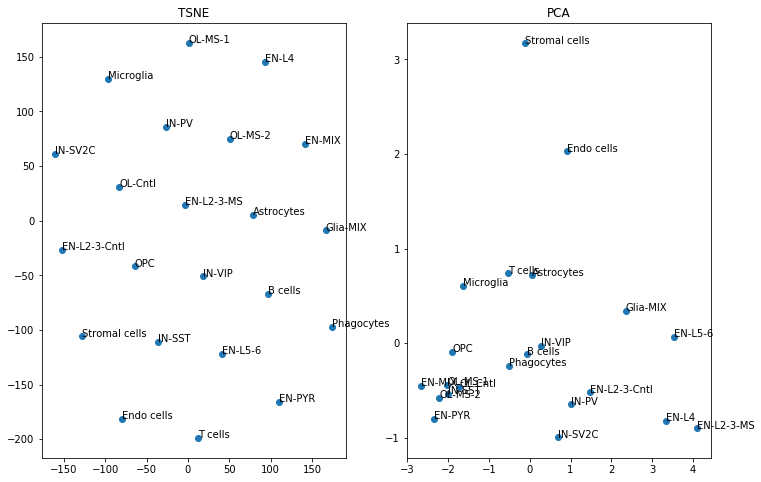

Iteration Number 26
Error Summary
Average: 0.11368137034304016
Median: 0.11302824531070317
Min: 0.11011049130802951
STD: 0.0019783147851045284


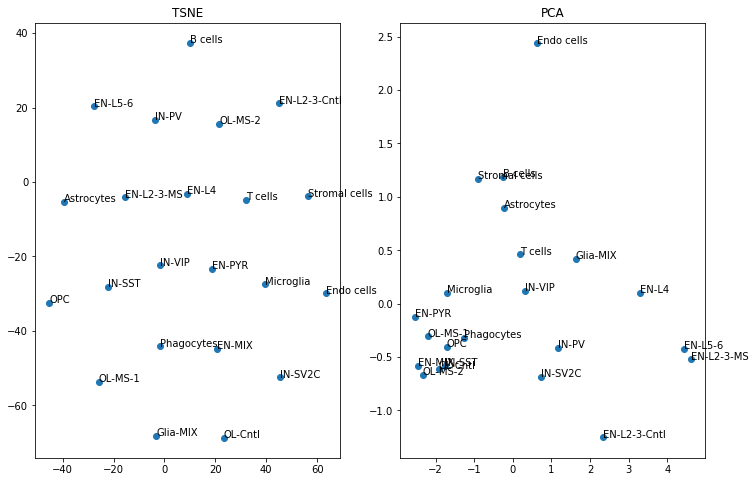

Iteration Number 27
Error Summary
Average: 0.10724635492024832
Median: 0.10858656790612312
Min: 0.0946282980285307
STD: 0.0046791504374143296


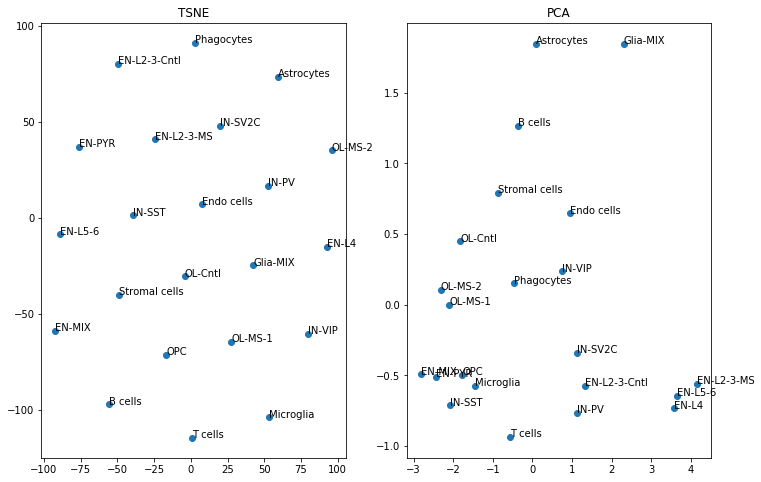

Iteration Number 28
Error Summary
Average: 0.09751206377431741
Median: 0.09870133711584582
Min: 0.09295897035580493
STD: 0.0026409099129266487


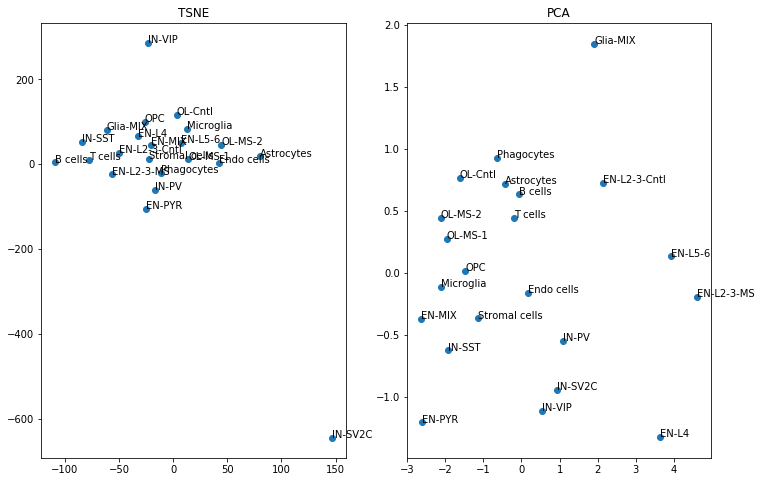

Iteration Number 29
Error Summary
Average: 0.09292797259541444
Median: 0.09295897035580493
Min: 0.08935482167368018
STD: 0.0015536302165390509


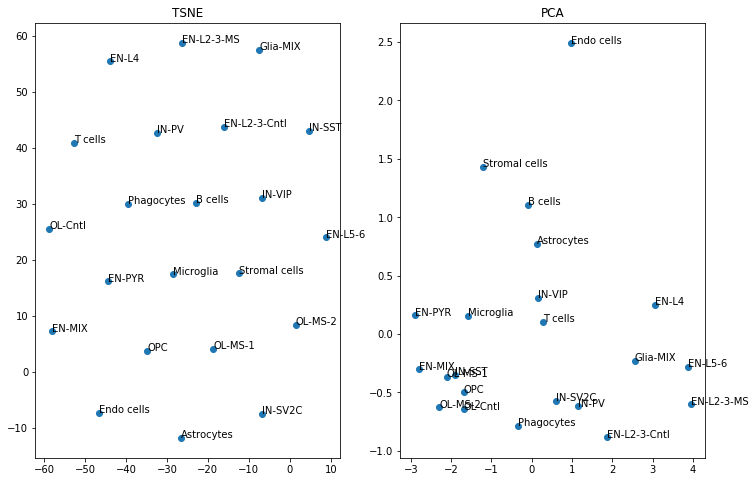

Iteration Number 30
Error Summary
Average: 0.08710995377580241
Median: 0.08807767826489765
Min: 0.08258716104485002
STD: 0.002442184312172149


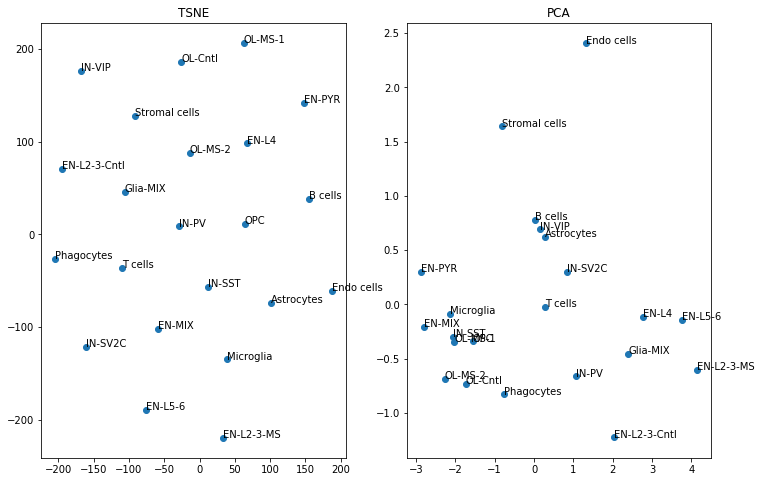

In [219]:
def view_progress(survivors,survivor_dfs,survivor_errors,verbose=False):
    Results = {}
    Results['Error'] = survivor_errors
    Error_avg = np.average(survivor_errors)
    Error_std = np.std(survivor_errors)
    Results['Error_avg'] = Error_avg
    Results['Error_std'] = Error_std
    
    Readout_df = survivor_dfs[0]
    if verbose:
        print('Error Summary')
        print('Average:',Error_avg)
        print('Median:',np.median(survivor_errors))
        print('Min:',np.min(survivor_errors))
        print('STD:',Error_std)
    x = StandardScaler().fit_transform(Readout_df)
    X = pd.DataFrame(x,index=Readout_df.index)
    X_embedded = TSNE(n_components=2).fit_transform(X)
    X_embedded = pd.DataFrame(data = X_embedded,index=Readout_df.index)
    Results['TSNE'] = X_embedded
    pca = PCA(n_components=2)
    x = StandardScaler().fit_transform(Readout_df)
    X = pd.DataFrame(x,index=Readout_df.index)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents,index=Readout_df.index)
    Results['PCA'] = principalDf
    if verbose:
        plt.figure(figsize=[12,8])
        X = np.array(X_embedded[0])
        Y = np.array(X_embedded[1])
        plt.subplot(1,2,1)
        plt.scatter(X,Y)
        plt.title('TSNE')
        for i,txt in enumerate(list(X_embedded.index)):
            plt.annotate(txt,[X[i],Y[i]])
        X = np.array(principalDf[0])
        Y = np.array(principalDf[1])
        plt.subplot(1,2,2)
        plt.scatter(X,Y)
        plt.title('PCA')
        for i,txt in enumerate(principalDf.index):
            plt.annotate(txt,[X[i],Y[i]])
        plt.show()
    return Results,Error_avg,Error_std
out_path = '/bigstore/GeneralStorage/Zach/MERCI/Gene_Genetic_Optimizer_Results/'
Iteration_results = pickle.load(open(os.path.join(out_path,'Iteration_results.pkl'),'rb'))
for i in Iteration_results.keys():
    print('Iteration Number',i+1)
    survivors = Iteration_results[i]['survivors']
    survivor_dfs = Iteration_results[i]['survivor_dfs']
    survivor_errors = Iteration_results[i]['survivor_errors']
    Results,Error_avg,Error_std = view_progress(survivors,survivor_dfs,survivor_errors,verbose=True)

In [223]:
survivors[0]

0                1                2                3  \
0   ENSG00000212348  ENSG00000223834  ENSG00000276241  ENSG00000196970   
1   ENSG00000275370  ENSG00000260010  ENSG00000271937  ENSG00000013588   
2   ENSG00000164120  ENSG00000261241  ENSG00000073792  ENSG00000276698   
3   ENSG00000229344  ENSG00000279975  ENSG00000229717  ENSG00000251228   
4   ENSG00000279235  ENSG00000251446  ENSG00000140675  ENSG00000268736   
5   ENSG00000223589  ENSG00000145839  ENSG00000204928  ENSG00000249177   
6   ENSG00000276281  ENSG00000231017  ENSG00000234230  ENSG00000276030   
7   ENSG00000281348  ENSG00000236340  ENSG00000185040  ENSG00000224521   
8   ENSG00000276674  ENSG00000236969  ENSG00000258013  ENSG00000177174   
9   ENSG00000231655  ENSG00000008516  ENSG00000130711  ENSG00000206878   
10  ENSG00000251957  ENSG00000223963  ENSG00000259341  ENSG00000212176   
11  ENSG00000279714  ENSG00000105261  ENSG00000101425  ENSG00000263688   
12  ENSG00000248979  ENSG00000133466  ENSG00000230373  ENSG00000207130   
13  ENSG00000258232  ENSG00000258159  ENSG00000101000  ENSG00000215117   
14  ENSG00000272717  ENSG00000270917  ENSG00000232983  ENSG00000227757   
15  ENSG00000237489  ENSG00000227043  ENSG00000272078  ENSG00000275720   
16  ENSG00000227660  ENSG00000114738  ENSG00000155070  ENSG00000177459   
17  ENSG00000261466  ENSG00000219200  ENSG00000188383  ENSG00000226222   
18  ENSG00000273136  ENSG00000269067  ENSG00000187626  ENSG00000220548   
19  ENSG00000265388  ENSG00000223360  ENSG00000264423  ENSG00000259270   
20  ENSG00000279406  ENSG00000226985  ENSG00000134216  ENSG00000243974   
21  ENSG00000201035  ENSG00000116785  ENSG00000273355  ENSG00000231258   
22  ENSG00000181392  ENSG00000164362  ENSG00000232075  ENSG00000270522   
23  ENSG00000267123  ENSG00000232423  ENSG00000259312  ENSG00000258345   
24  ENSG00000146221  ENSG00000259818  ENSG00000261647  ENSG00000250929   

                  4                5  
0   ENSG00000178363  ENSG00000089472  
1   ENSG00000278862  ENSG00000259334  
2   ENSG00000169164  ENSG00000197134  
3   ENSG00000262468  ENSG00000230310  
4   ENSG00000274835  ENSG00000265918  
5   ENSG00000110047  ENSG00000236257  
6   ENSG00000263820  ENSG00000213183  
7   ENSG00000277039  ENSG00000268864  
8   ENSG00000204923  ENSG00000254838  
9   ENSG00000151929  ENSG00000281831  
10  ENSG00000230937  ENSG00000240654  
11  ENSG00000270750  ENSG00000275572  
12  ENSG00000187243  ENSG00000235464  
13  ENSG00000236281  ENSG00000164889  
14  ENSG00000229598  ENSG00000108878  
15  ENSG00000257956  ENSG00000251616  
16  ENSG00000223617  ENSG00000259389  
17  ENSG00000224611  ENSG00000279821  
18  ENSG00000280070  ENSG00000181541  
19  ENSG00000237170  ENSG00000149328  
20  ENSG00000267094  ENSG00000242314  
21  ENSG00000226979  ENSG00000271858  
22  ENSG00000250378  ENSG00000280272  
23  ENSG00000258466  ENSG00000270720  
24  ENSG00000250258  ENSG00000250256

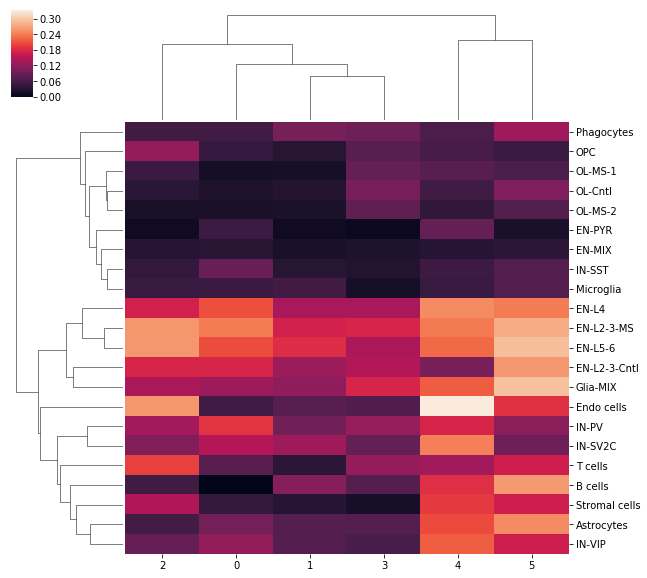

In [221]:
sns.clustermap(survivor_dfs[0])

In [224]:
survivor_dfs[0]

0         1         2         3         4         5
Astrocytes     0.098309  0.073035  0.059097  0.074150  0.207954  0.252741
B cells        0.000000  0.113208  0.056604  0.075472  0.188679  0.264151
EN-L2-3-Cntl   0.179215  0.129728  0.177801  0.146695  0.102510  0.262990
EN-L2-3-MS     0.240960  0.174111  0.261319  0.179277  0.240656  0.279246
EN-L4          0.209920  0.139200  0.173760  0.138880  0.253760  0.241600
EN-L5-6        0.209287  0.185088  0.261936  0.140615  0.227927  0.293002
EN-MIX         0.034956  0.023304  0.033292  0.026633  0.033708  0.038285
EN-PYR         0.052354  0.013449  0.013449  0.008165  0.086455  0.023055
Endo cells     0.056000  0.077333  0.261333  0.069333  0.333333  0.189333
Glia-MIX       0.131321  0.119902  0.140294  0.179445  0.219413  0.296085
IN-PV          0.190828  0.096468  0.136531  0.125988  0.177122  0.115973
IN-SST         0.090175  0.034320  0.045087  0.030283  0.052490  0.072005
IN-SV2C        0.148909  0.130937  0.109114  0.086008  0.243902  0.094994
IN-VIP         0.123412  0.073684  0.087477  0.063884  0.220690  0.168784
Microglia      0.051930  0.057544  0.049825  0.019649  0.049825  0.072281
OL-Cntl        0.026343  0.032255  0.037648  0.100394  0.056005  0.106824
OL-MS-1        0.018198  0.019931  0.051993  0.086655  0.077123  0.065858
OL-MS-2        0.022528  0.023780  0.023154  0.083229  0.043805  0.071339
OPC            0.047867  0.034860  0.123829  0.077263  0.062695  0.050989
Phagocytes     0.058140  0.100775  0.058140  0.093023  0.065891  0.131783
Stromal cells  0.045752  0.032680  0.143791  0.019608  0.196078  0.169935
T cells        0.076190  0.038095  0.200000  0.123810  0.133333  0.171429

In [222]:
Readout_df = survivor_dfs[0]
x = StandardScaler().fit_transform(Readout_df)
X = pd.DataFrame(x,index=Readout_df.index)
X_embedded = TSNE(n_components=3).fit_transform(X)
X_embedded = pd.DataFrame(data = X_embedded,index=Readout_df.index)
px.scatter_3d(X_embedded,x=0,y=1,z=2,text=X_embedded.index)